# 1. Dataset Description 


The dataset contains daily records of COVID-19 cases, deaths, and other related metrics, along with additional socio-economic and health-related data for countries worldwide. Each row represents a specific country on a specific date, with columns providing various metrics.

## Key Columns:

iso_code: The ISO 3166-1 alpha-3 code representing the country (e.g., AFG for Afghanistan, ZWE for Zimbabwe).

continent: The continent where the country is located (e.g., Asia, Africa).

location: The name of the country or region.

date: The date of the recorded data (in YYYY-MM-DD format).

total_cases: The cumulative number of confirmed COVID-19 cases up to that date.

new_cases: The number of new COVID-19 cases reported on that date.

total_deaths: The cumulative number of confirmed COVID-19 deaths up to that date.

new_deaths: The number of new COVID-19 deaths reported on that date.

total_cases_per_million: The cumulative number of cases per million people.

total_deaths_per_million: The cumulative number of deaths per million people.

reproduction_rate: The estimated effective reproduction rate (R) of the virus, indicating how quickly the virus is spreading.

icu_patients: The number of COVID-19 patients in intensive care units (ICUs) on that date.

hosp_patients: The number of COVID-19 patients hospitalized on that date.

total_tests: The cumulative number of COVID-19 tests conducted up to that date.

positive_rate: The percentage of tests that returned a positive result, indicating the prevalence of the virus.

total_vaccinations: The cumulative number of COVID-19 vaccine doses administered.

people_vaccinated: The number of people who received at least one vaccine dose.

people_fully_vaccinated: The number of people who received all required doses of the vaccine.

stringency_index: A composite measure of the strictness of government COVID-19 response policies (e.g., lockdowns, travel bans).

population: The total population of the country.

life_expectancy: The average life expectancy at birth in the country.

gdp_per_capita: The Gross Domestic Product (GDP) per capita, indicating the economic status of the country.

hospital_beds_per_thousand: The number of hospital beds available per 1,000 people, indicating healthcare capacity.

human_development_index (HDI): A composite index measuring average achievement in key dimensions of human development (health, education, and income).

# 2. Data Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = "/kaggle/input/covid-19-dataset/owid-covid-data.csv"  
df = pd.read_csv(file_path)

In [3]:
df

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
344774      ZWE    Africa     Zimbabwe  2023-09-23     265748.0        0.0   
344775      ZWE    Africa     Zimbabwe  2023-09-24     265748.0        0.0   
344776      ZWE    Africa     Zimbabwe  2023-09-25     265748.0        0.0   
344777      ZWE    Africa     Zimbabwe  2023-09-26     265748.0        0.0   
344778      ZWE    Africa     Zimbabwe  2023-09-27     265748.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
344774                 0.0        5718.0         0.0                  0.0   
344775                 0.0        5718.0         0.0                  0.0   
344776                 0.0        5718.0         0.0                  0.0   
344777                 0.0        5718.0         0.0                  0.0   
344778                 0.0        5718.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
344774  ...          30.7                  36.791                         1.7   
344775  ...          30.7                  36.791                         1.7   
344776  ...          30.7                  36.791                         1.7   
344777  ...          30.7                  36.791                         1.7   
344778  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
344774            61.49                    0.571  16320539.0   
344775            61.49                    0.571  16320539.0   
344776            61.49                    0.571  16320539.0   
344777            61.49                    0.571  16320539.0   
344778            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [4]:
df.head()

iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-03          NaN        0.0   
1      AFG      Asia  Afghanistan  2020-01-04          NaN        0.0   
2      AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
3      AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
4      AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN           NaN         0.0                  NaN  ...   
1                 NaN           NaN         0.0                  NaN  ...   
2                 NaN           NaN         0.0                  NaN  ...   
3                 NaN           NaN         0.0                  NaN  ...   
4                 NaN           NaN         0.0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN                  37.746                         0.5   
1           NaN                  37.746                         0.5   
2           NaN                  37.746                         0.5   
3           NaN                  37.746                         0.5   
4           NaN                  37.746                         0.5   

   life_expectancy  human_development_index  population  \
0            64.83                    0.511  41128772.0   
1            64.83                    0.511  41128772.0   
2            64.83                    0.511  41128772.0   
3            64.83                    0.511  41128772.0   
4            64.83                    0.511  41128772.0   

   excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                   NaN                          NaN   
1                                   NaN                          NaN   
2                                   NaN                          NaN   
3                                   NaN                          NaN   
4                                   NaN                          NaN   

   excess_mortality  excess_mortality_cumulative_per_million  
0               NaN                                      NaN  
1               NaN                                      NaN  
2               NaN                                      NaN  
3               NaN                                      NaN  
4               NaN                                      NaN  

[5 rows x 67 columns]

In [5]:
df.tail()

iso_code continent  location        date  total_cases  new_cases  \
344774      ZWE    Africa  Zimbabwe  2023-09-23     265748.0        0.0   
344775      ZWE    Africa  Zimbabwe  2023-09-24     265748.0        0.0   
344776      ZWE    Africa  Zimbabwe  2023-09-25     265748.0        0.0   
344777      ZWE    Africa  Zimbabwe  2023-09-26     265748.0        0.0   
344778      ZWE    Africa  Zimbabwe  2023-09-27     265748.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
344774                 0.0        5718.0         0.0                  0.0   
344775                 0.0        5718.0         0.0                  0.0   
344776                 0.0        5718.0         0.0                  0.0   
344777                 0.0        5718.0         0.0                  0.0   
344778                 0.0        5718.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
344774  ...          30.7                  36.791                         1.7   
344775  ...          30.7                  36.791                         1.7   
344776  ...          30.7                  36.791                         1.7   
344777  ...          30.7                  36.791                         1.7   
344778  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
344774            61.49                    0.571  16320539.0   
344775            61.49                    0.571  16320539.0   
344776            61.49                    0.571  16320539.0   
344777            61.49                    0.571  16320539.0   
344778            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
344774                                   NaN                          NaN   
344775                                   NaN                          NaN   
344776                                   NaN                          NaN   
344777                                   NaN                          NaN   
344778                                   NaN                          NaN   

        excess_mortality  excess_mortality_cumulative_per_million  
344774               NaN                                      NaN  
344775               NaN                                      NaN  
344776               NaN                                      NaN  
344777               NaN                                      NaN  
344778               NaN                                      NaN  

[5 rows x 67 columns]

In [6]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

# 3. EDA and Data Cleaning 

In [7]:
pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 83.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
import sweetviz as sv


                                             |          | [  0%]   00:00 -> (? left)


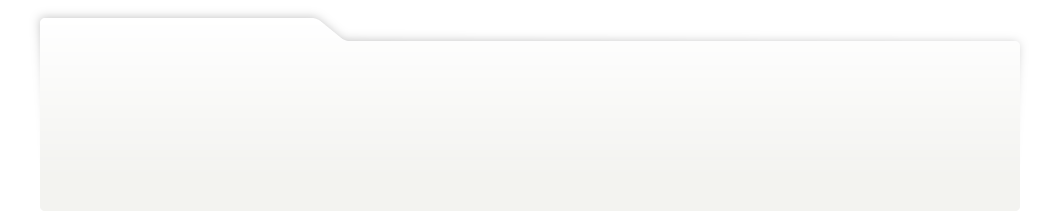
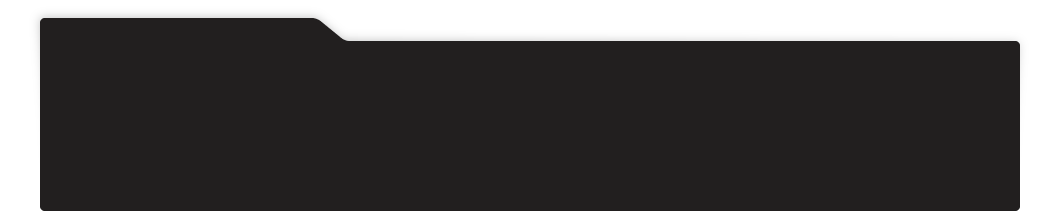
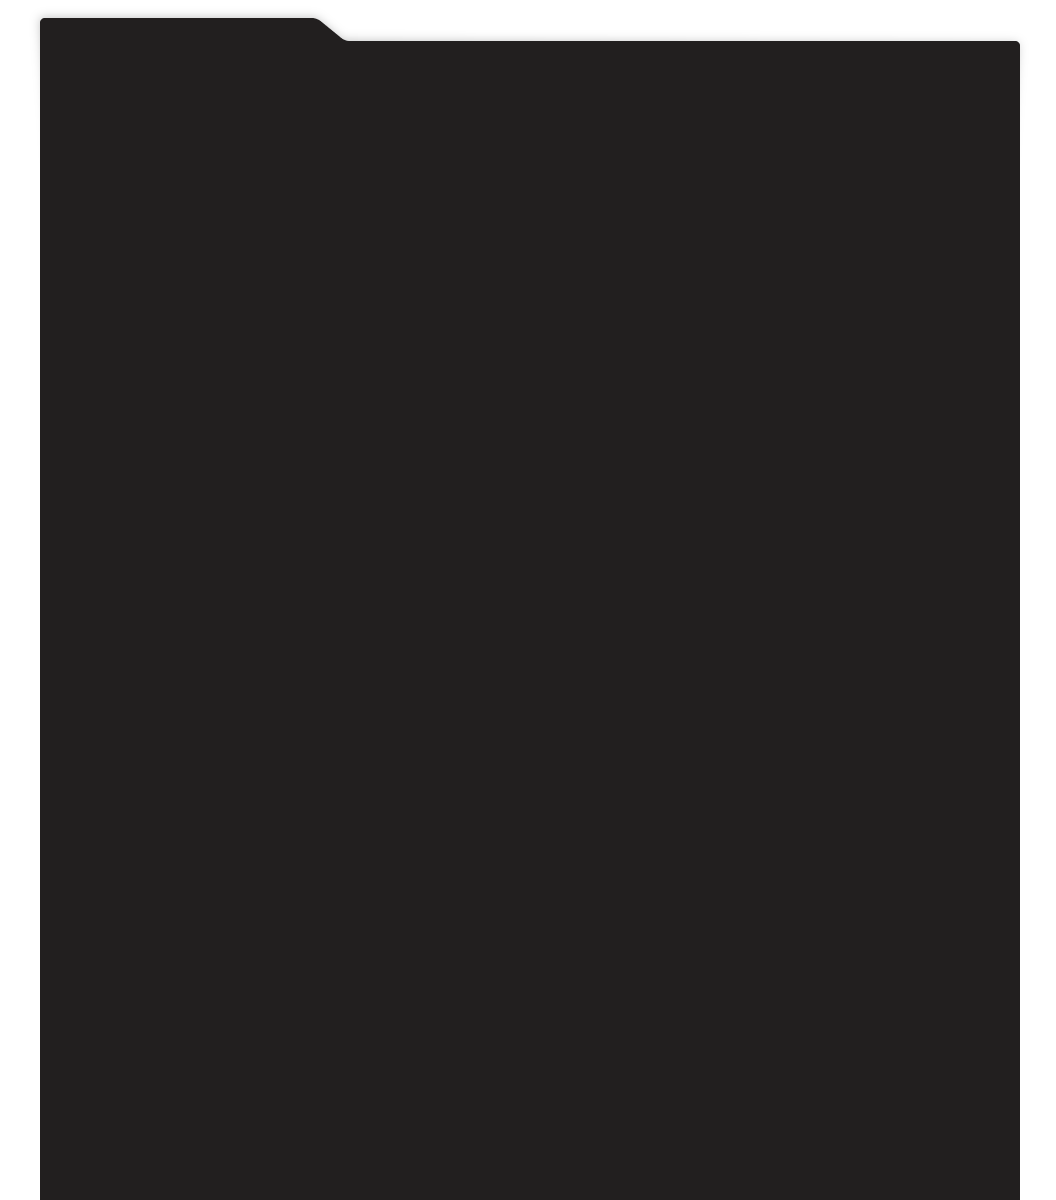
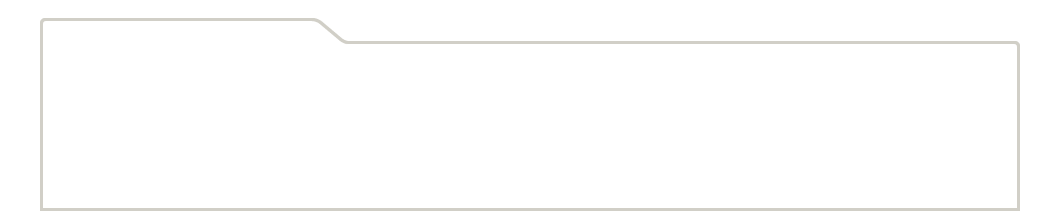
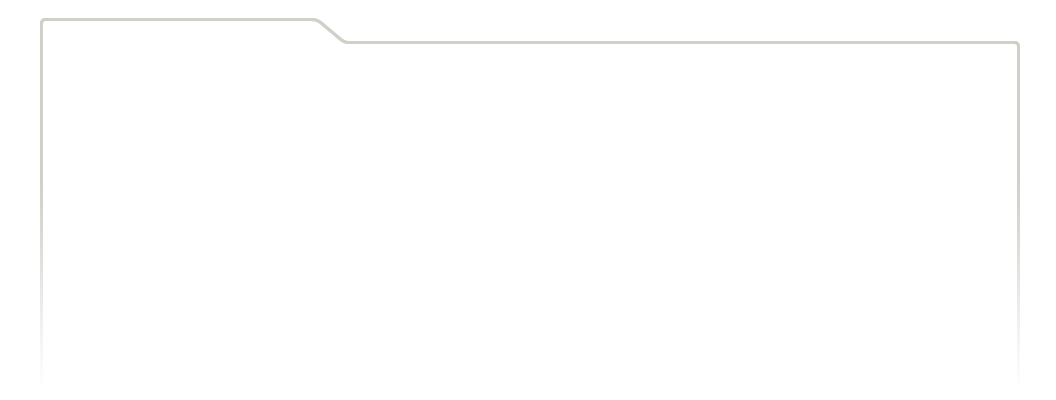
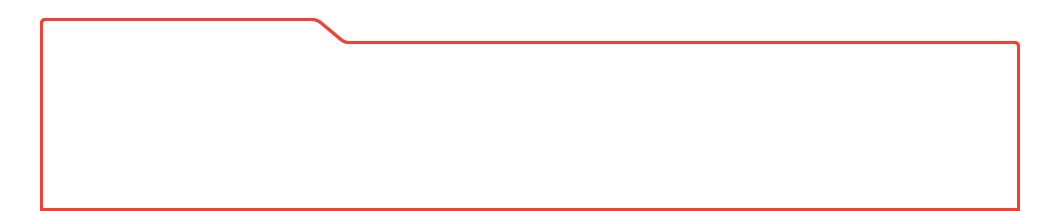
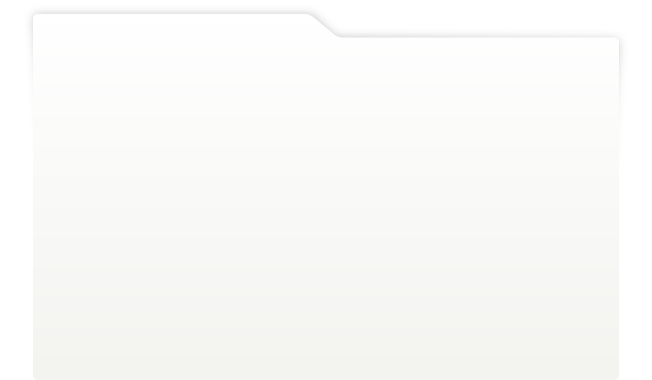
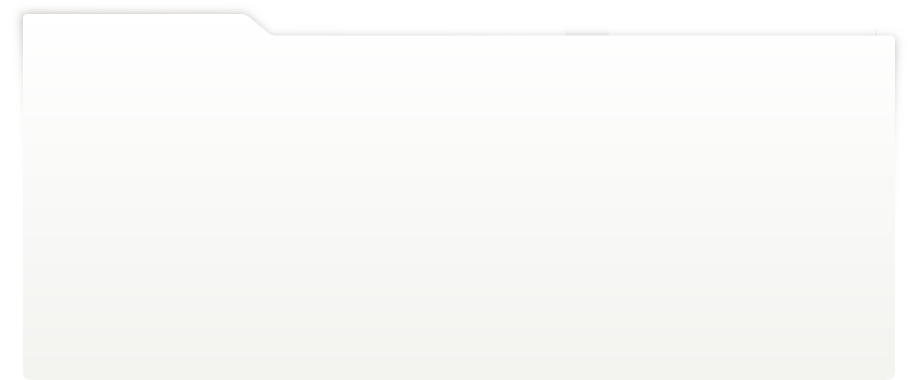
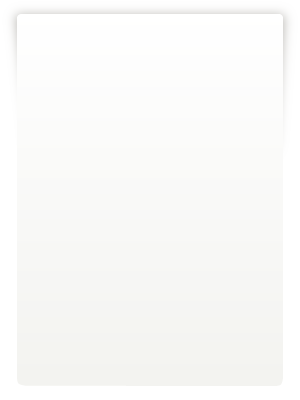
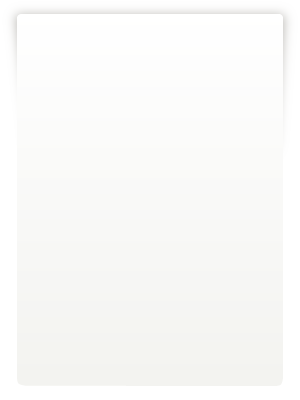
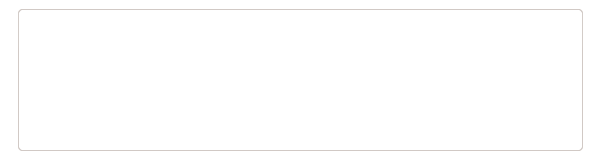
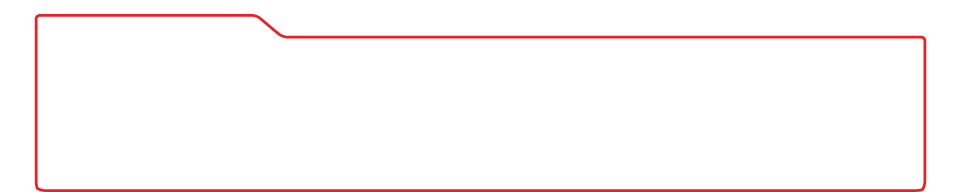
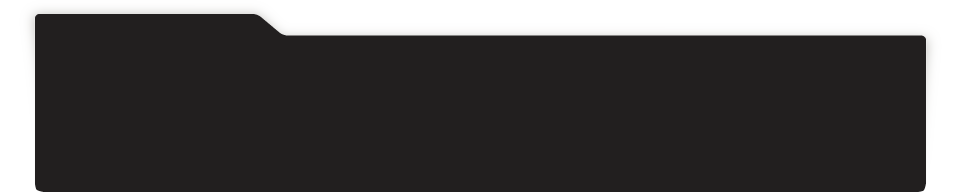
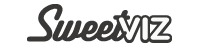
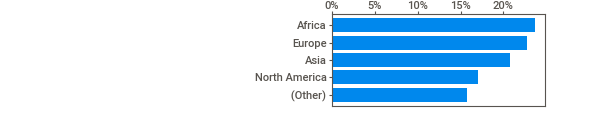
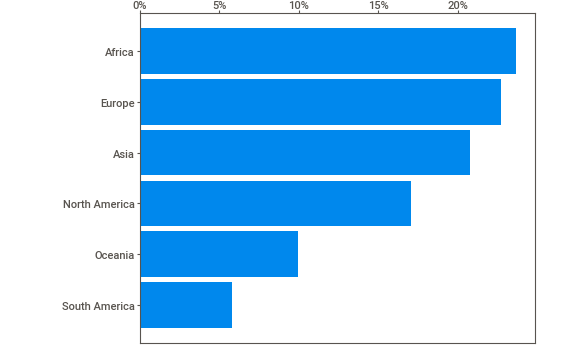
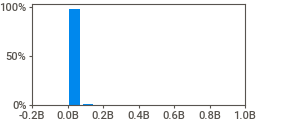
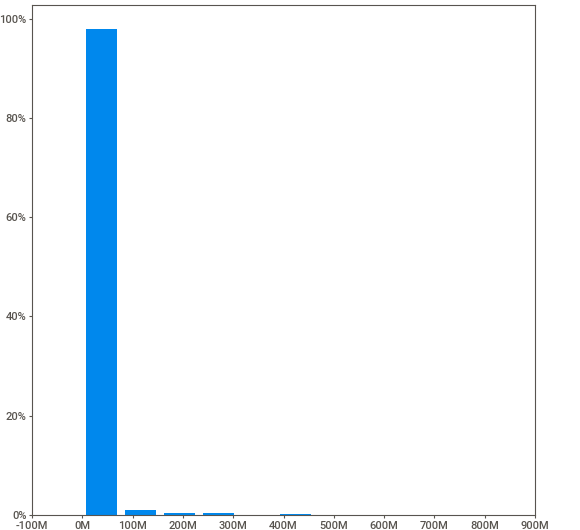
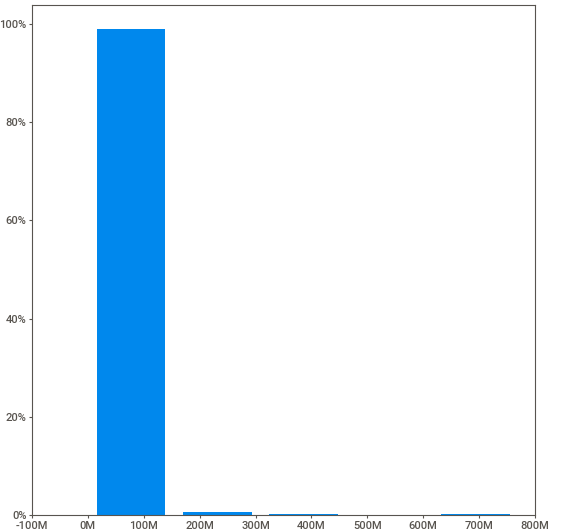
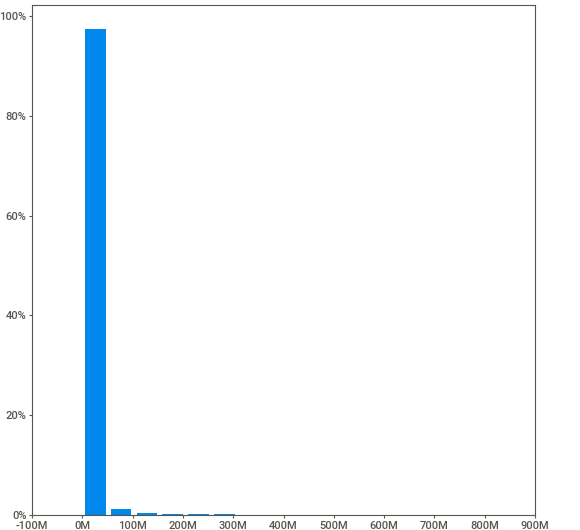
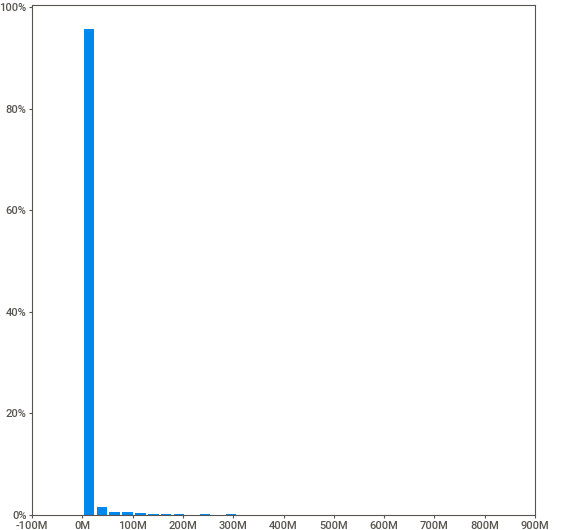
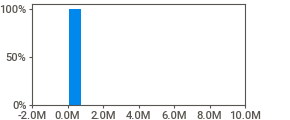
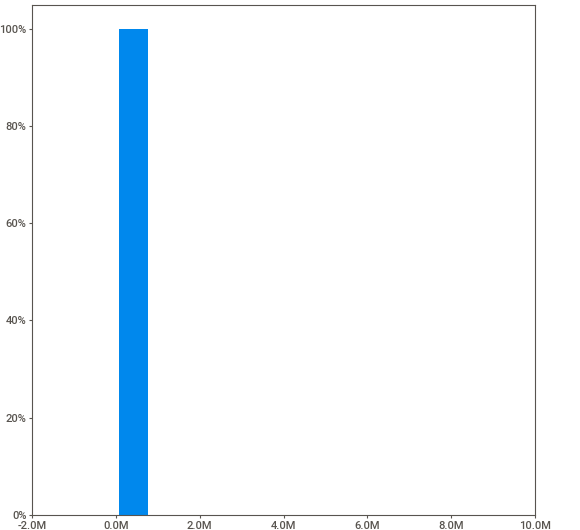
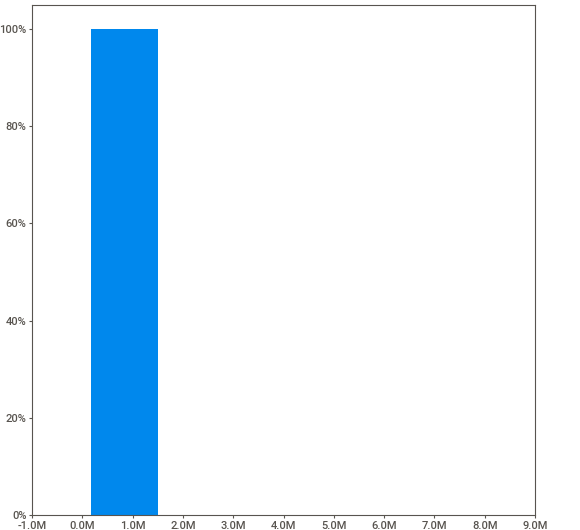
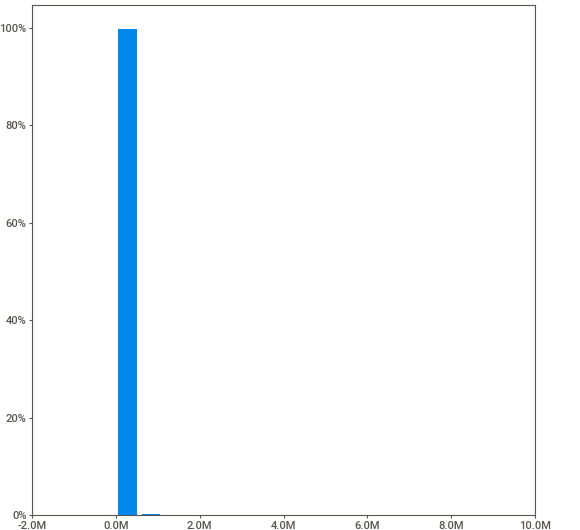
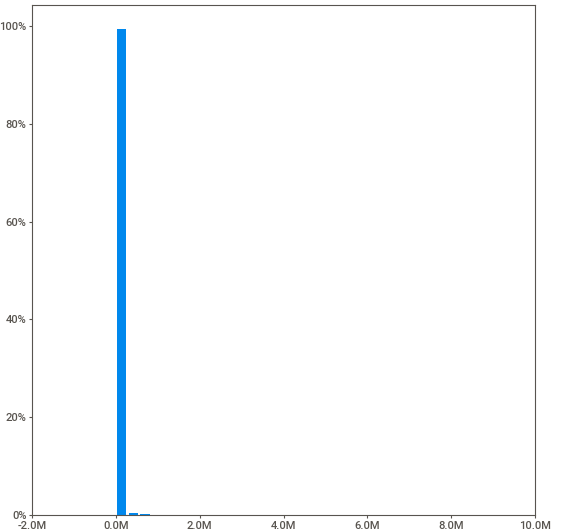
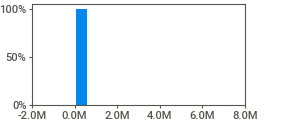
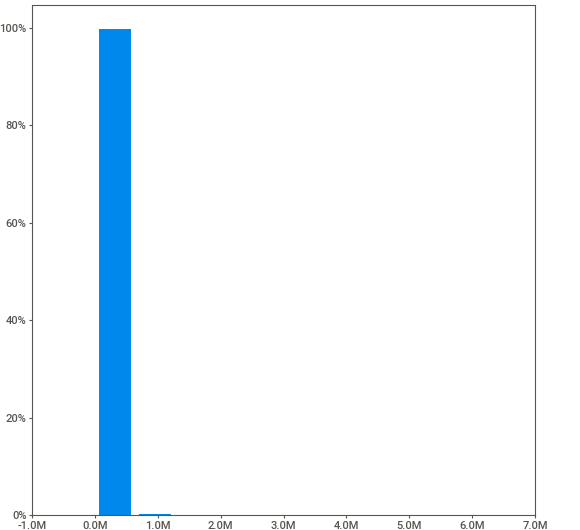
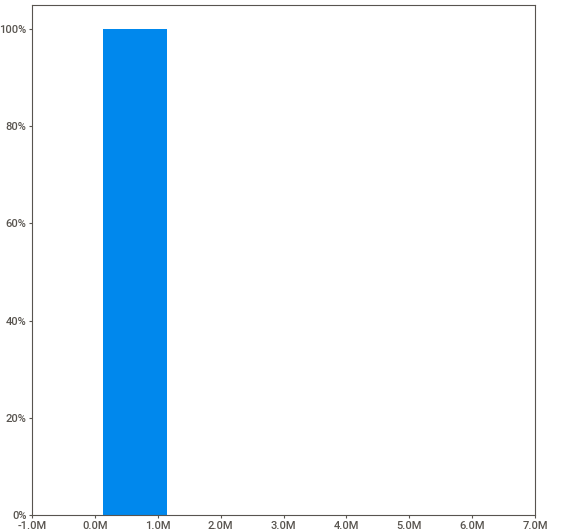
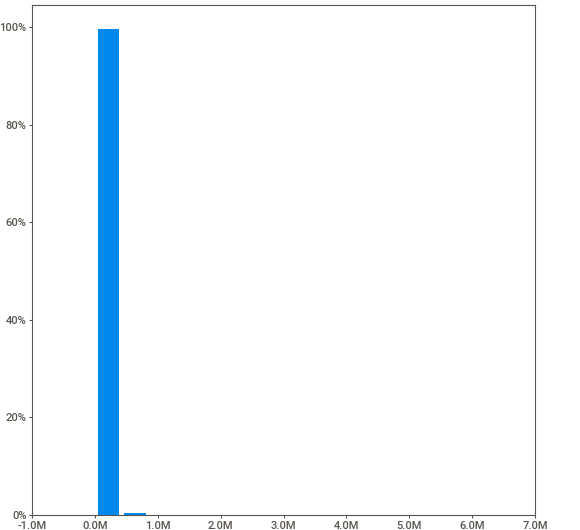
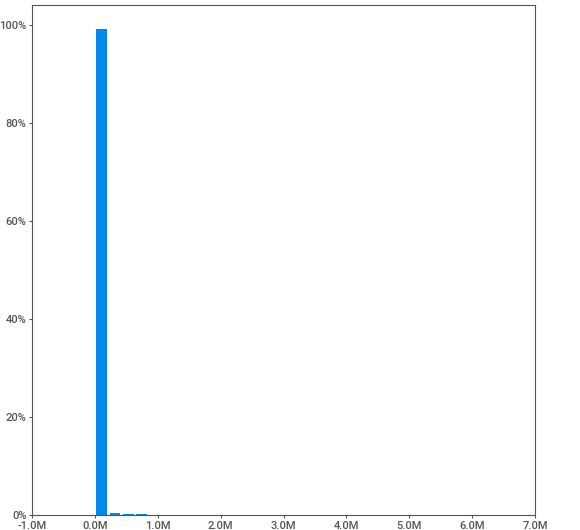
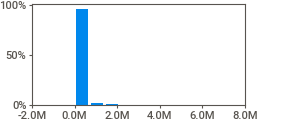
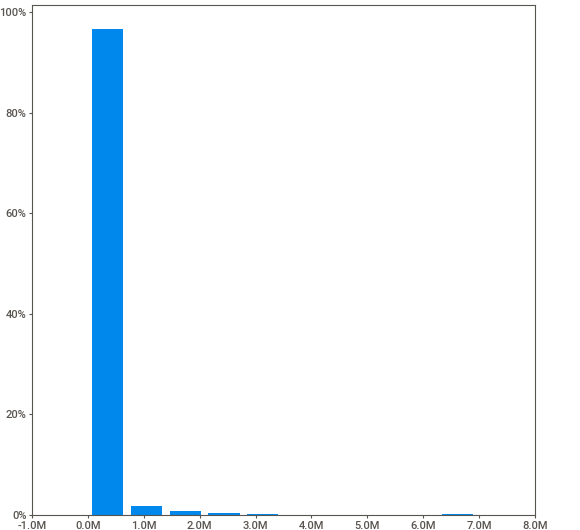
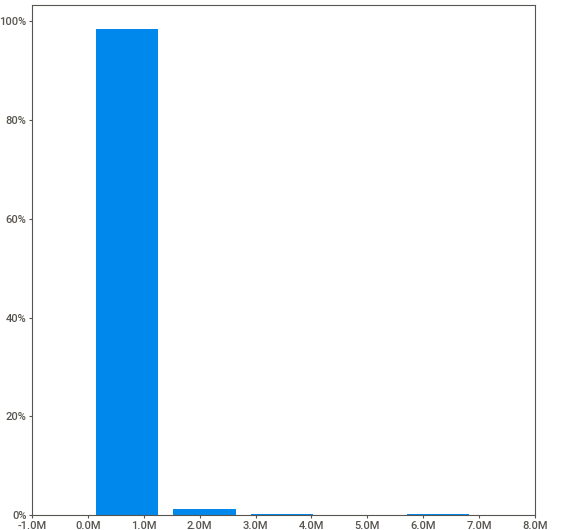
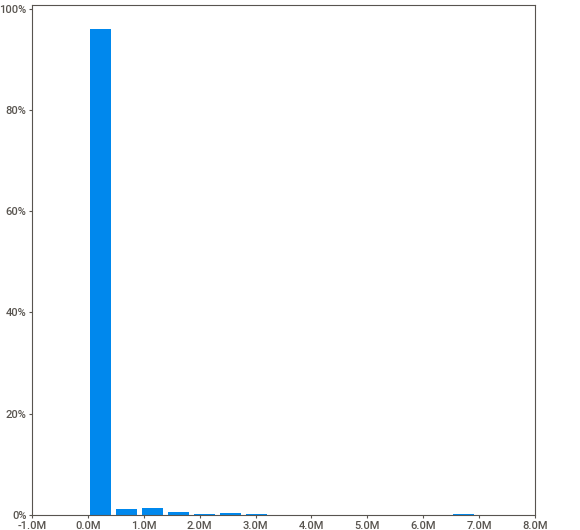
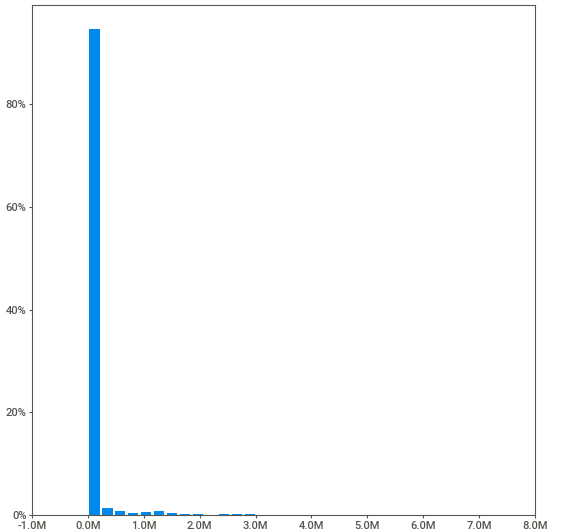
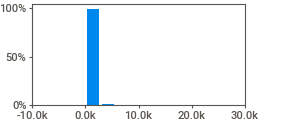
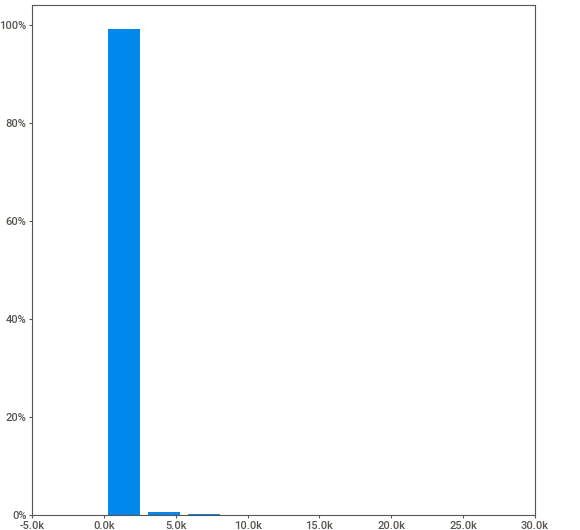
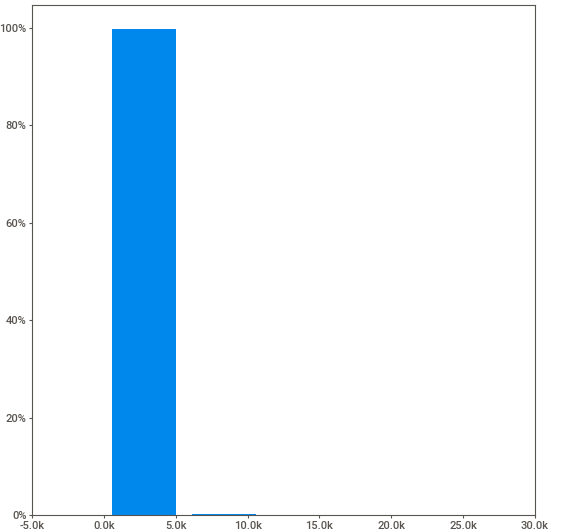
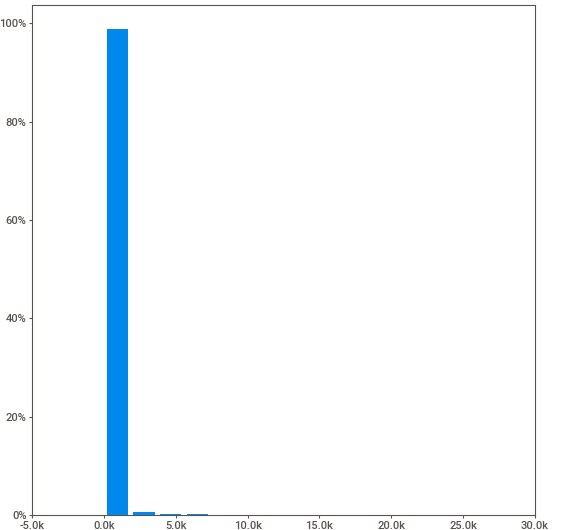
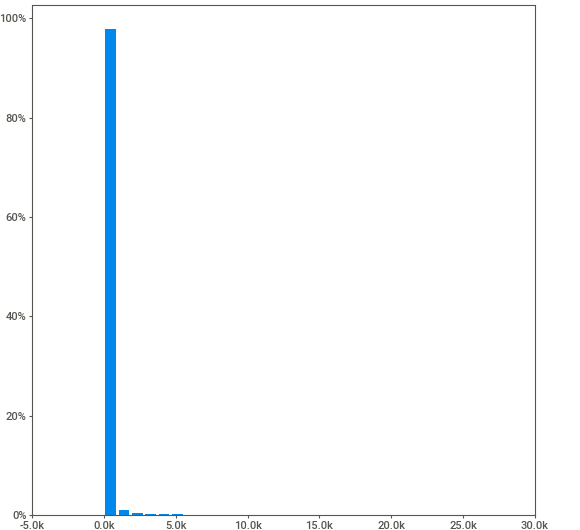
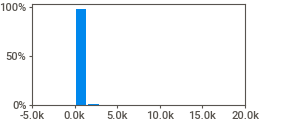
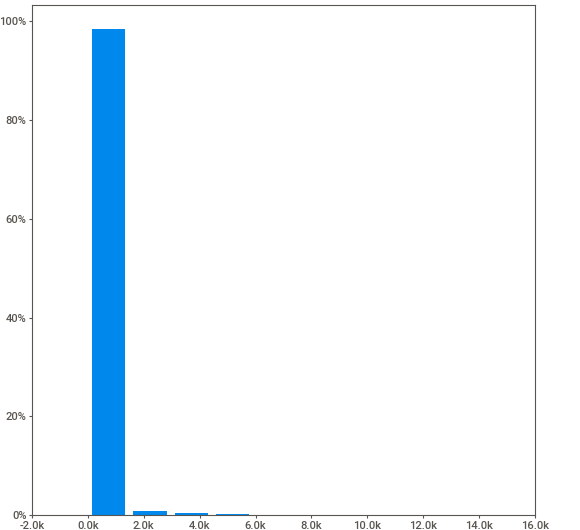
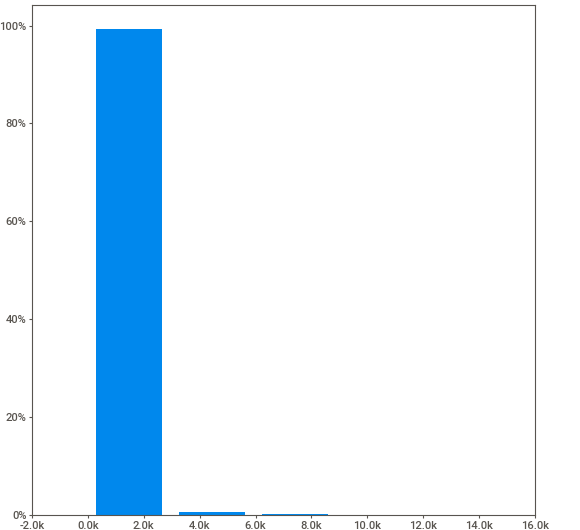
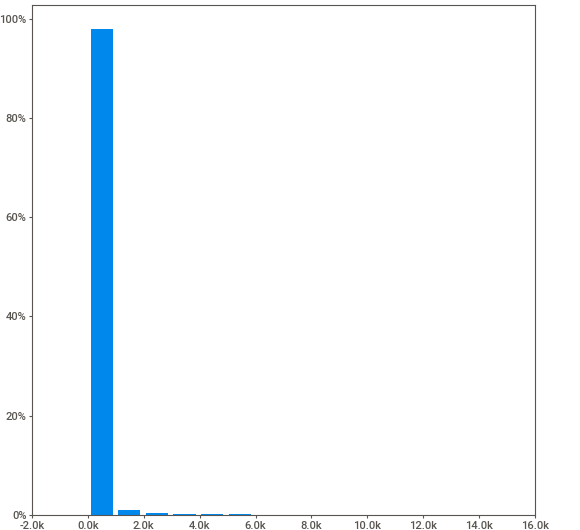
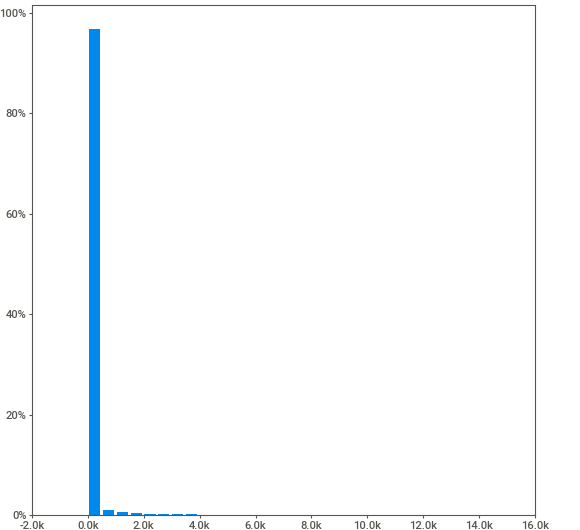
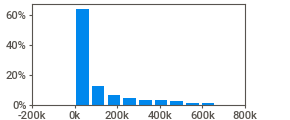
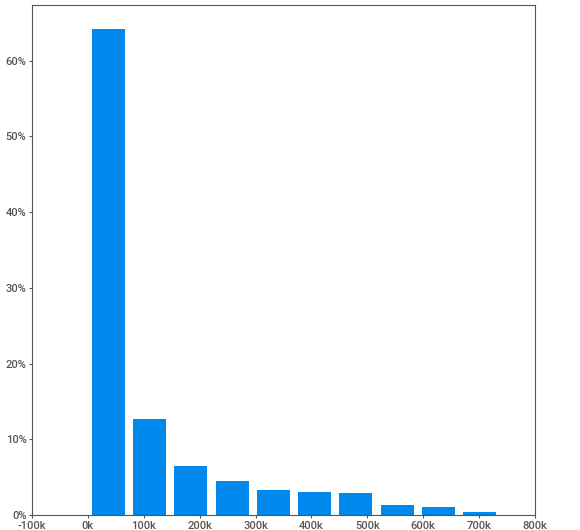
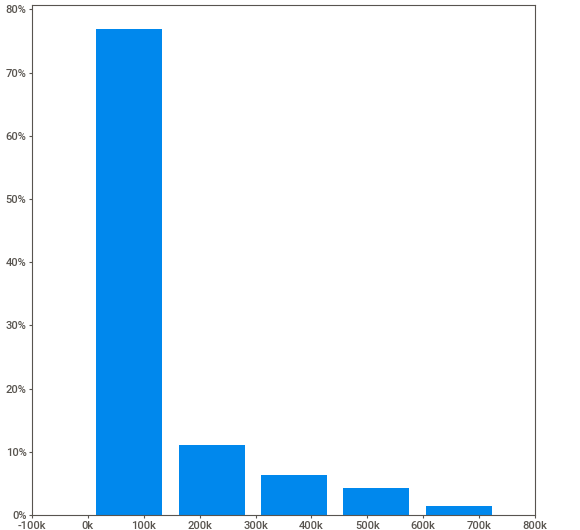
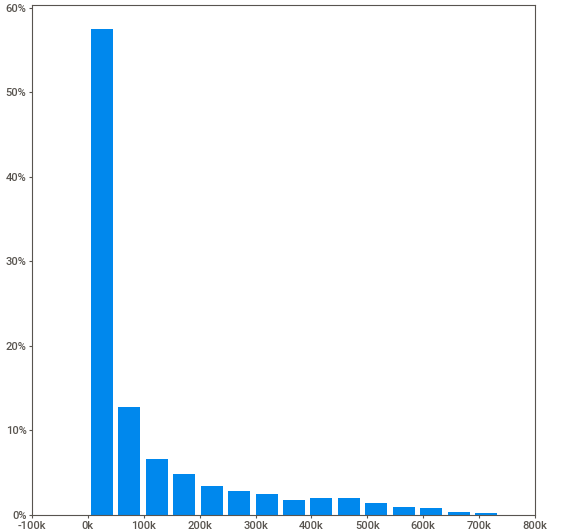
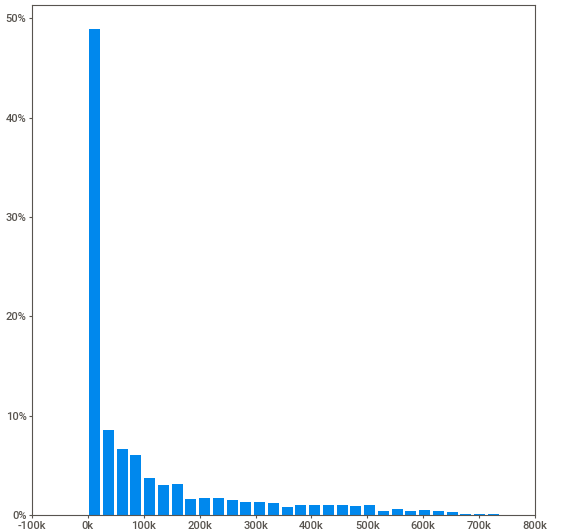
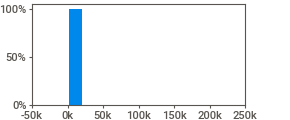
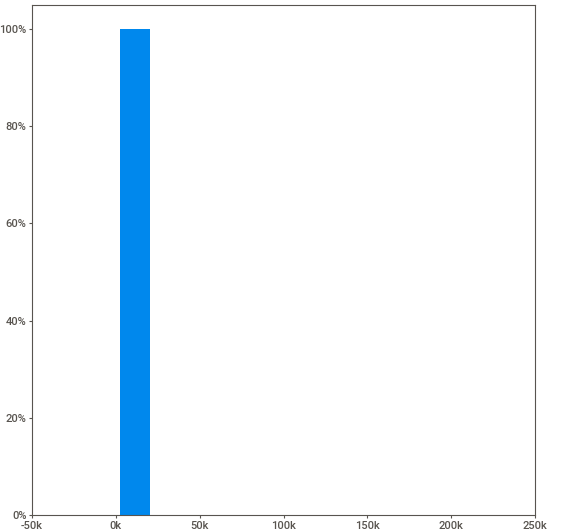
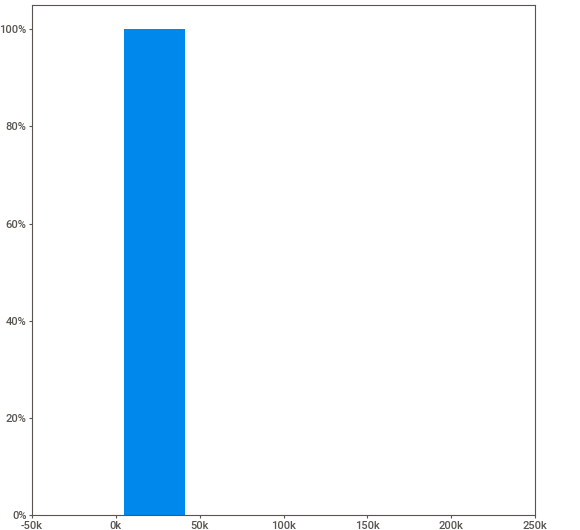
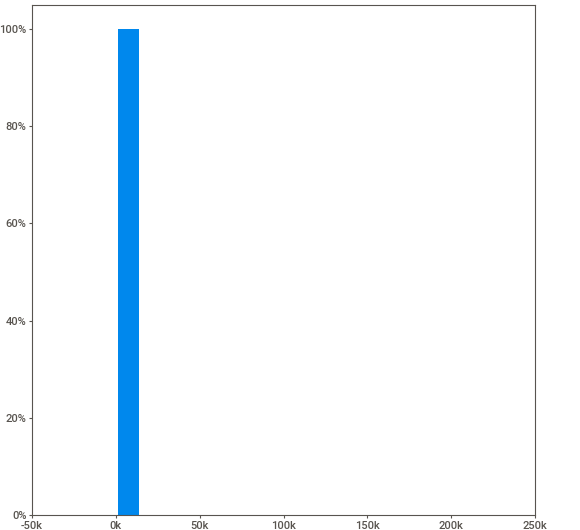
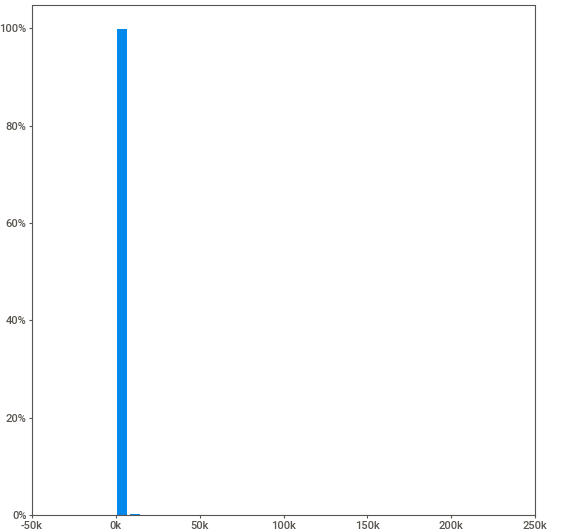
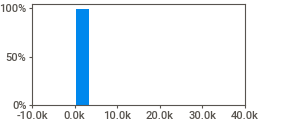
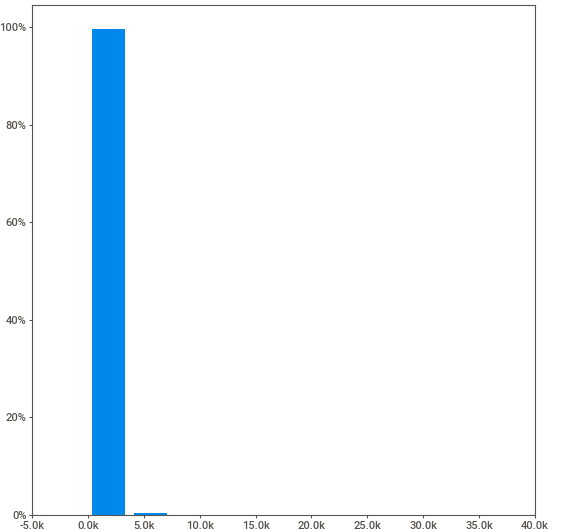
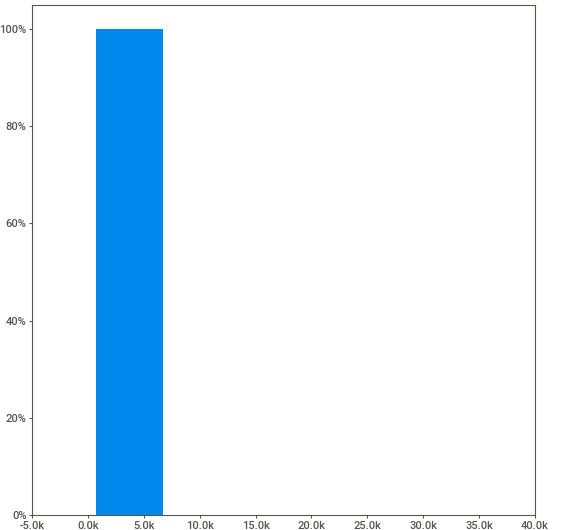
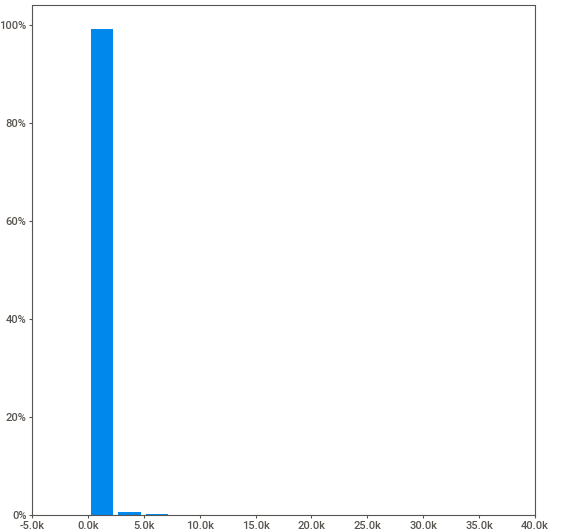
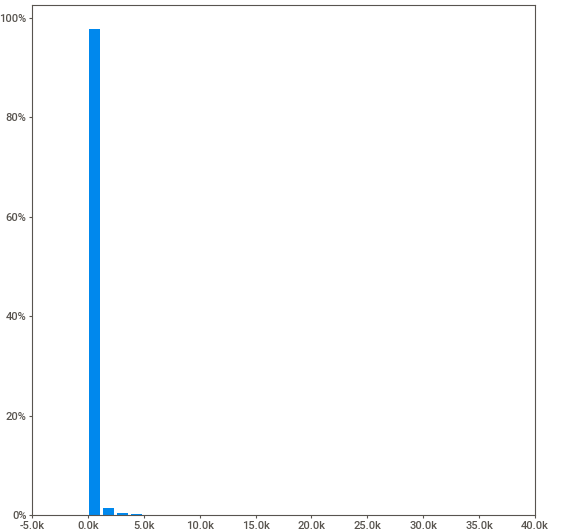
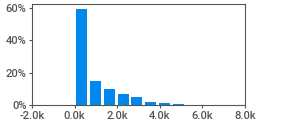
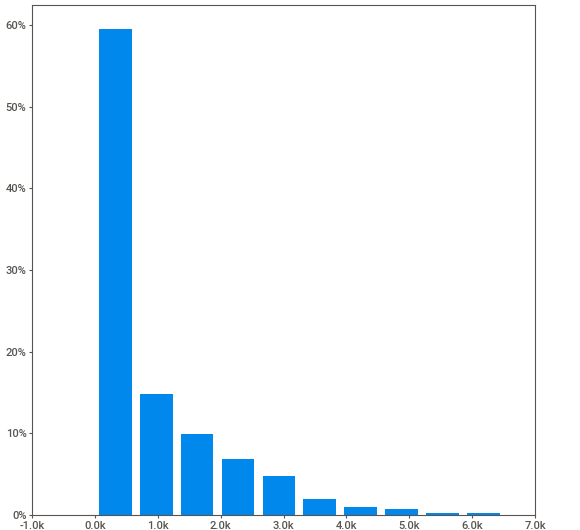
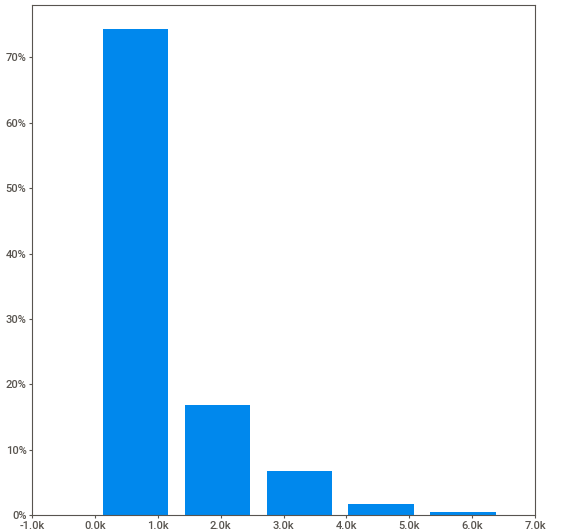
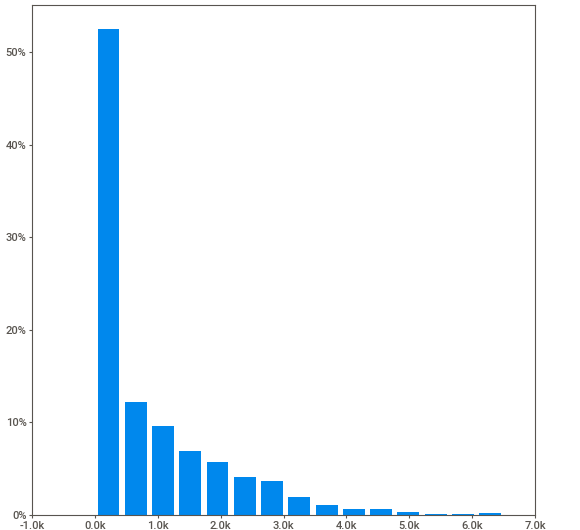
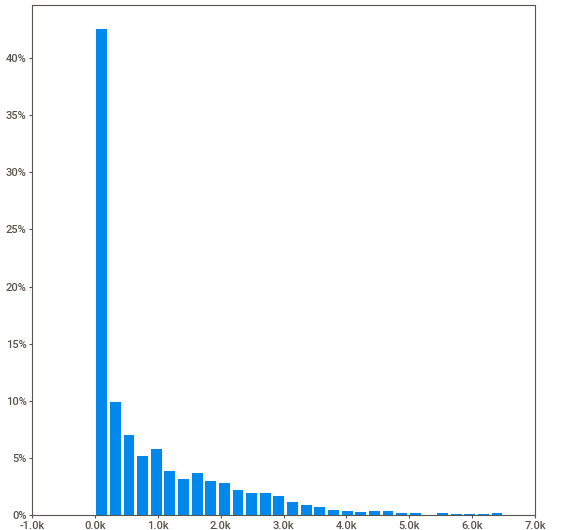
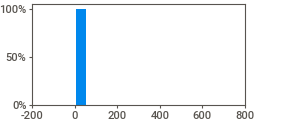
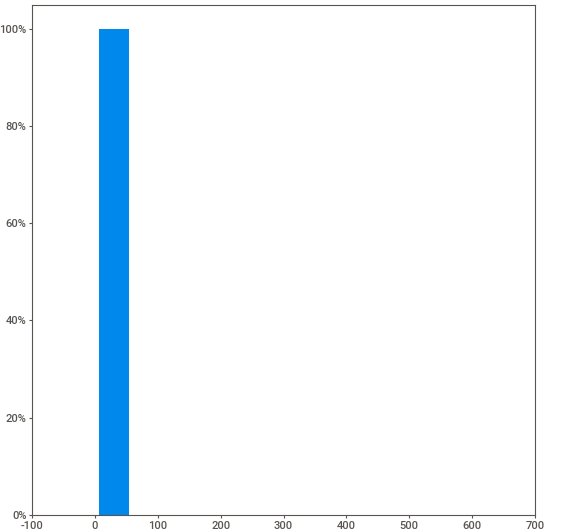
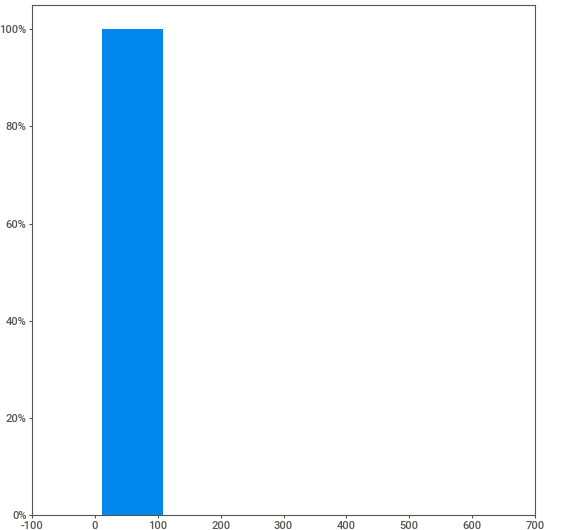
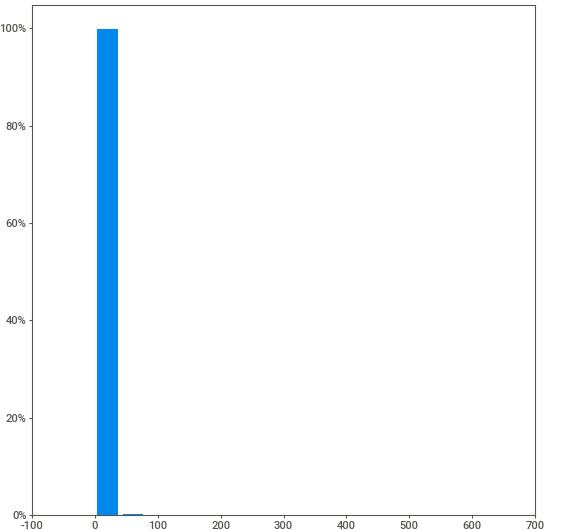
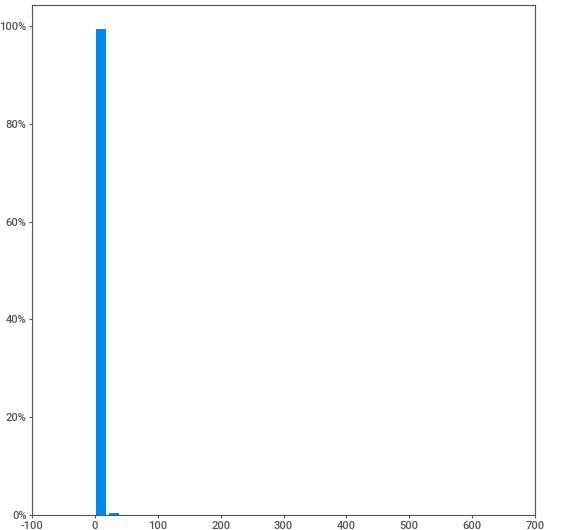
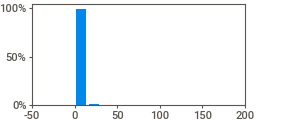
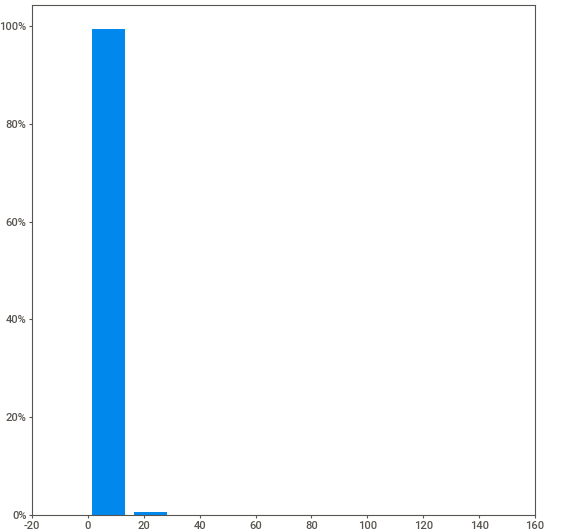
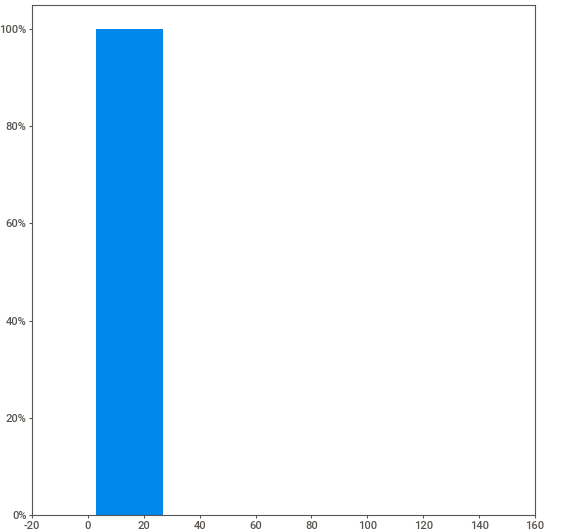
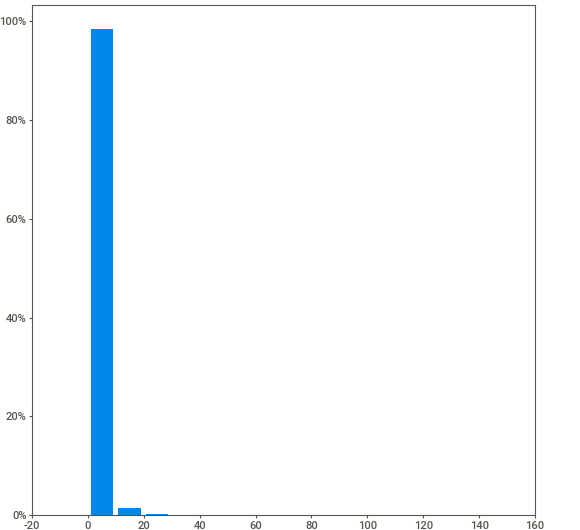
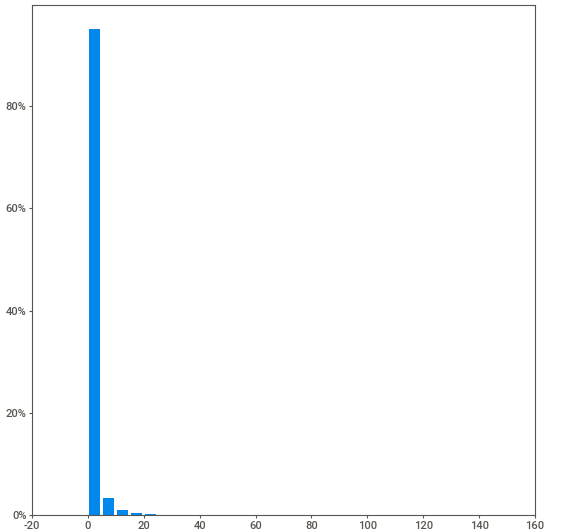
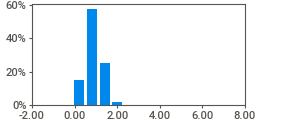
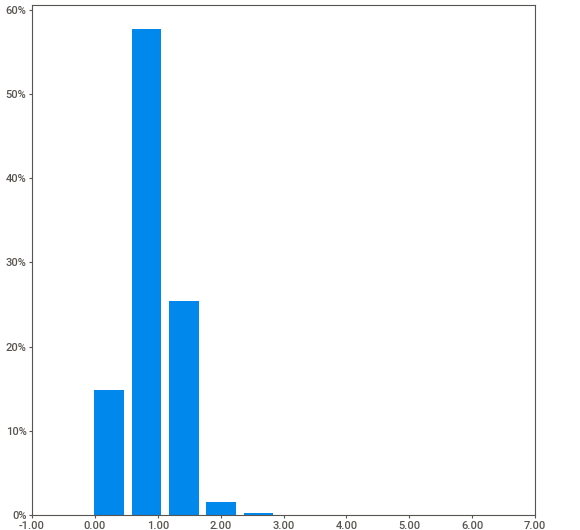
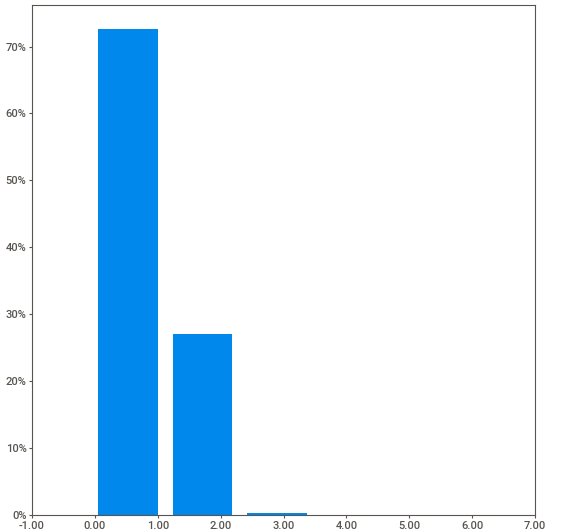
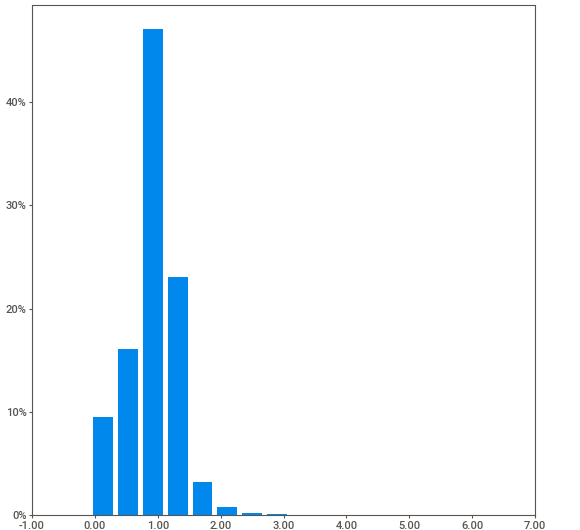
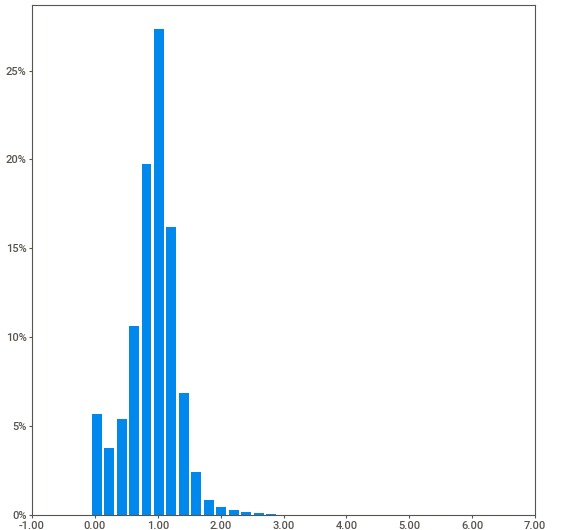
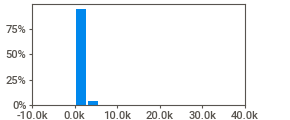
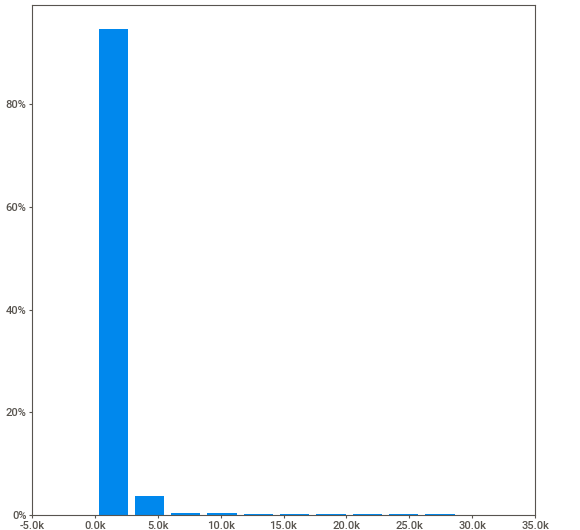
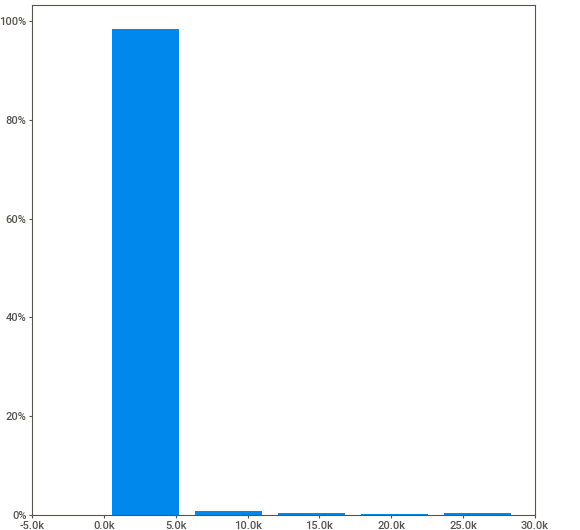
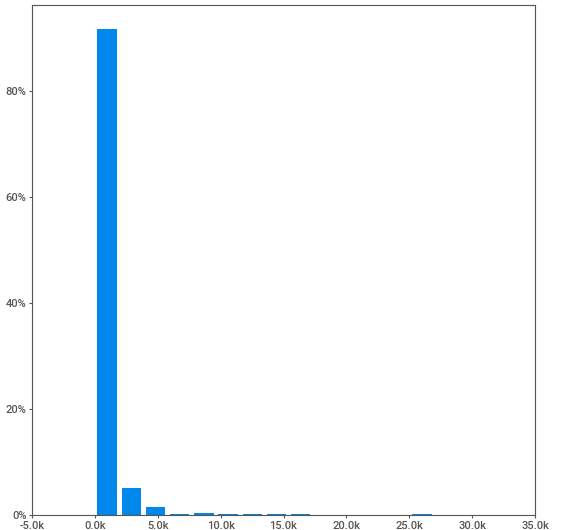
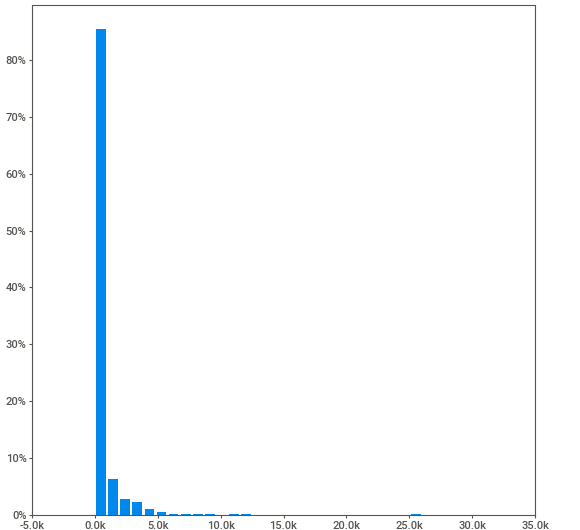
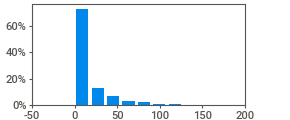
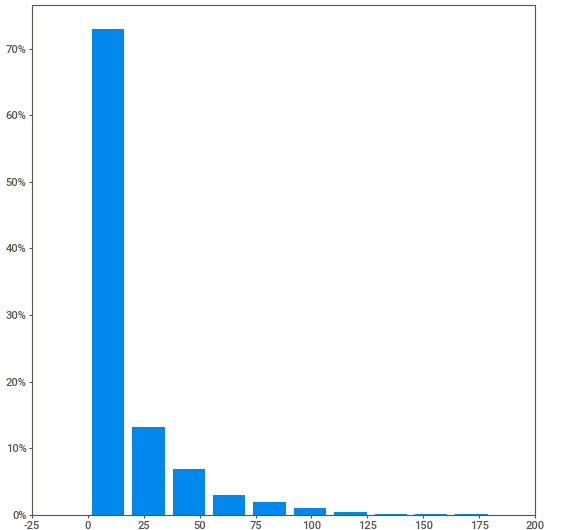
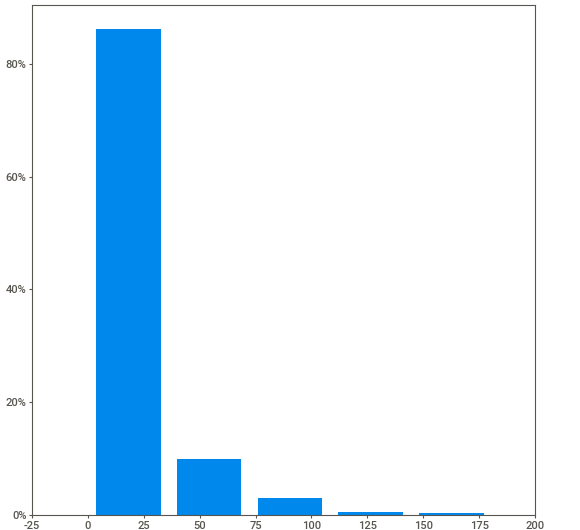
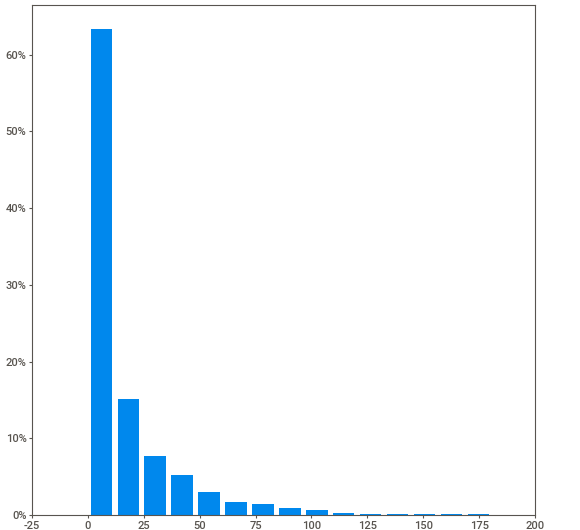
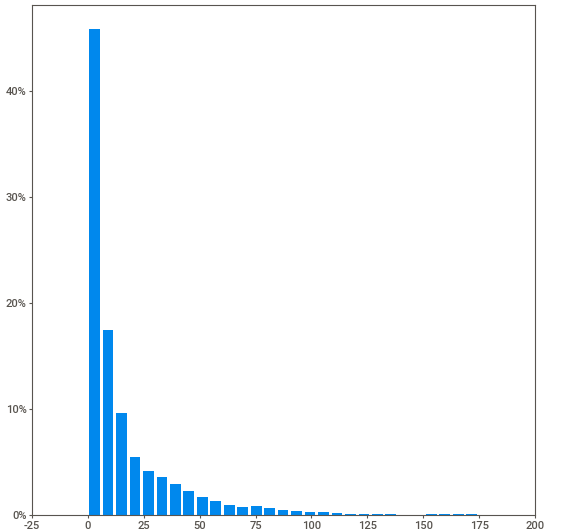
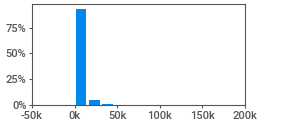
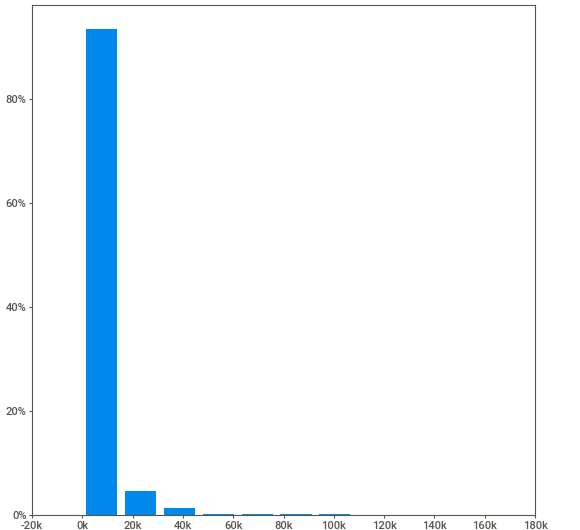
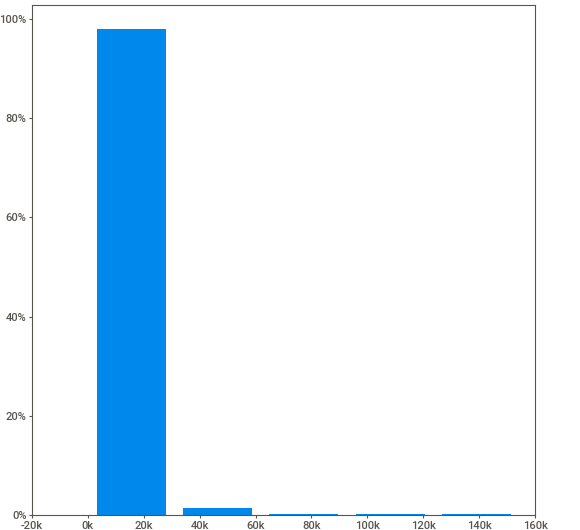
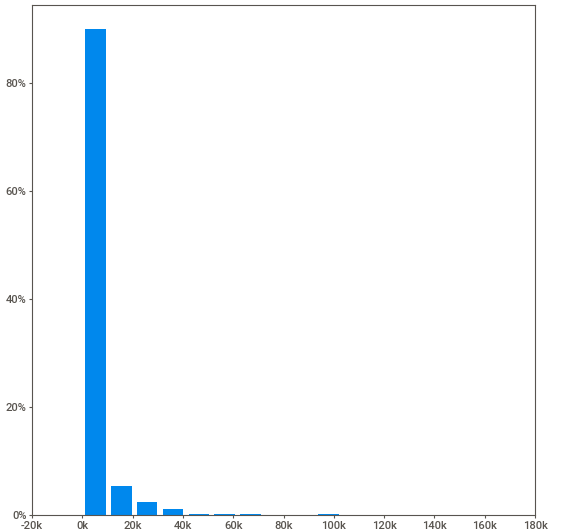
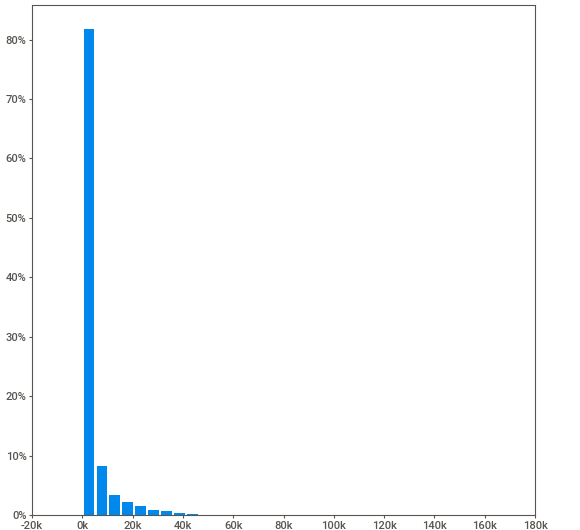
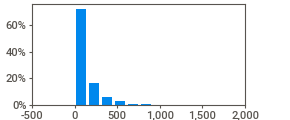
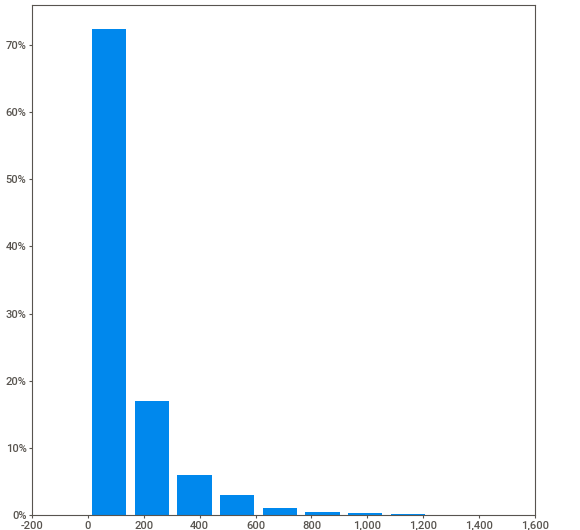
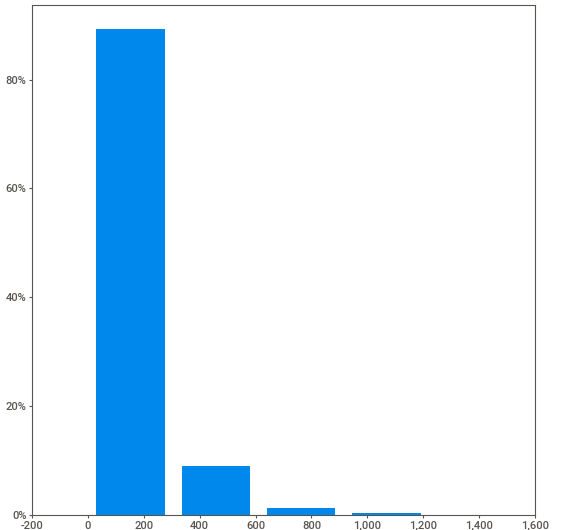
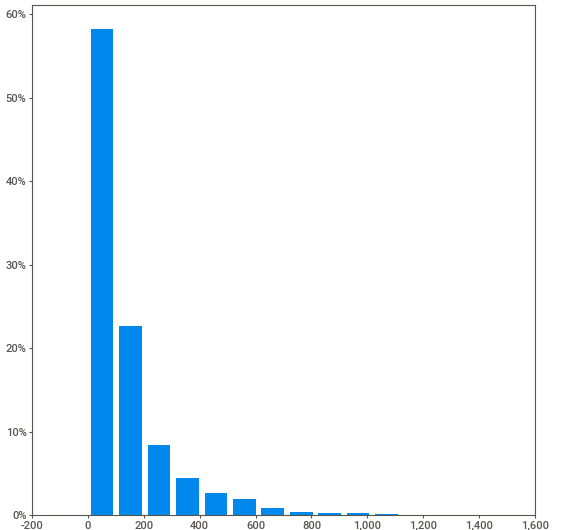
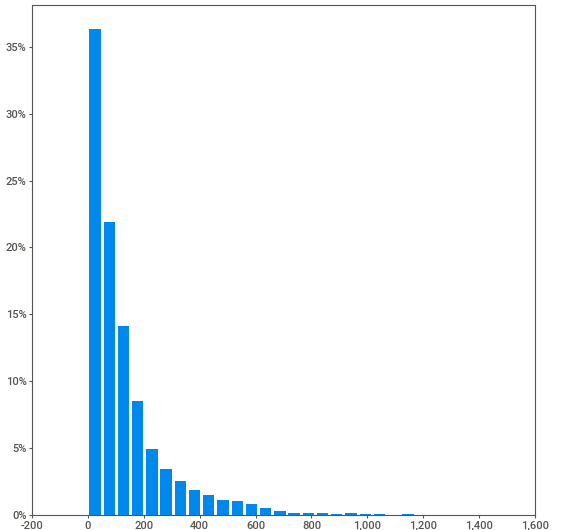
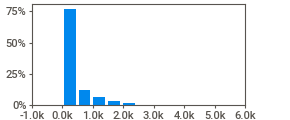
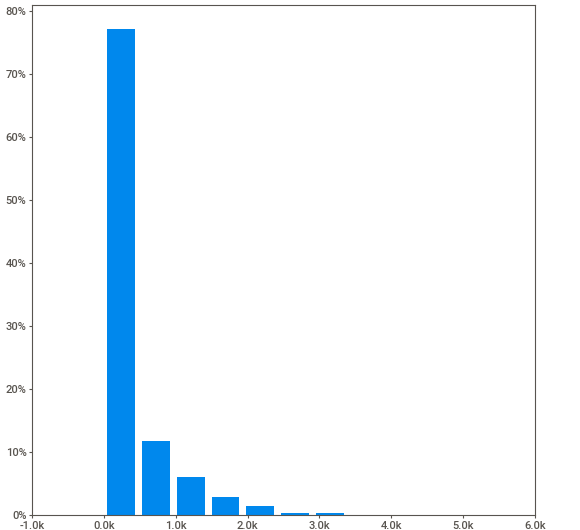
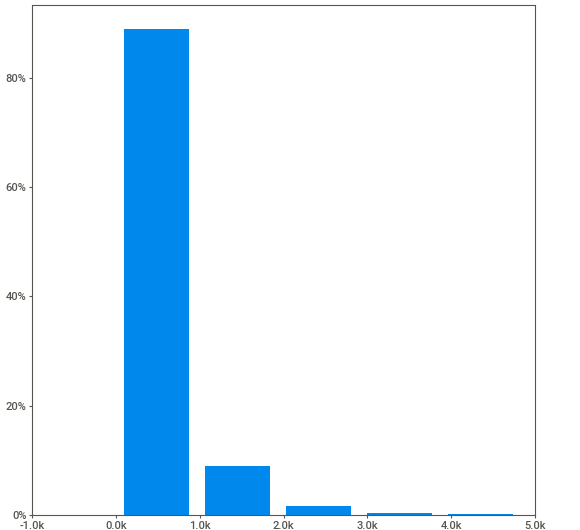
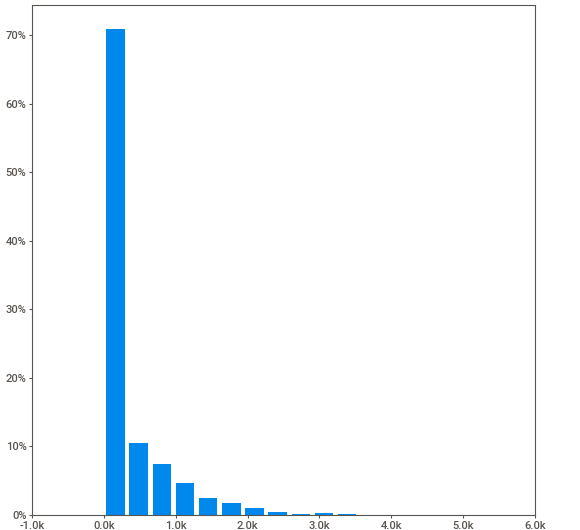
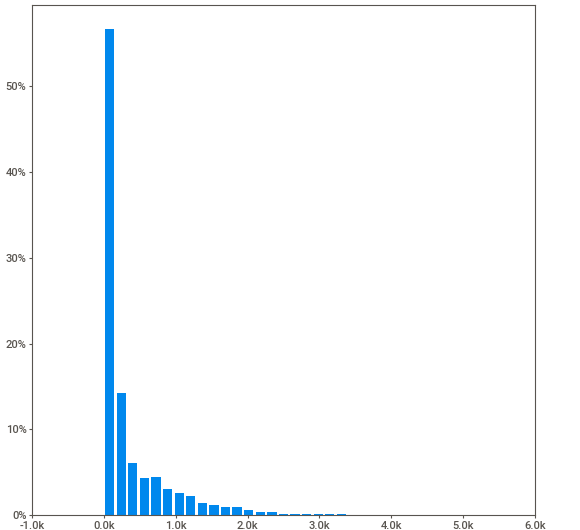
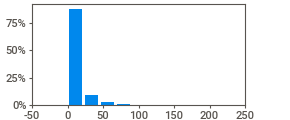
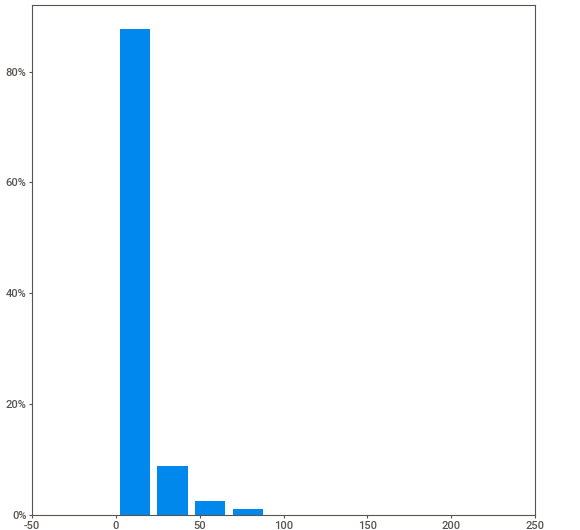
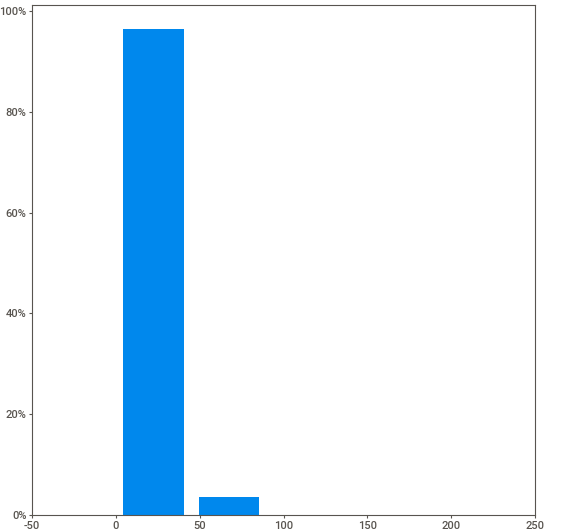
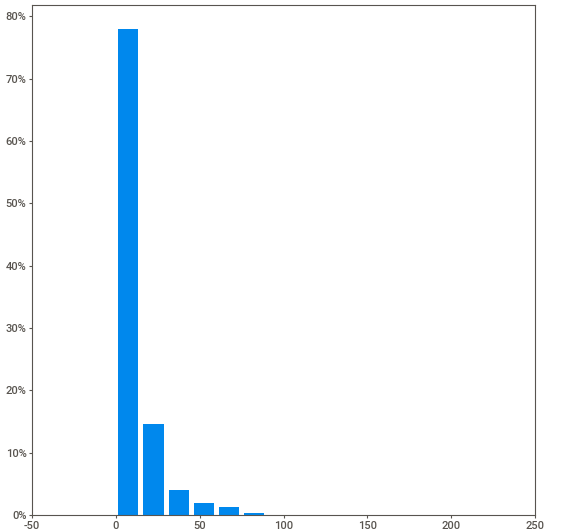
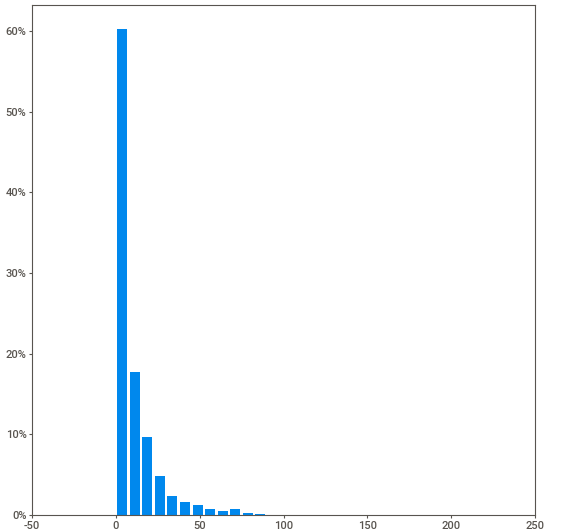
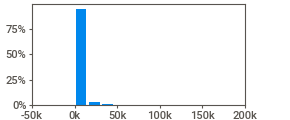
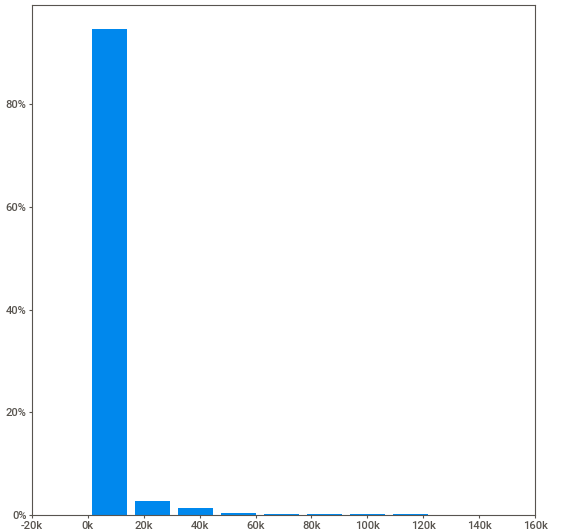
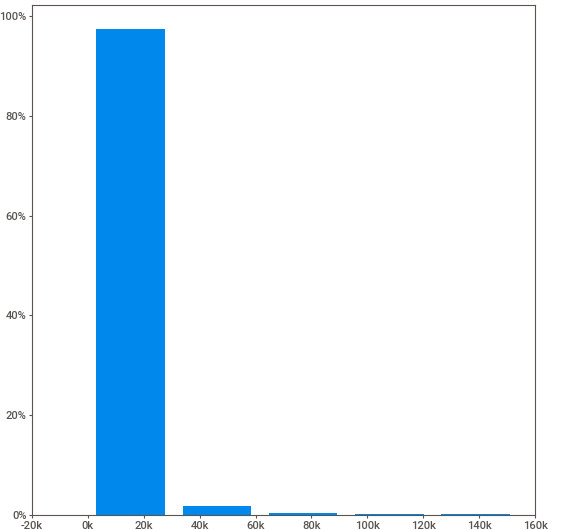
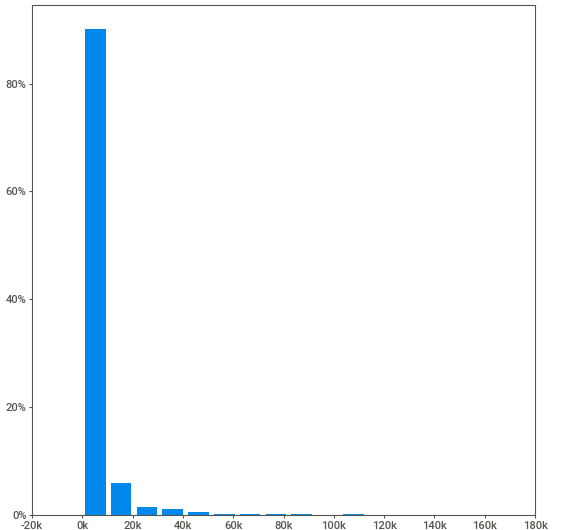
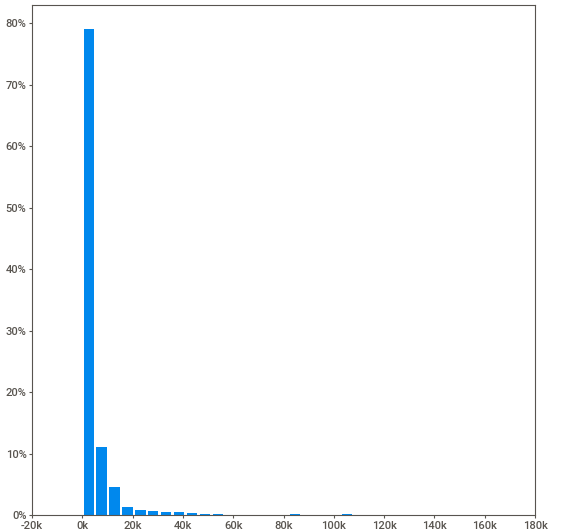
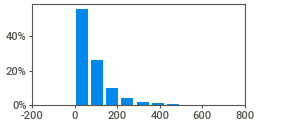
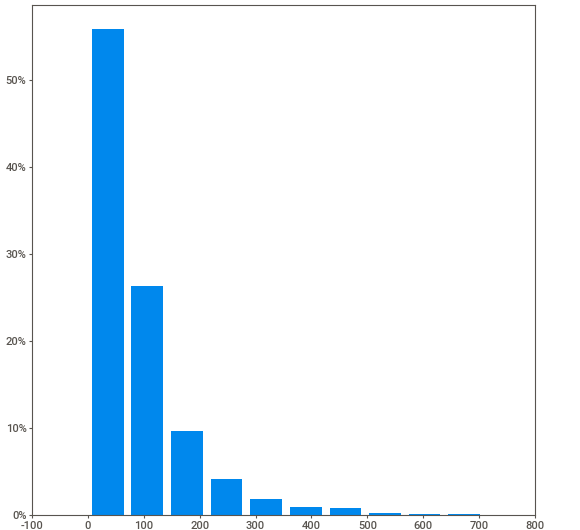
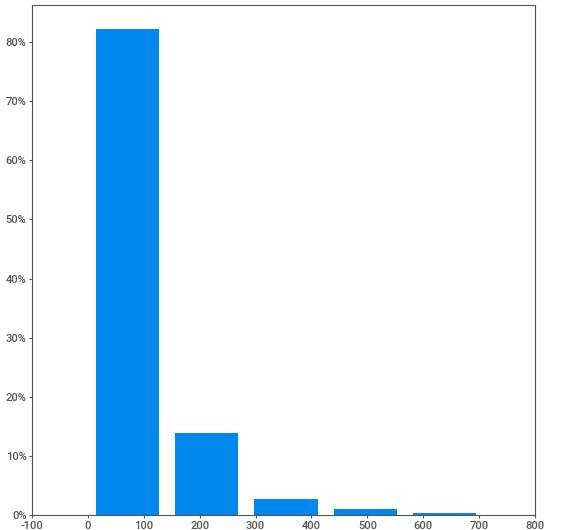
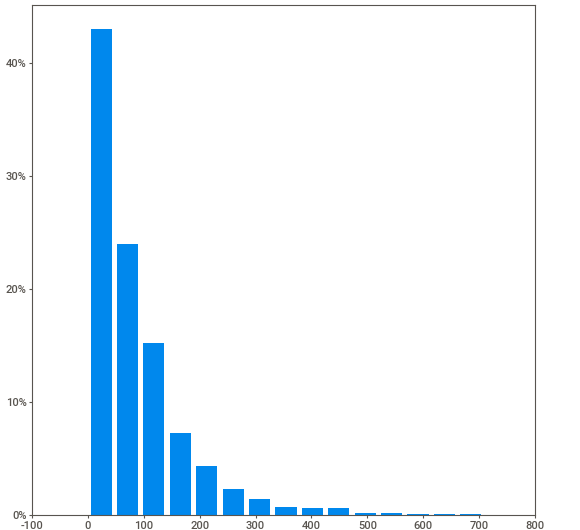
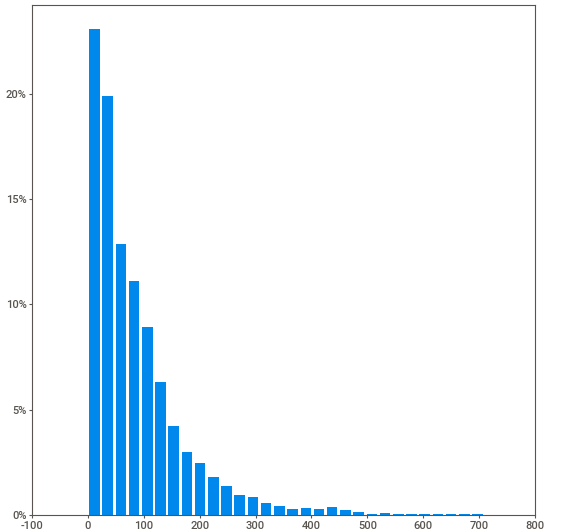
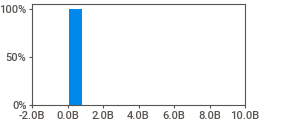
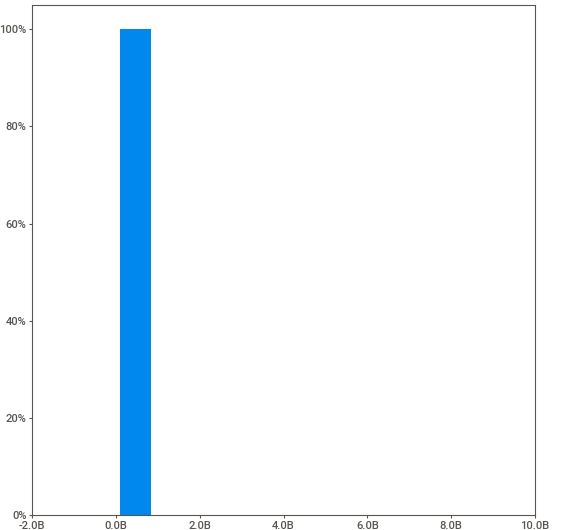
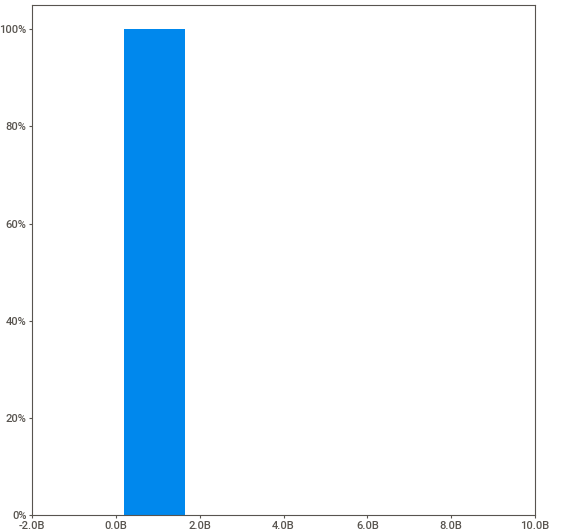
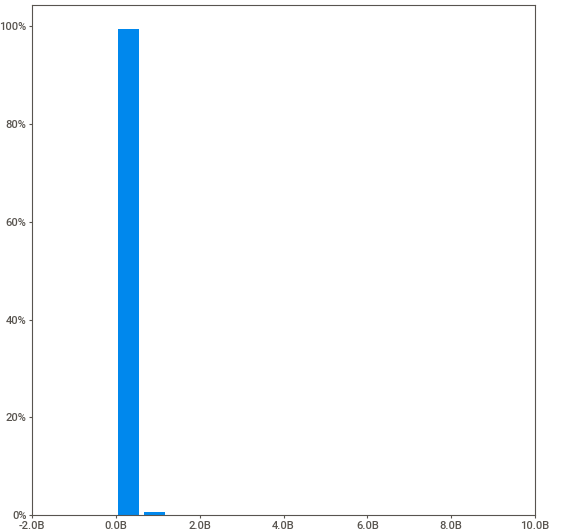
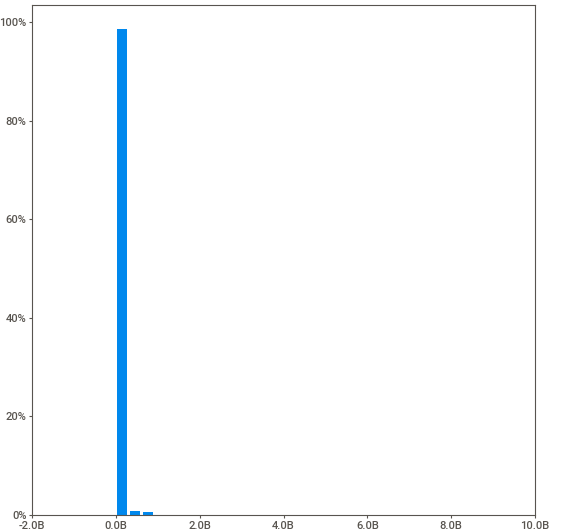
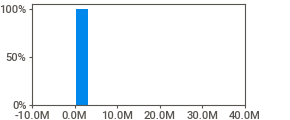
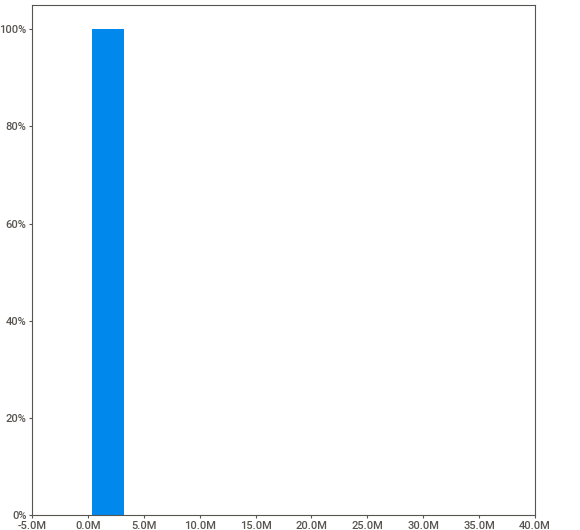
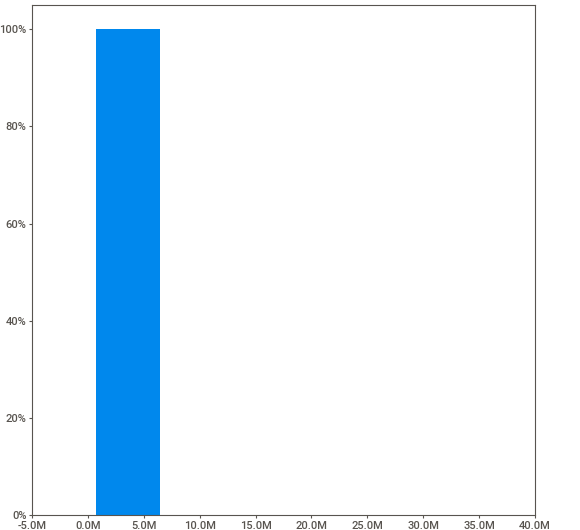
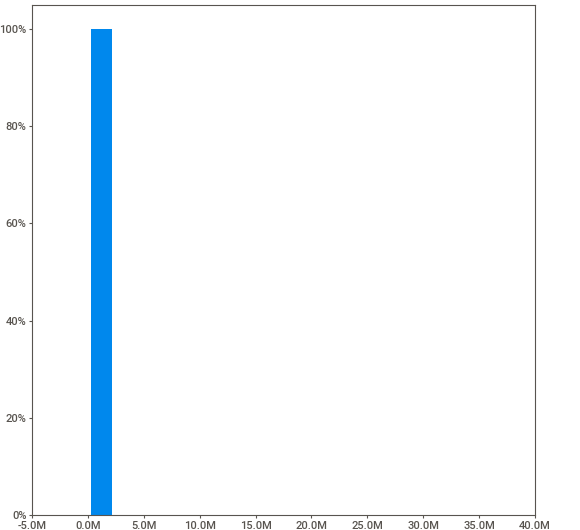
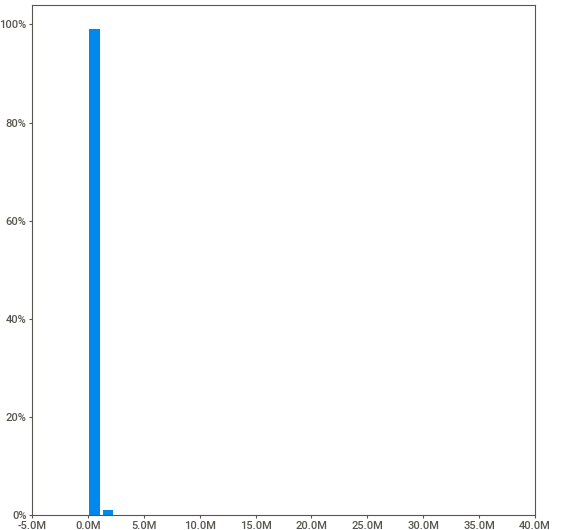
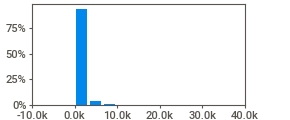
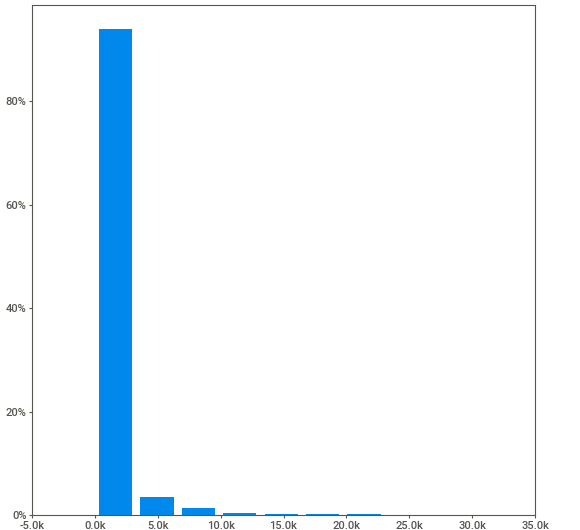
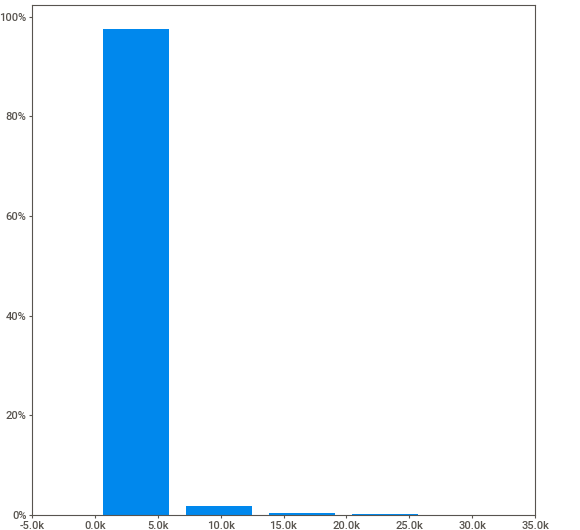
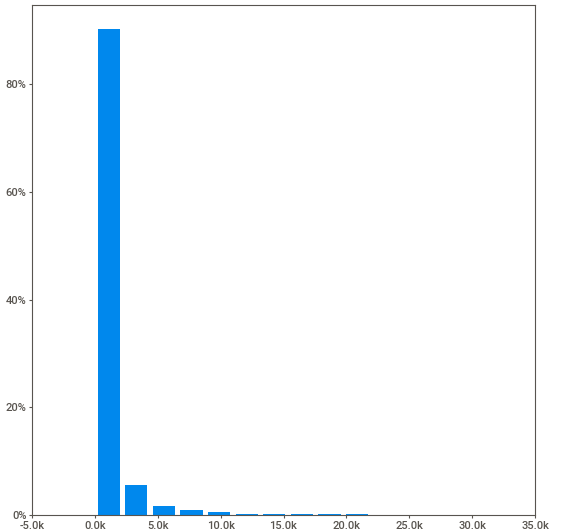
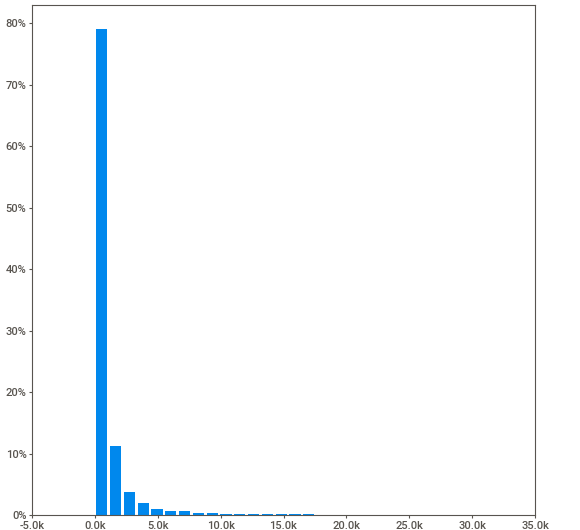
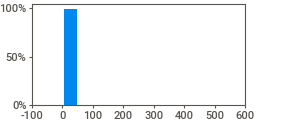
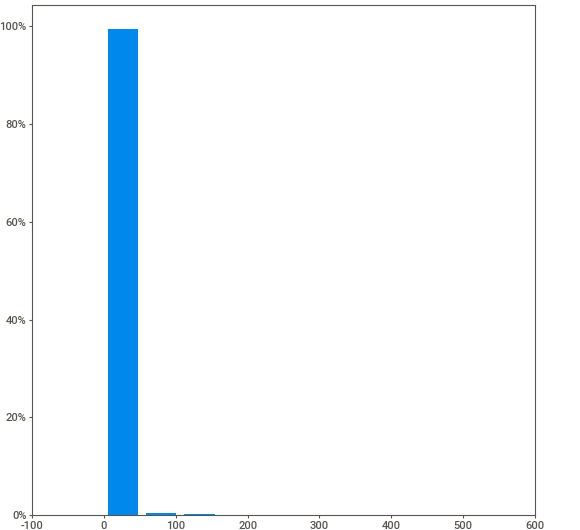
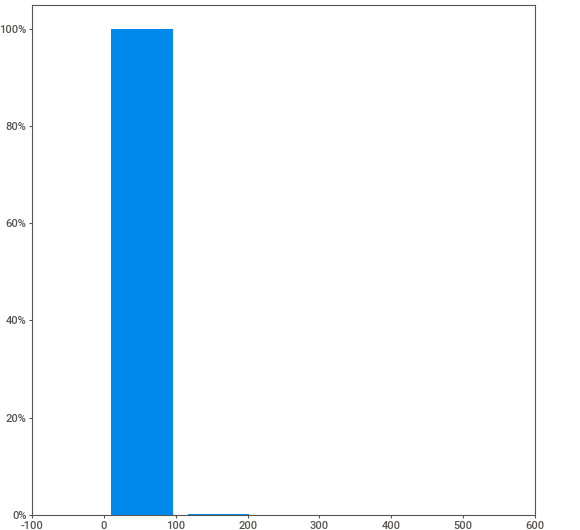
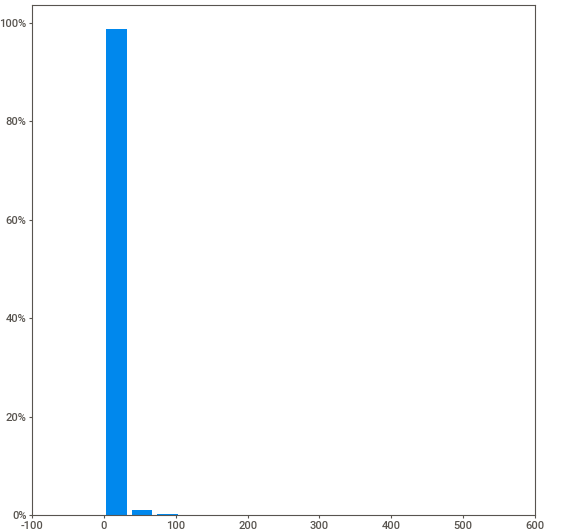
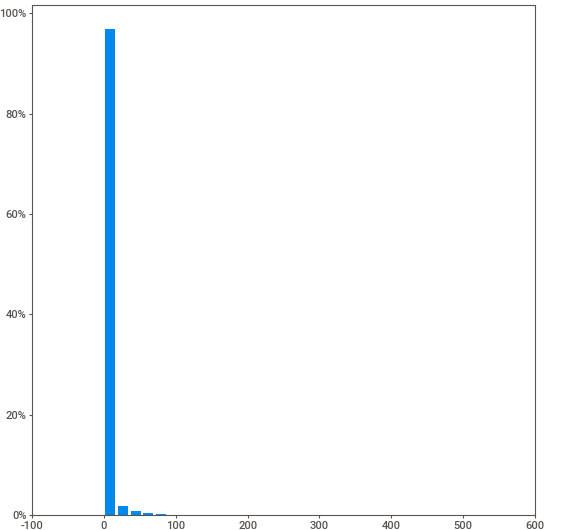
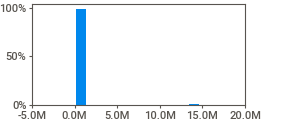
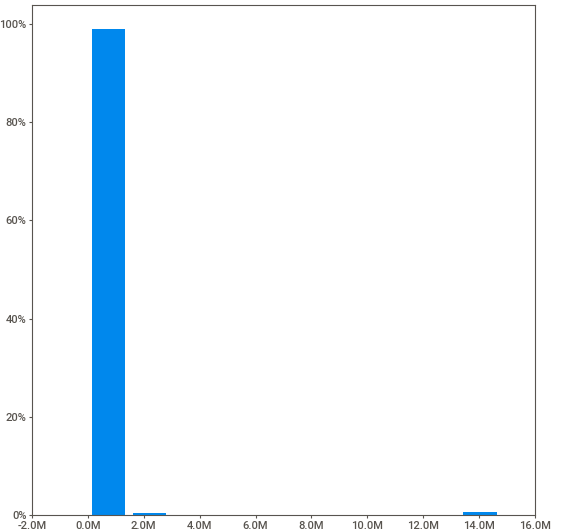
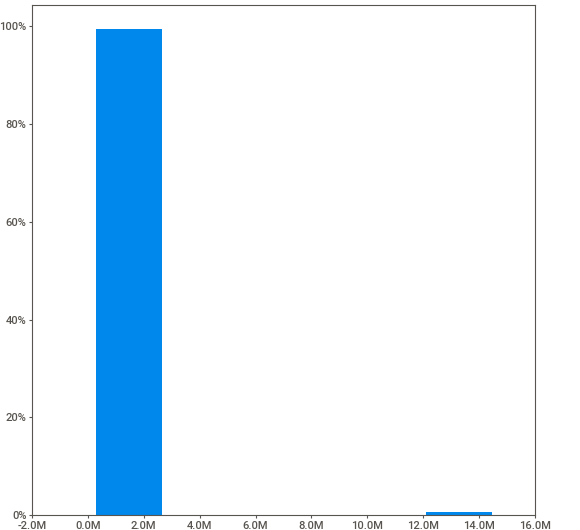
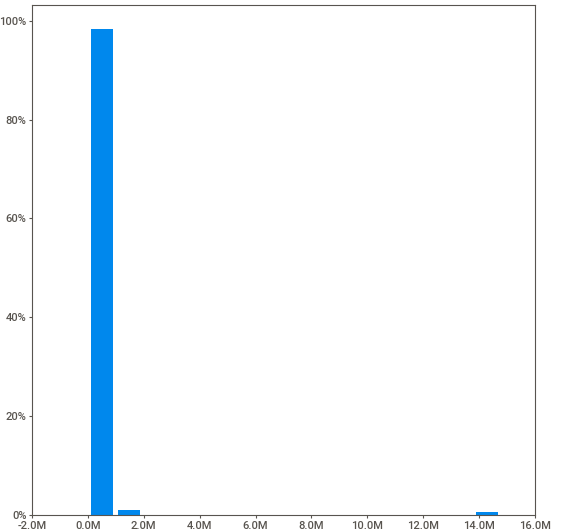
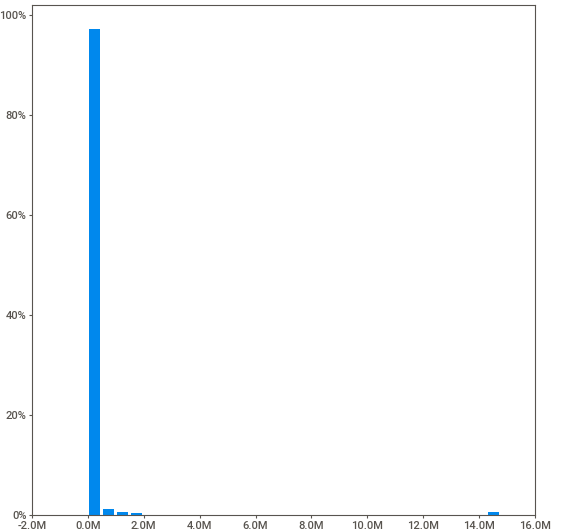
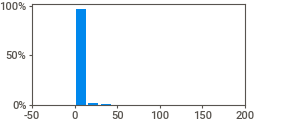
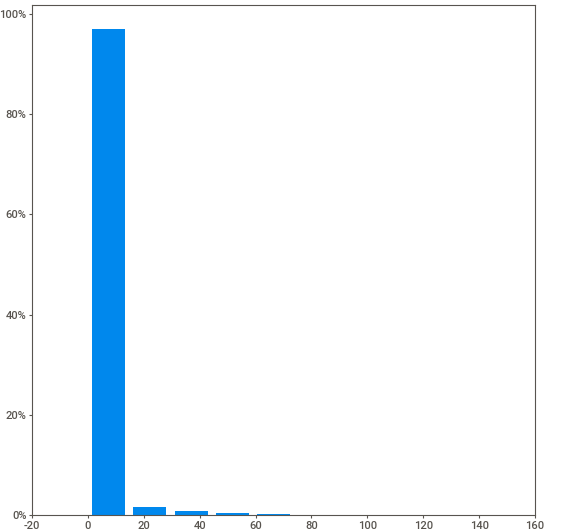
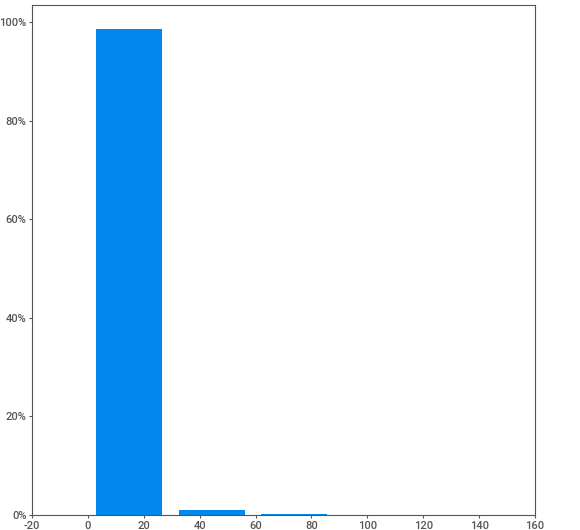
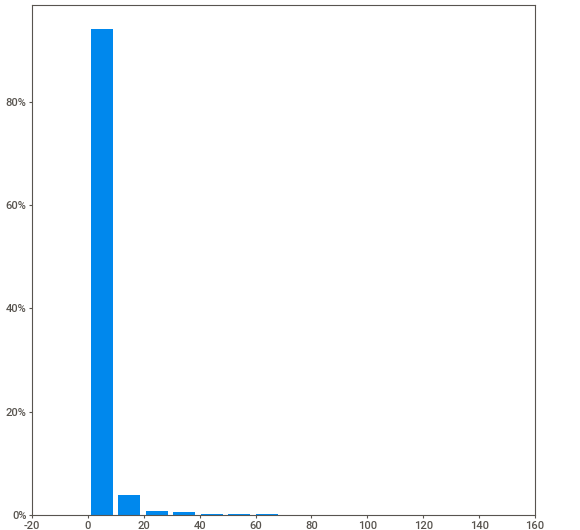
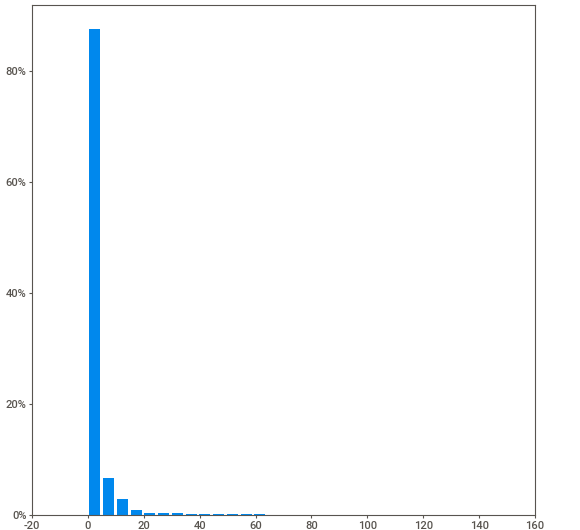
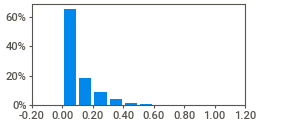
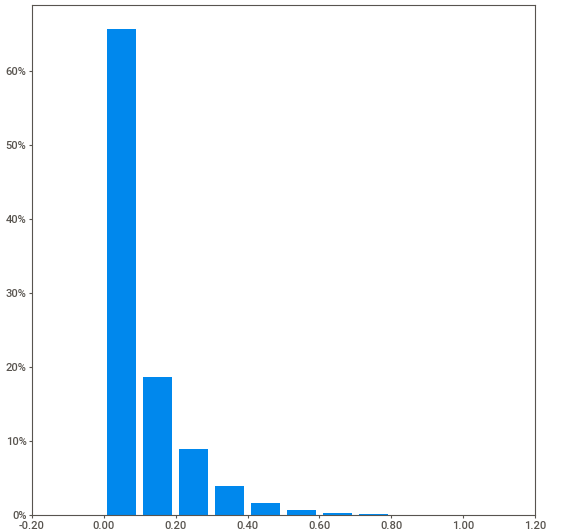
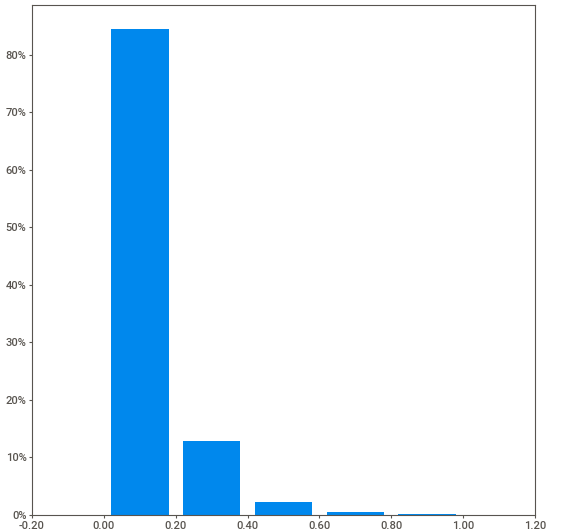
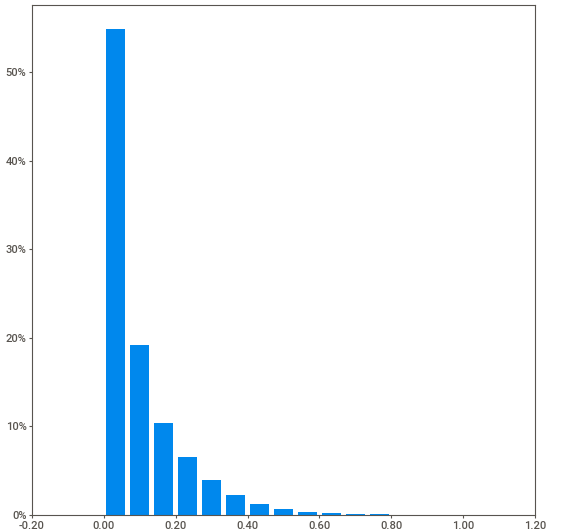
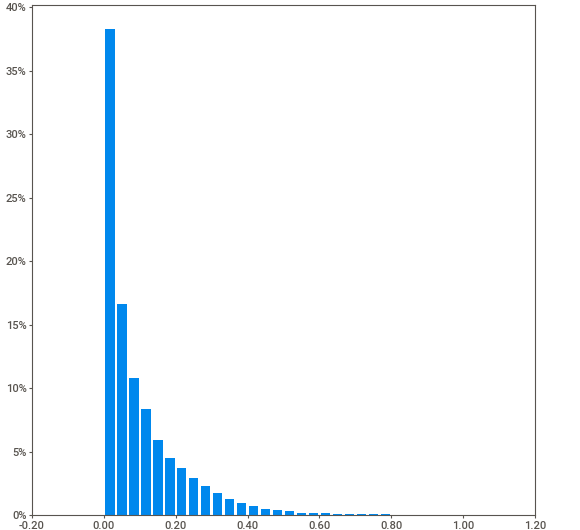
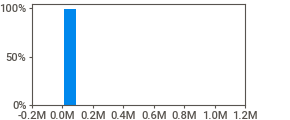
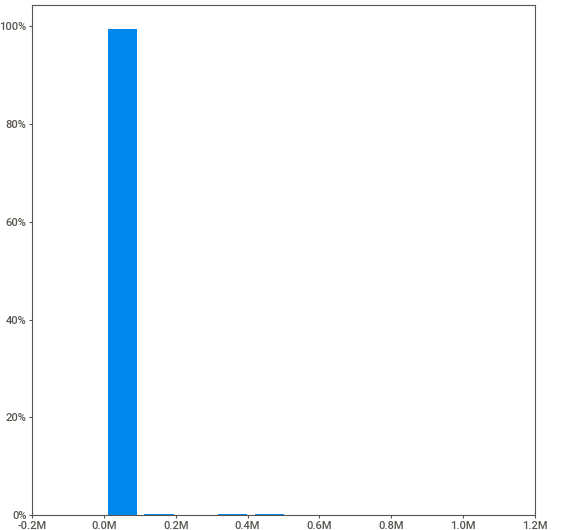
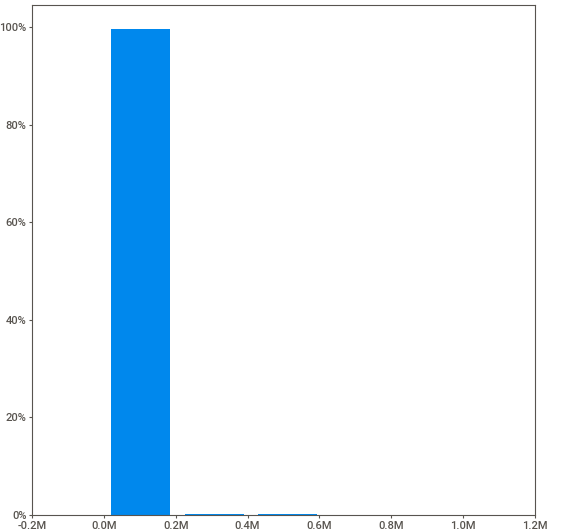
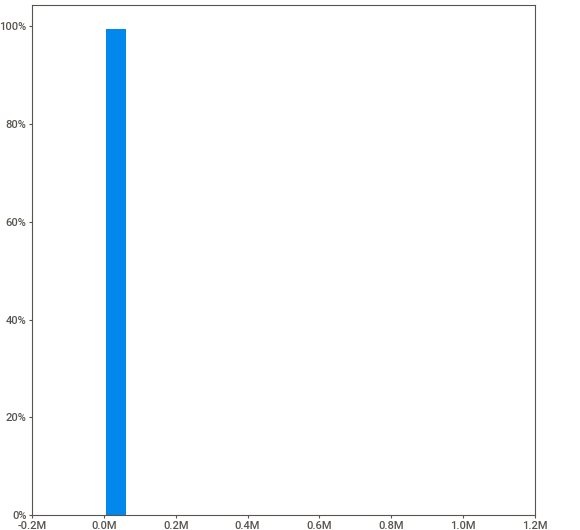
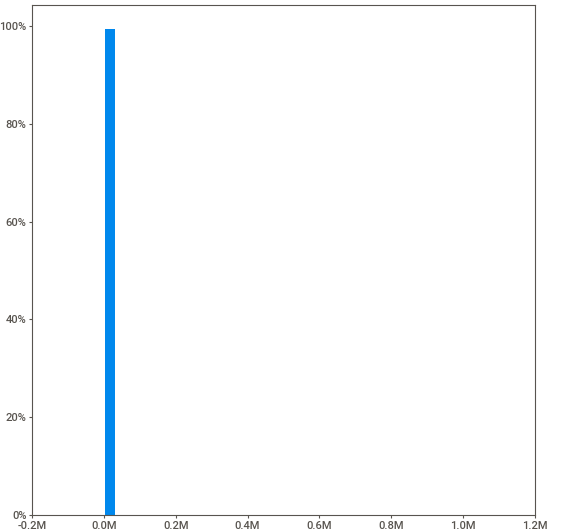
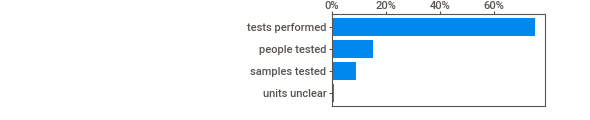
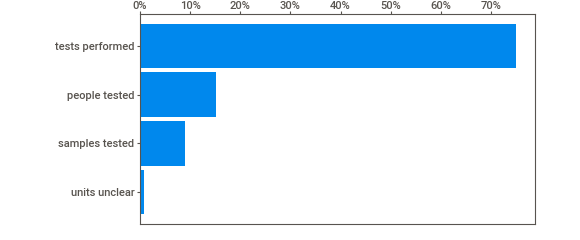
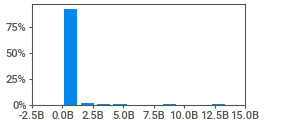
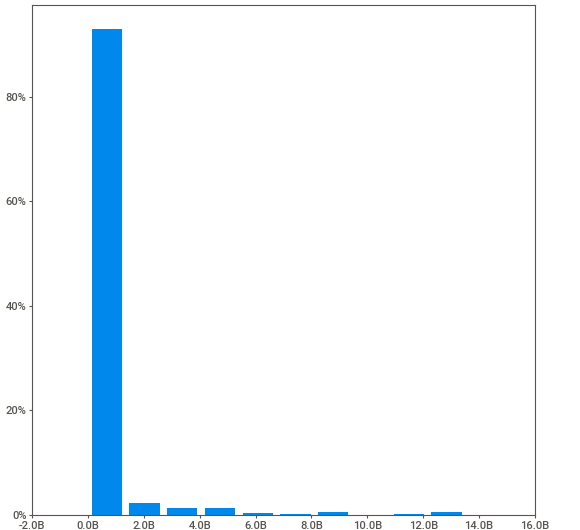
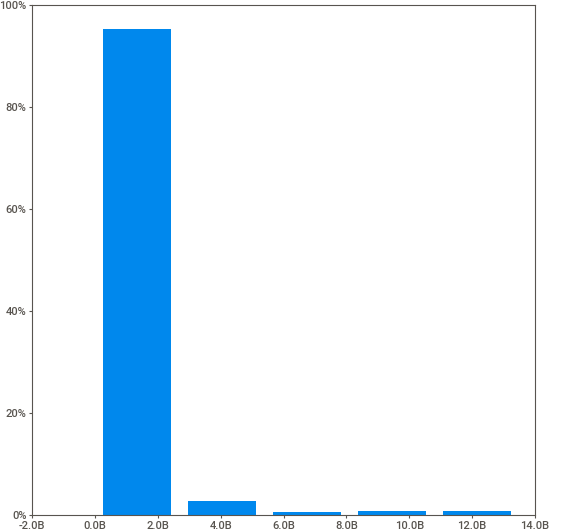
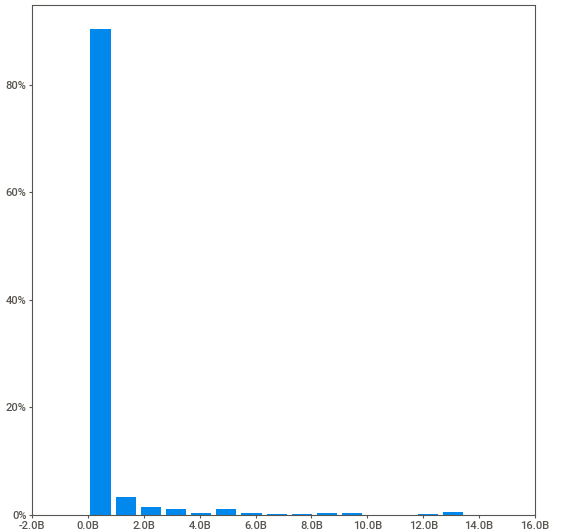
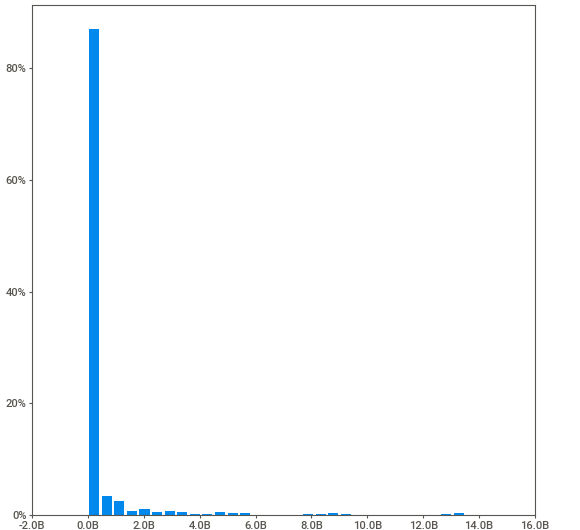
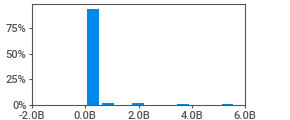
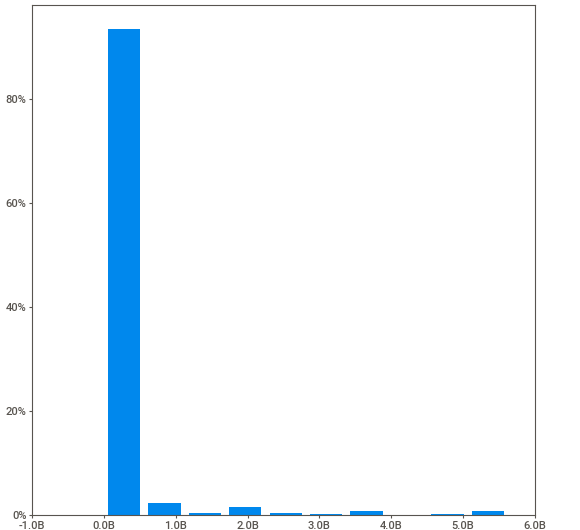
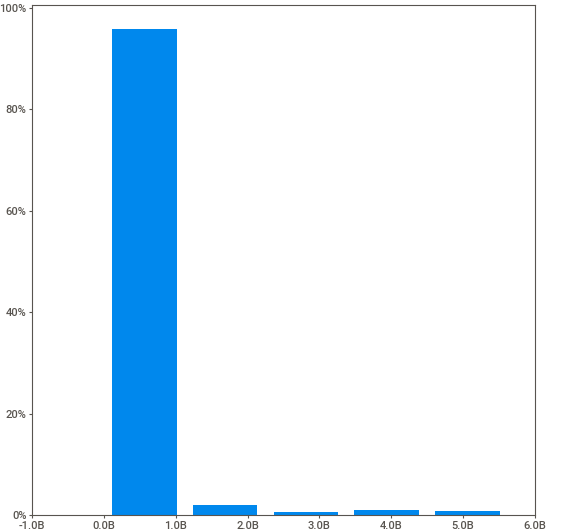
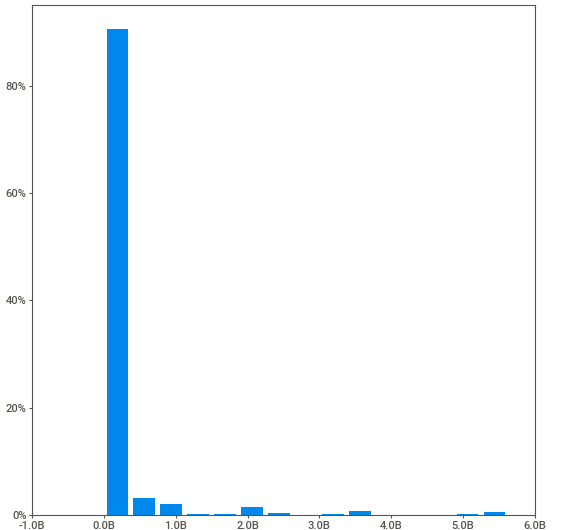
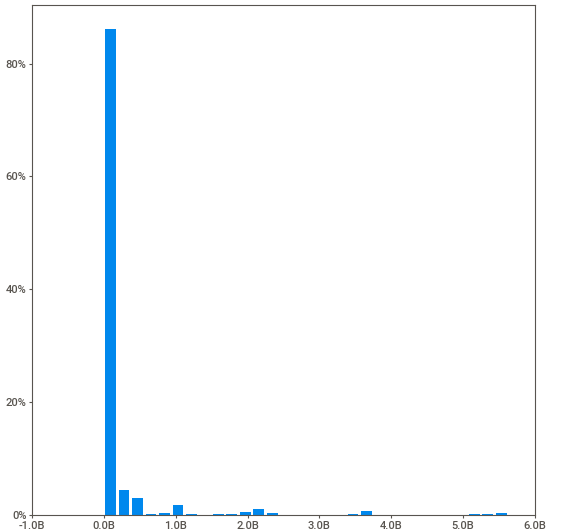
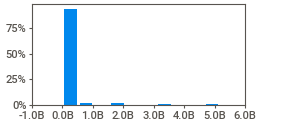
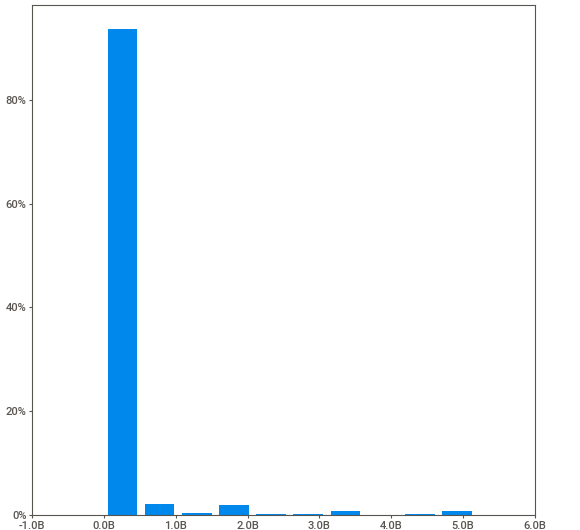
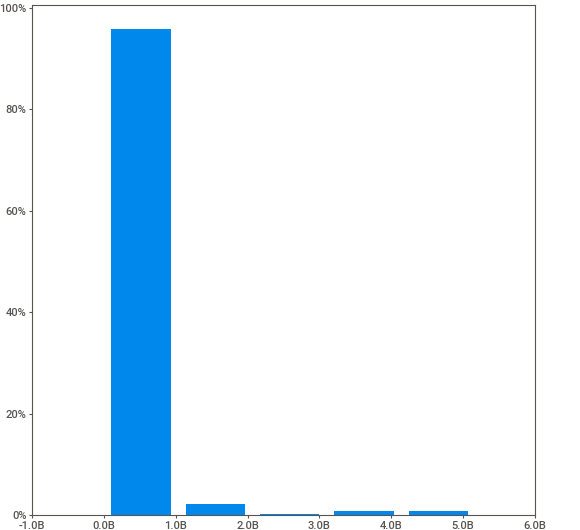
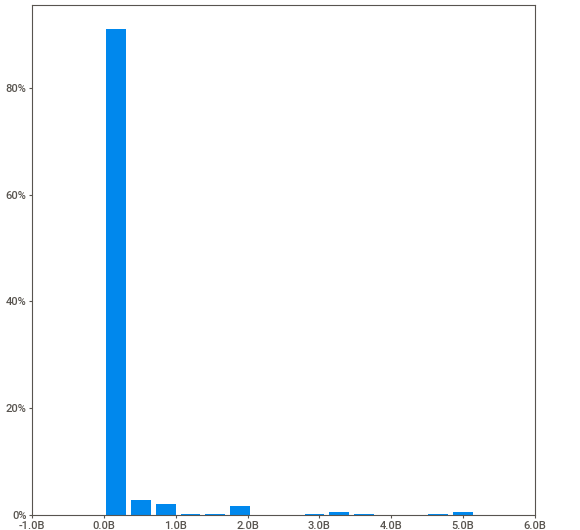
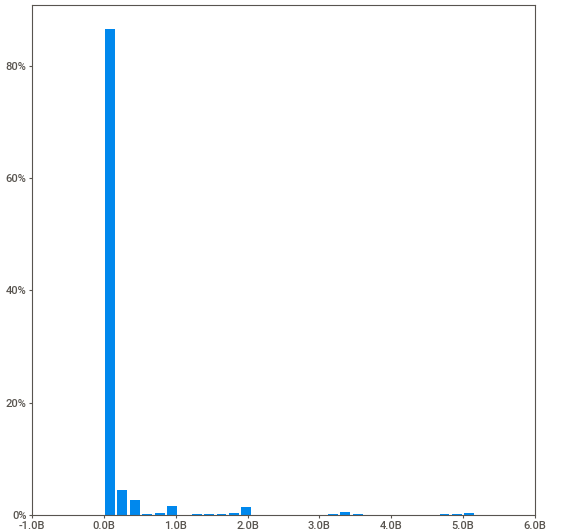
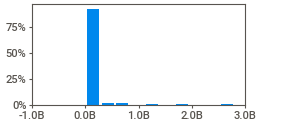
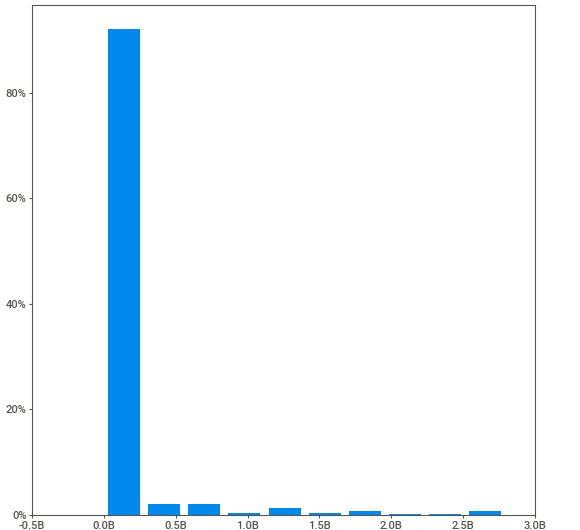
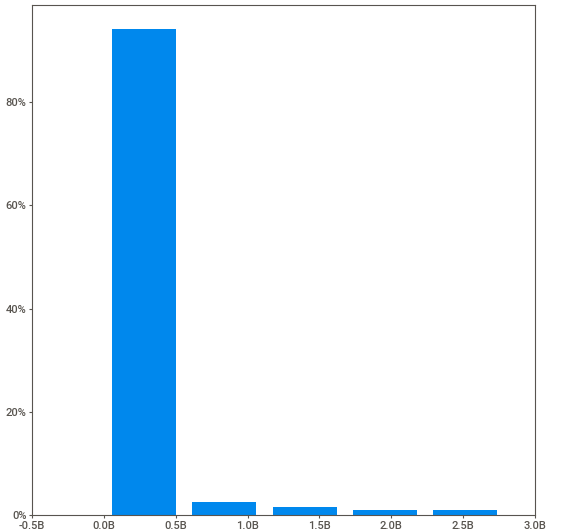
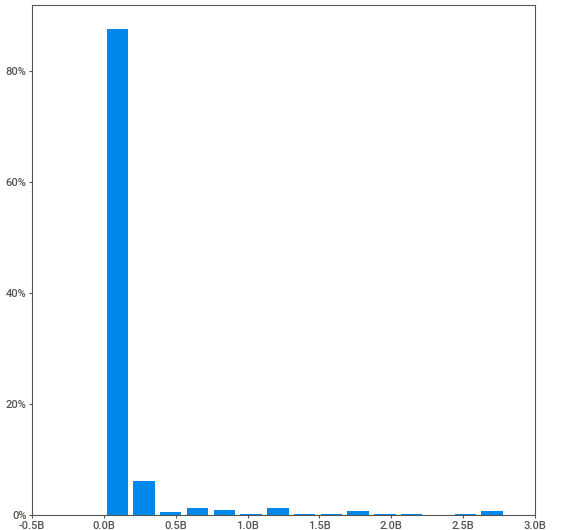
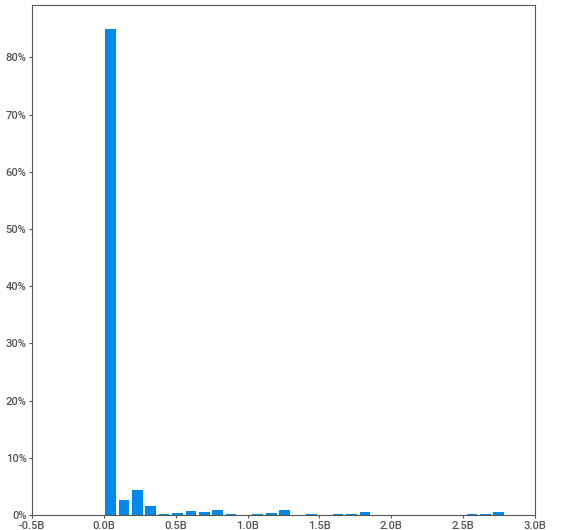
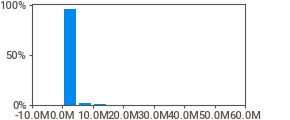
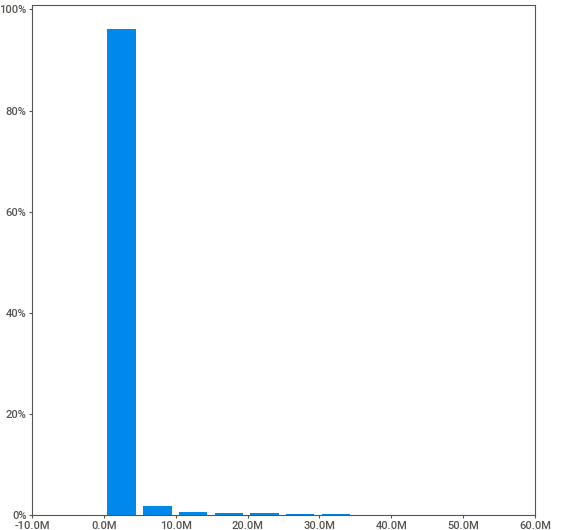
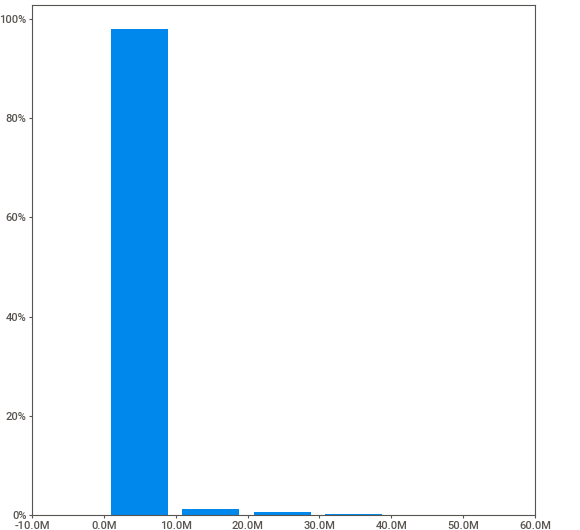
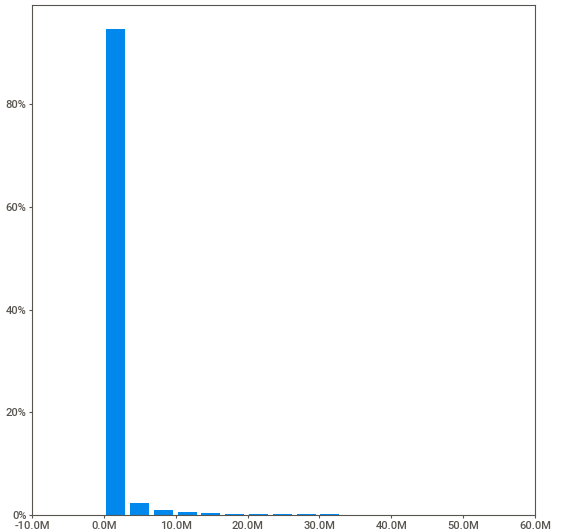
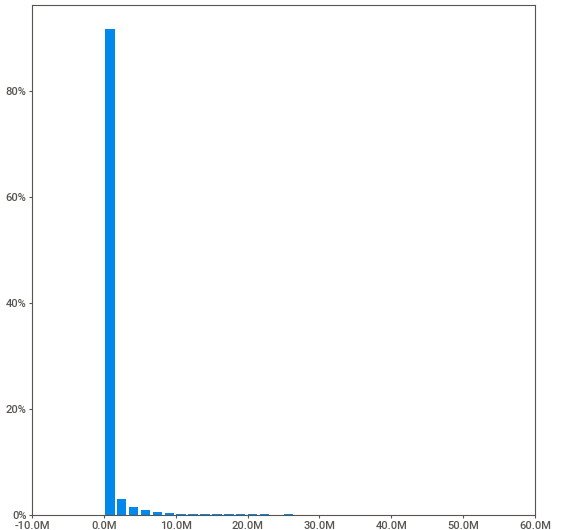
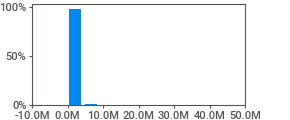
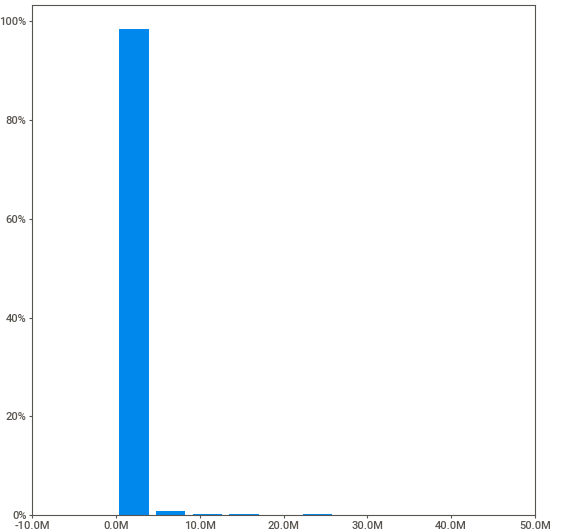
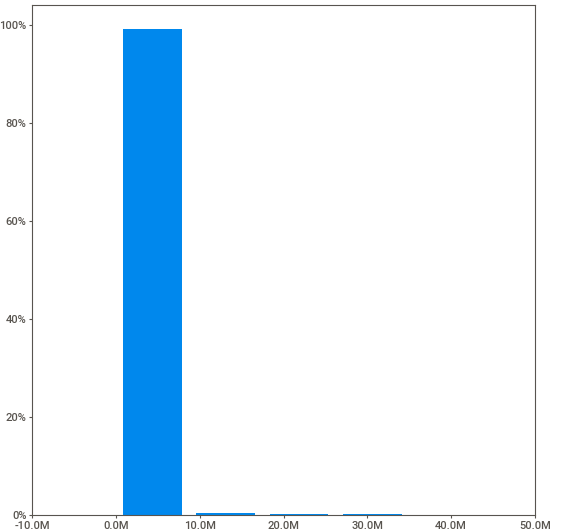
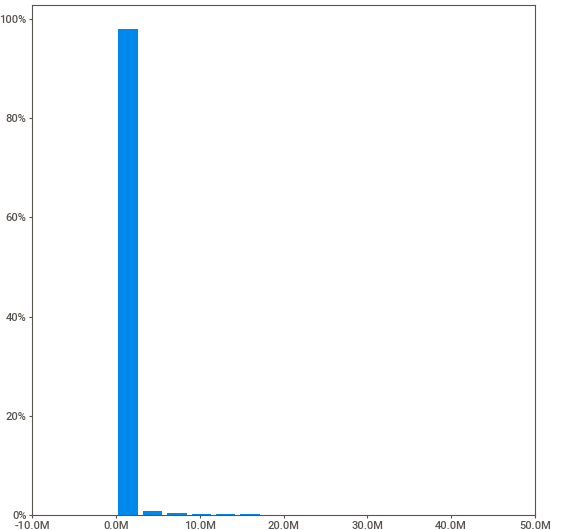
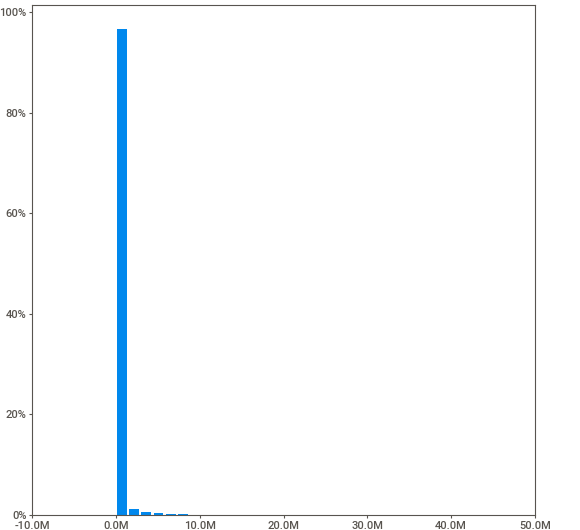
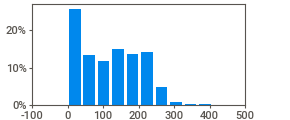
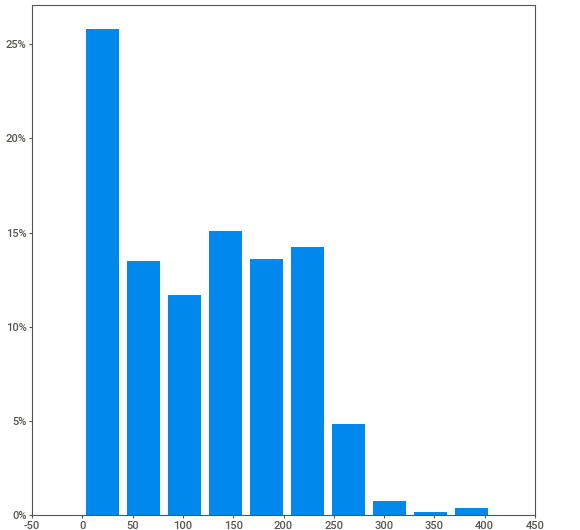
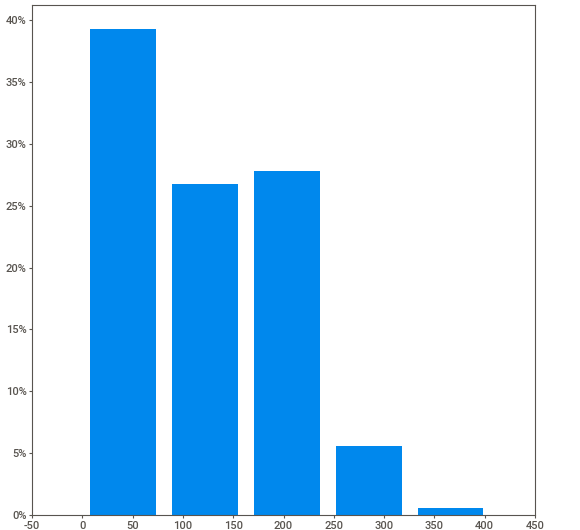
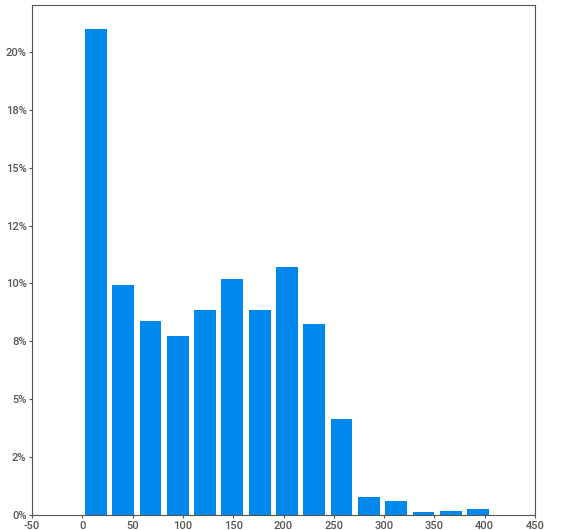
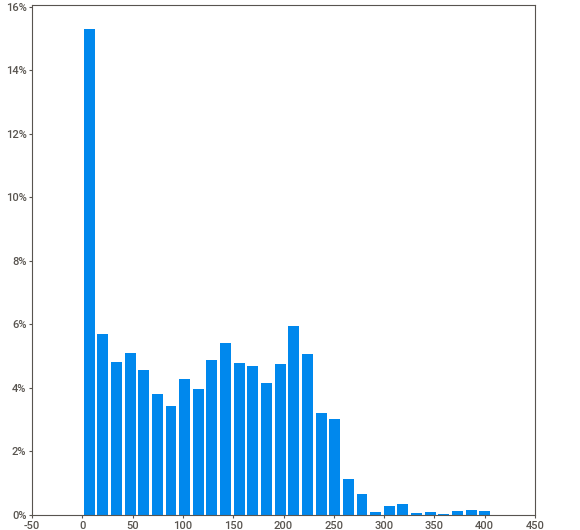
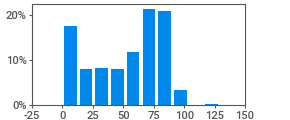
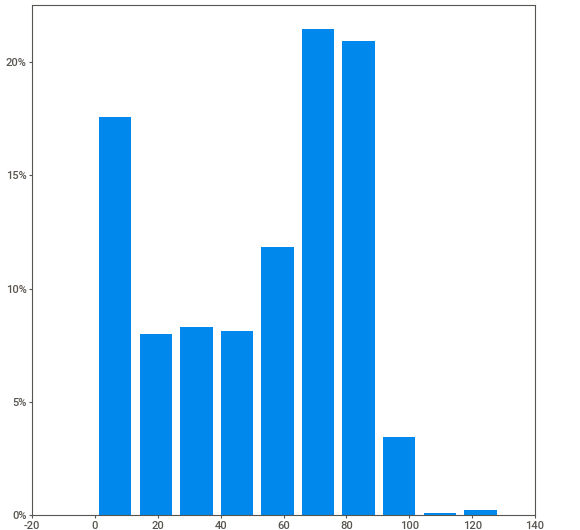
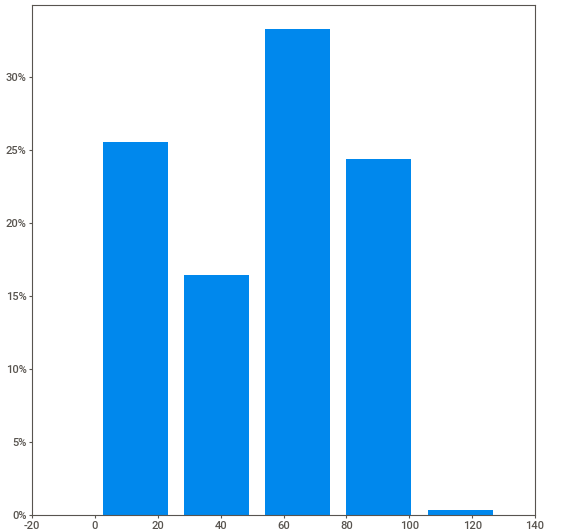
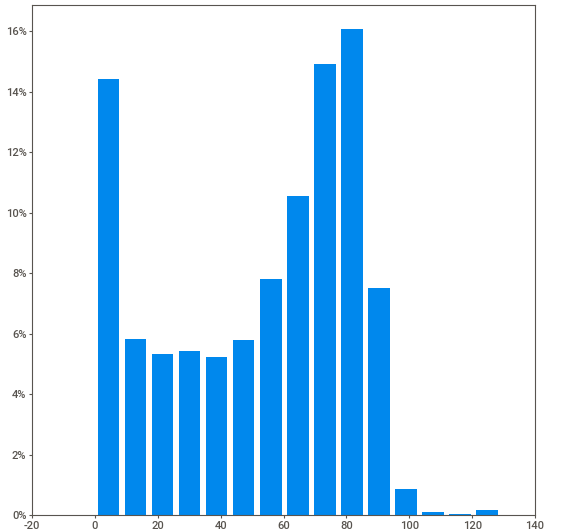
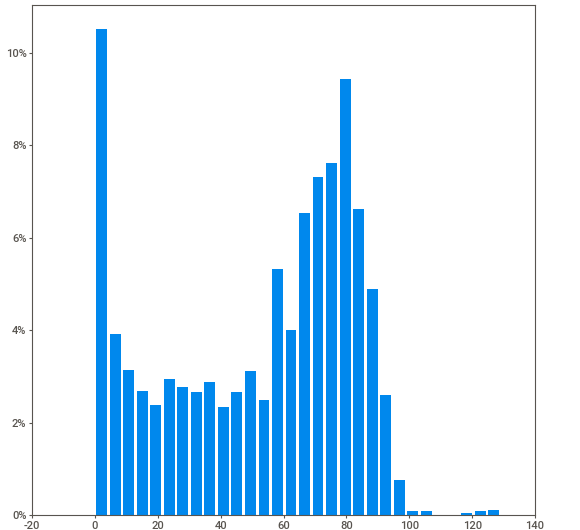
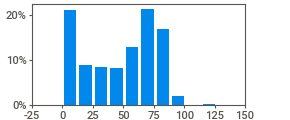
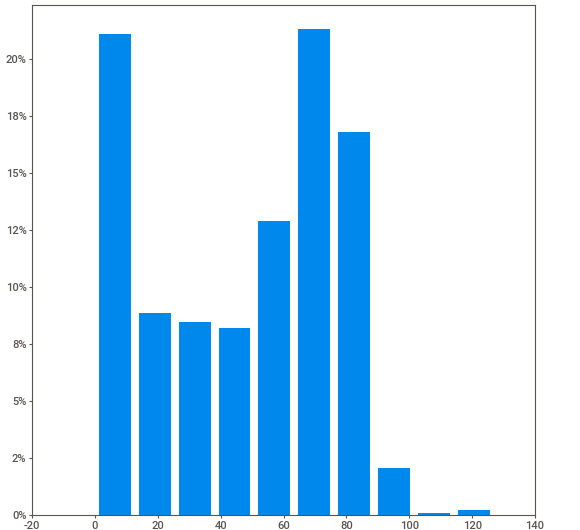
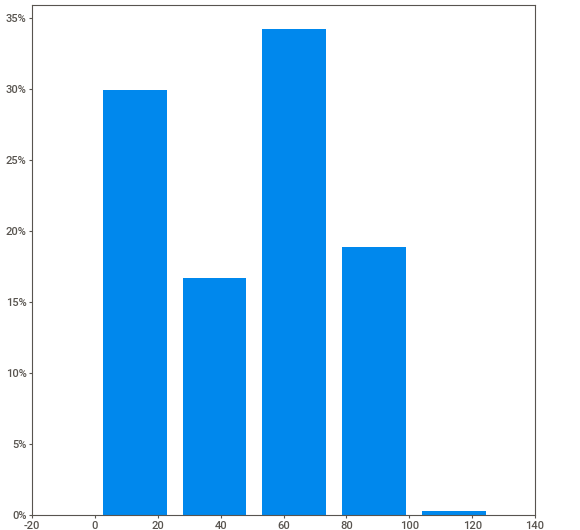
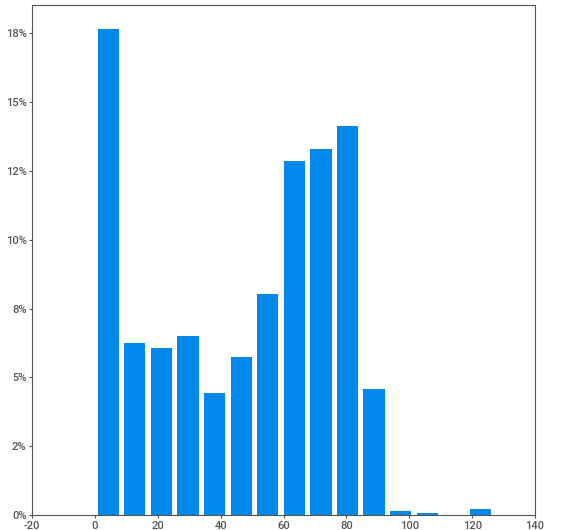
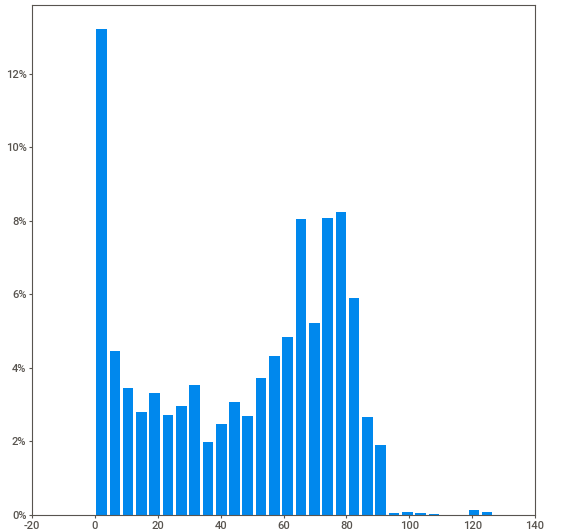
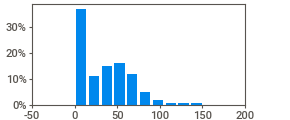
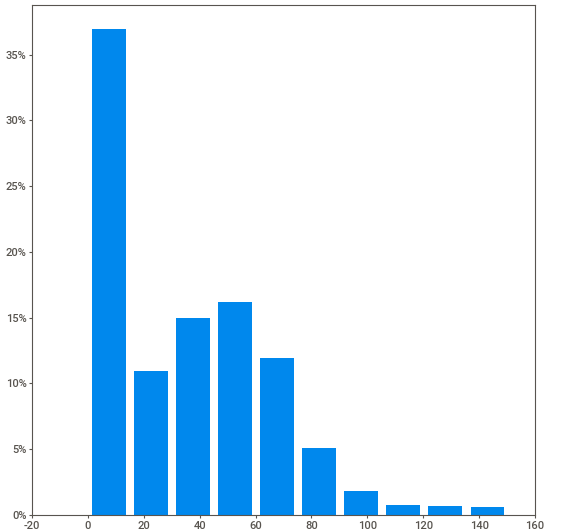
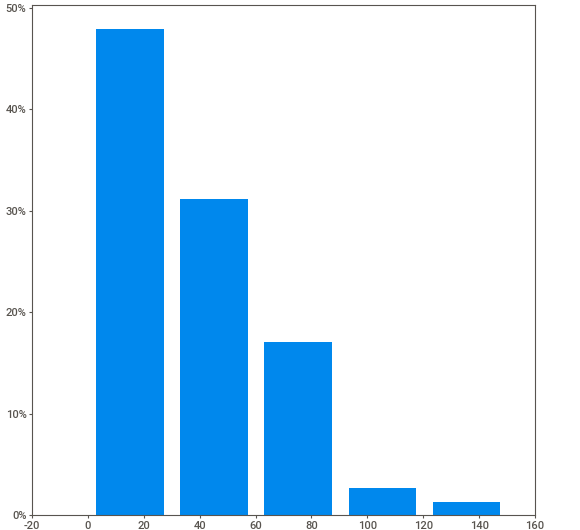
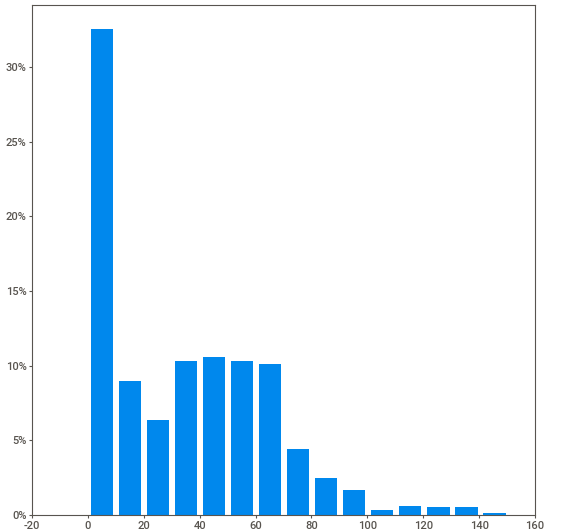
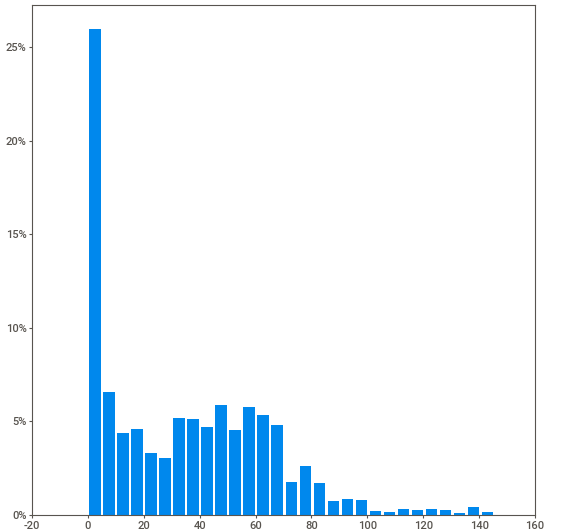
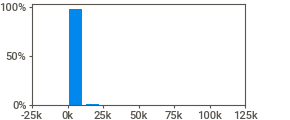
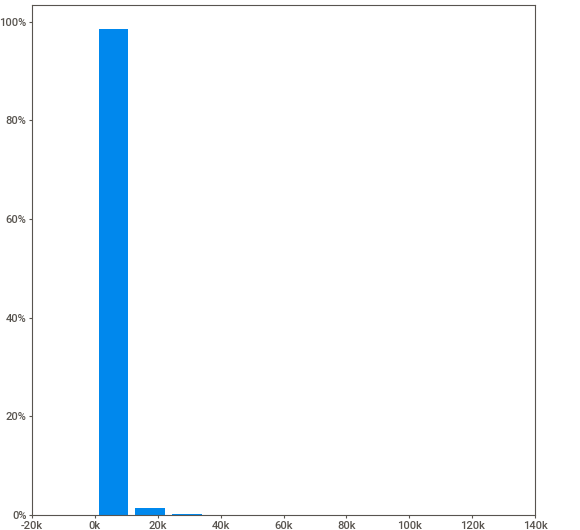
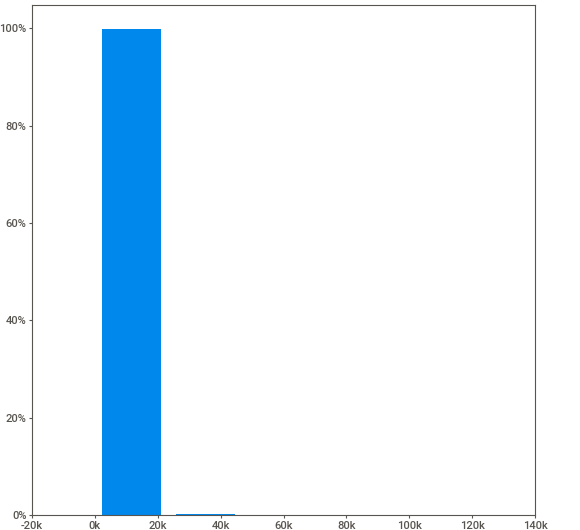
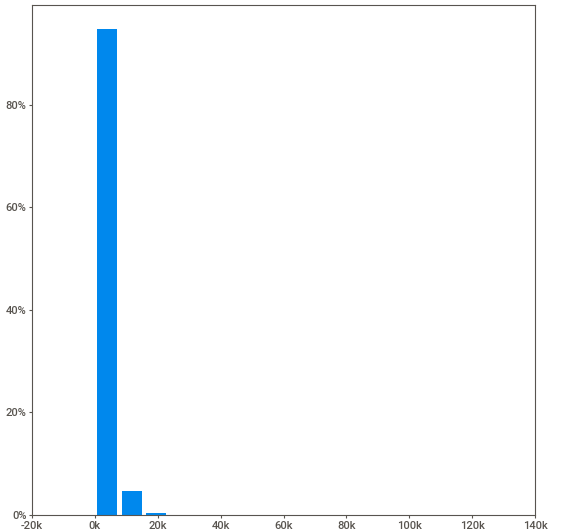
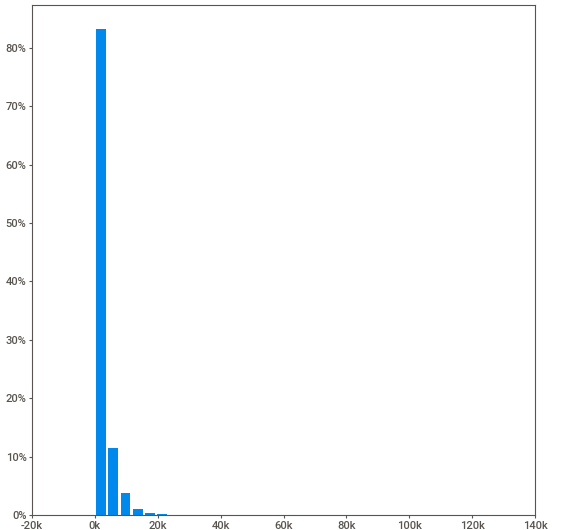
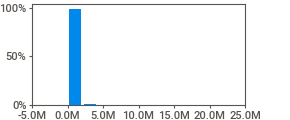
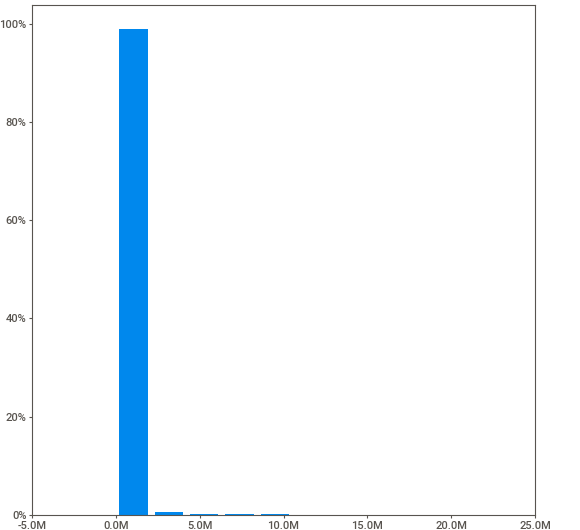
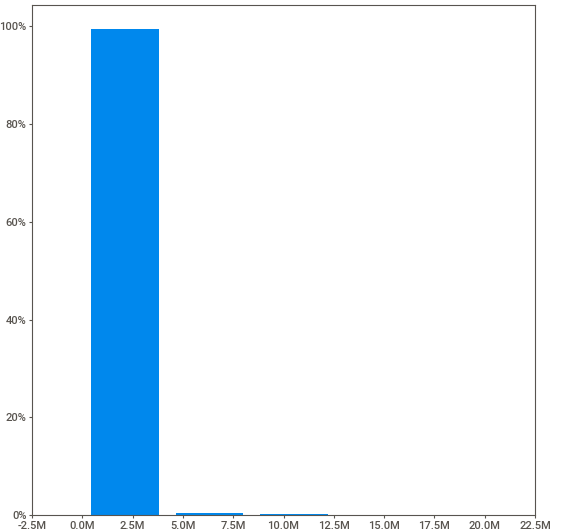
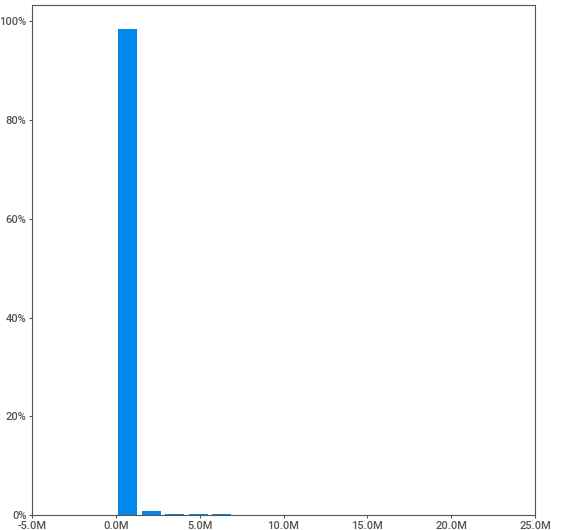
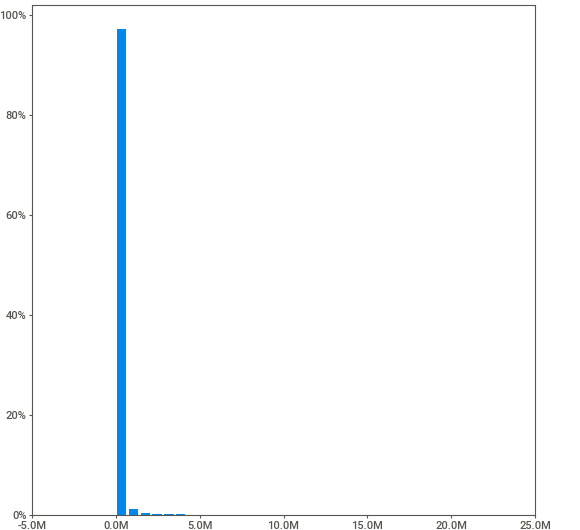
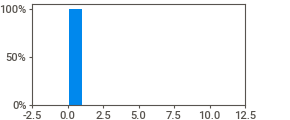
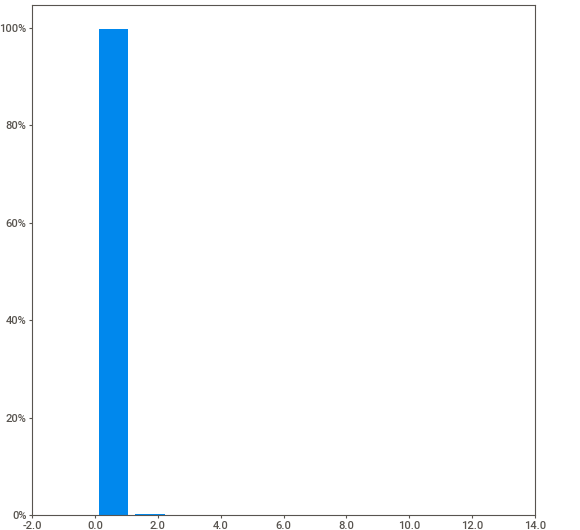
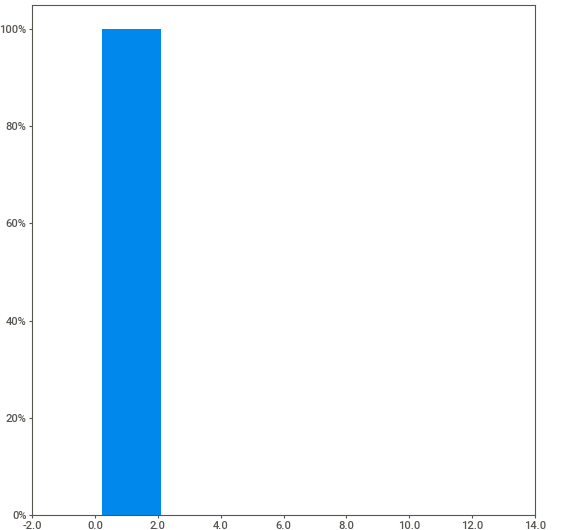
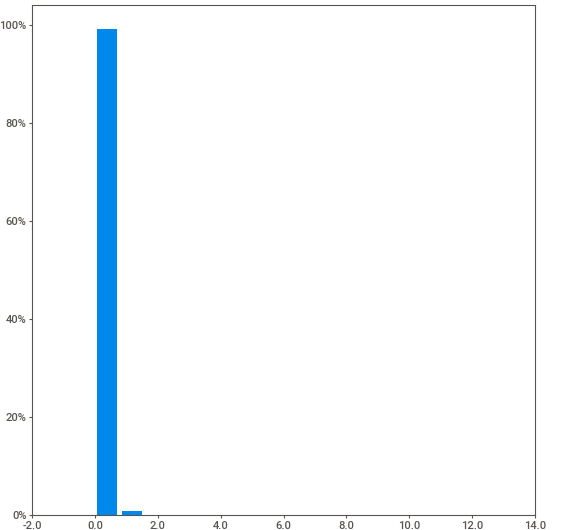
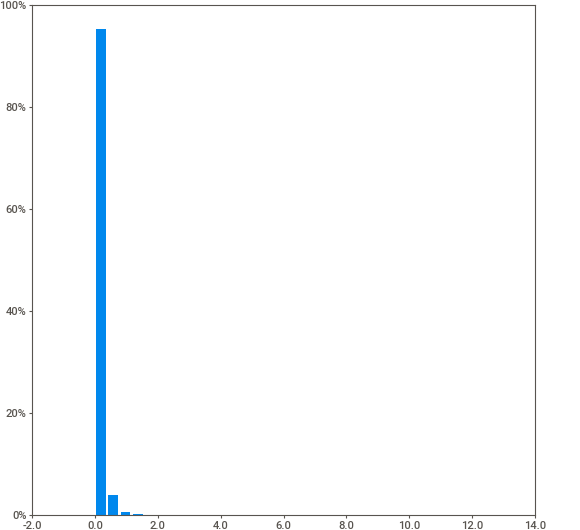
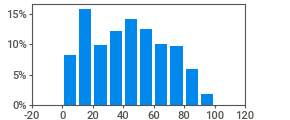
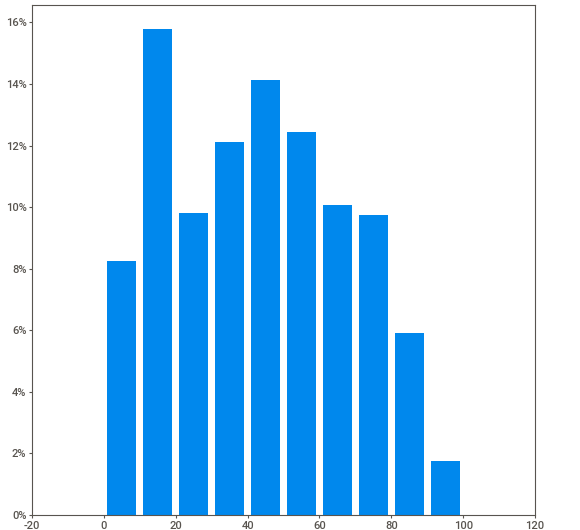
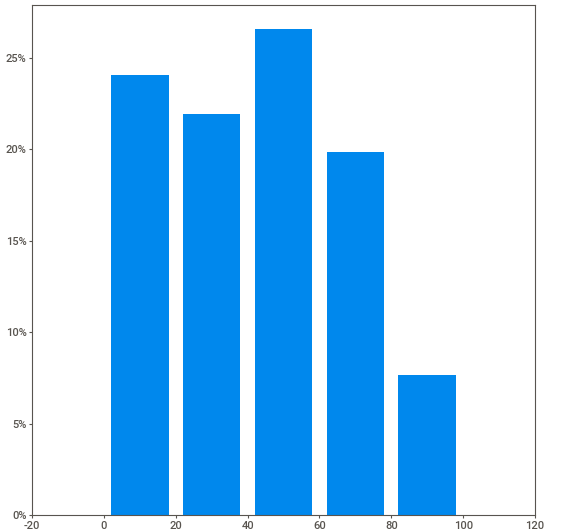
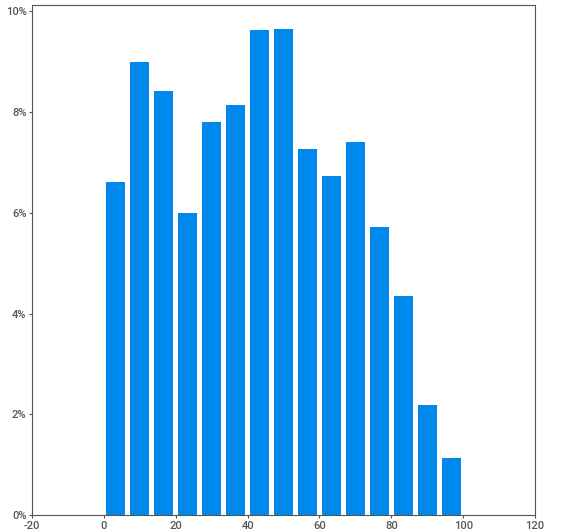
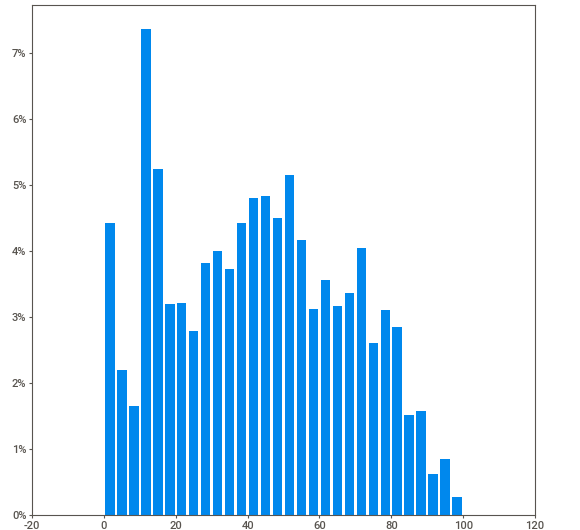
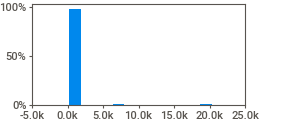
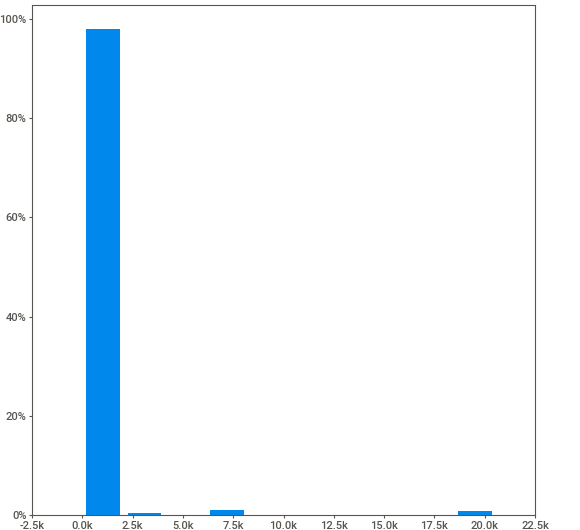
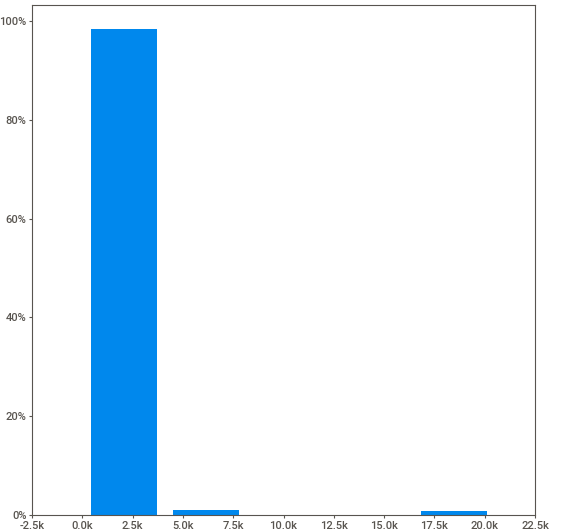
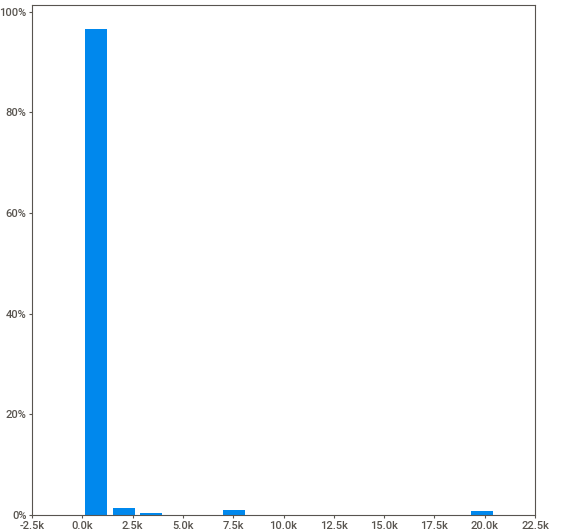
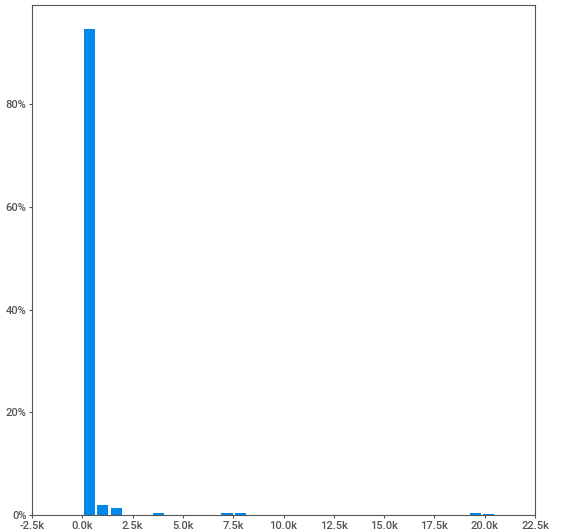
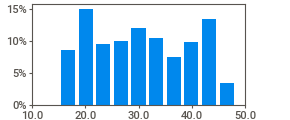
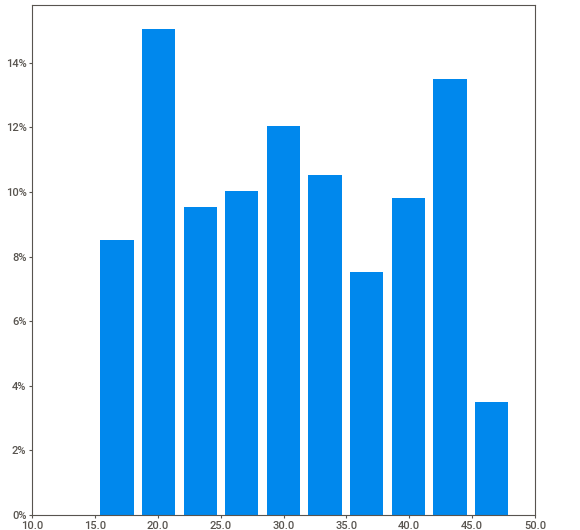
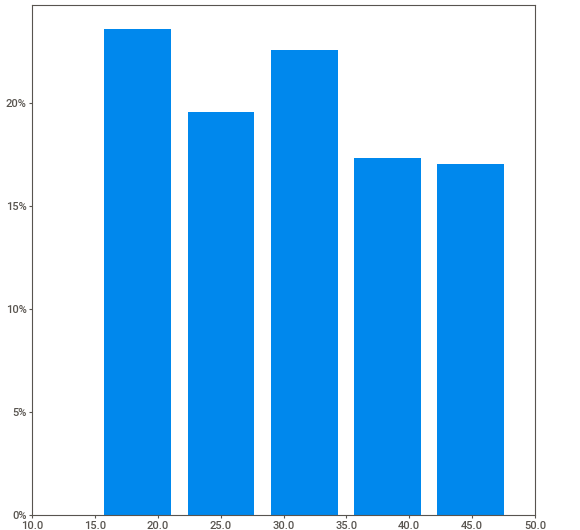
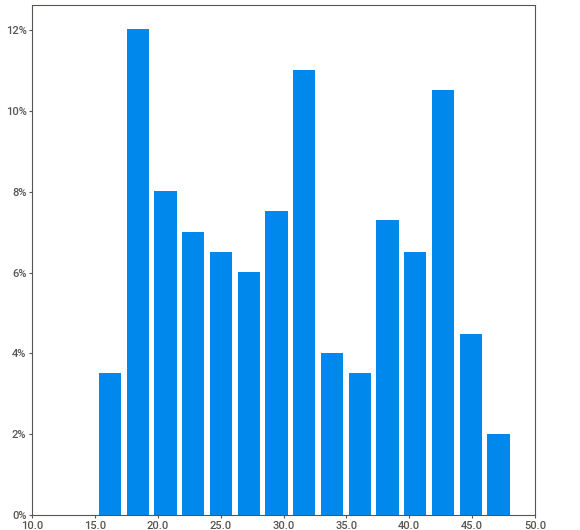
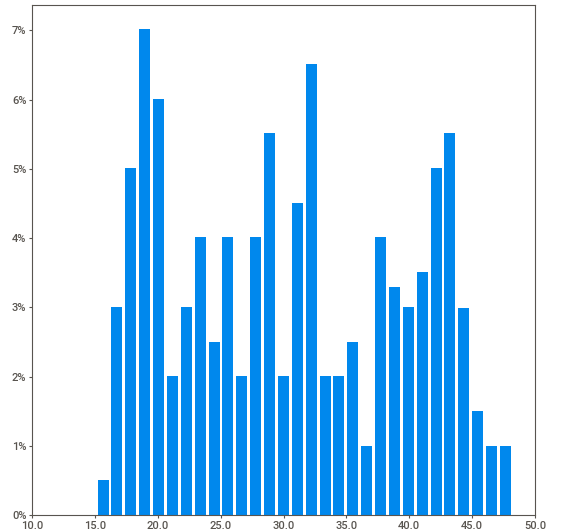
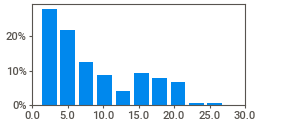
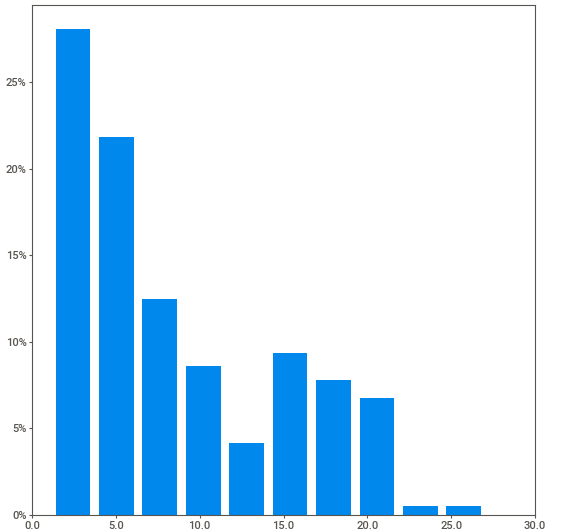
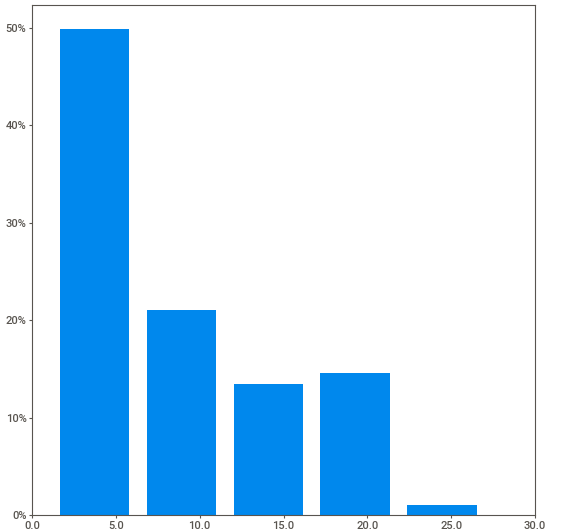
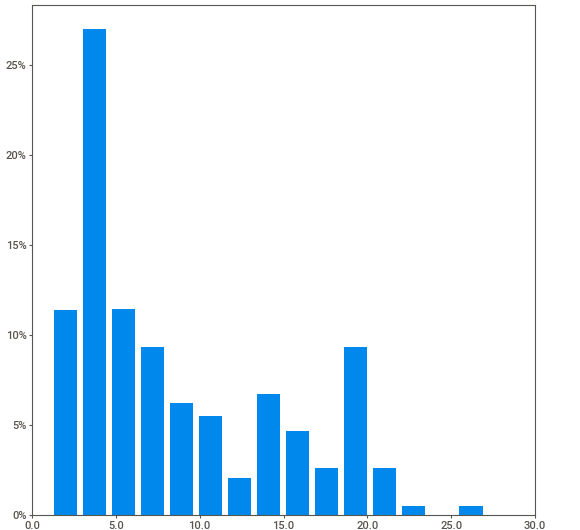
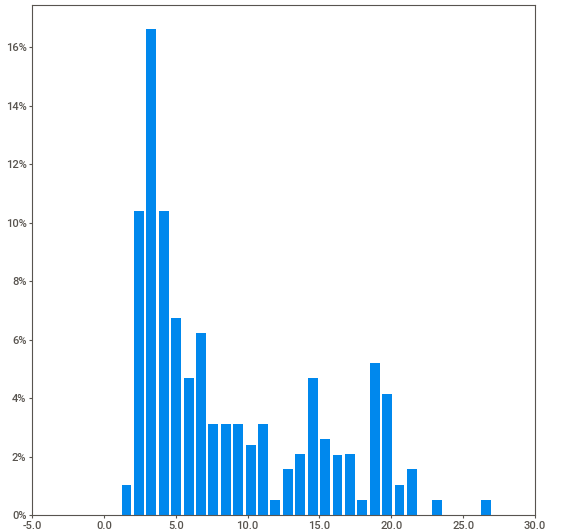
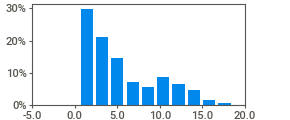
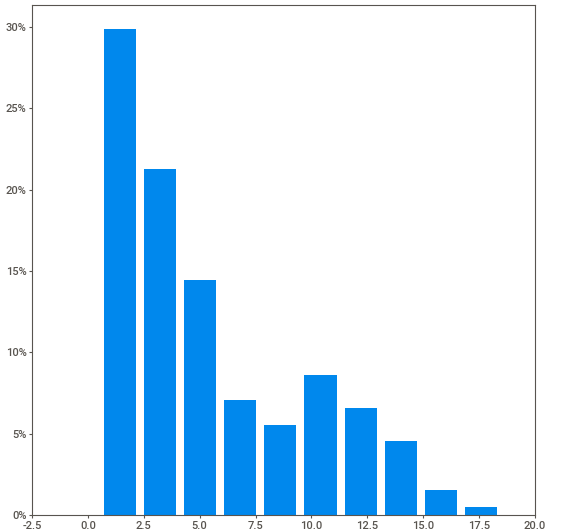
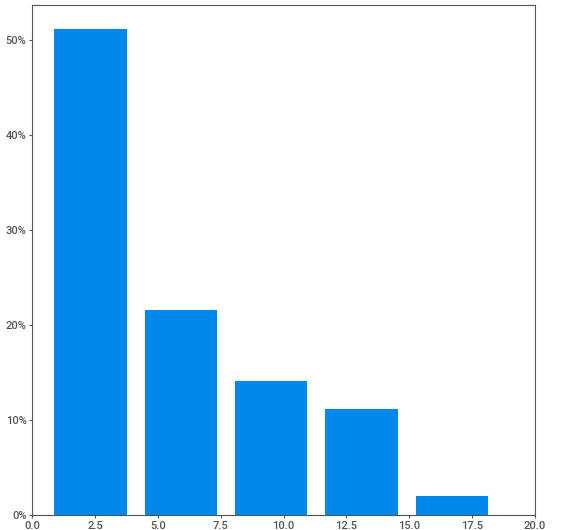
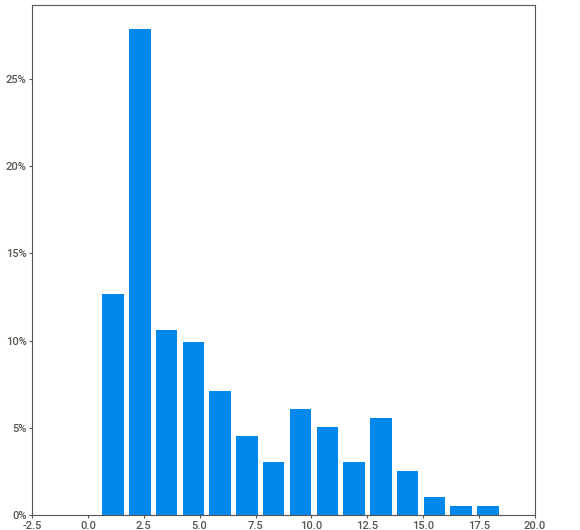
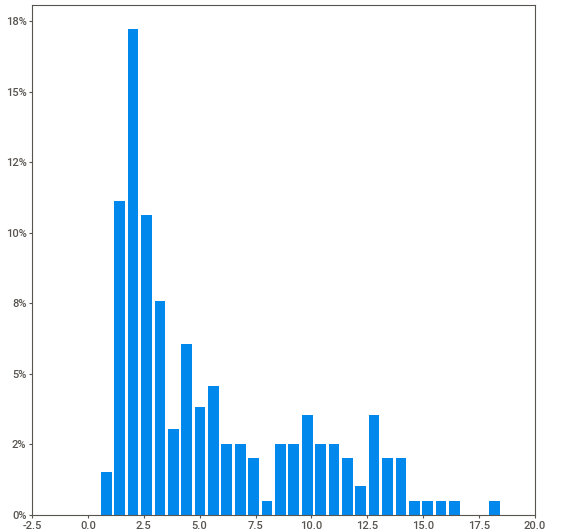
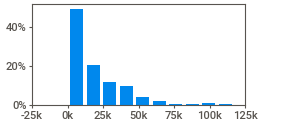
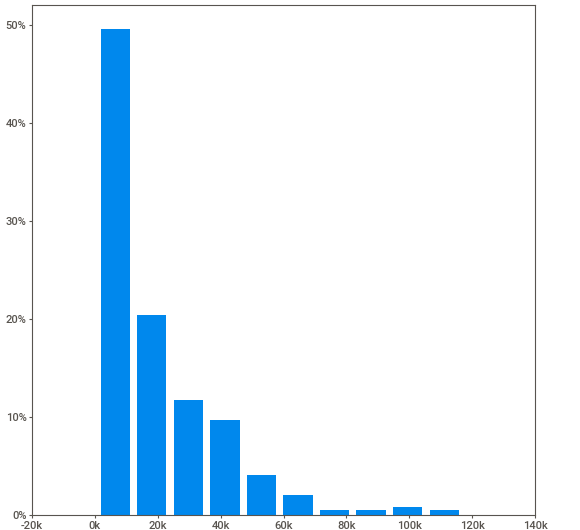
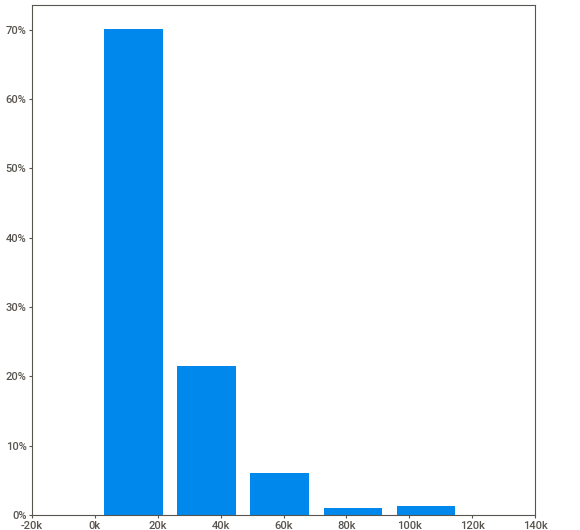
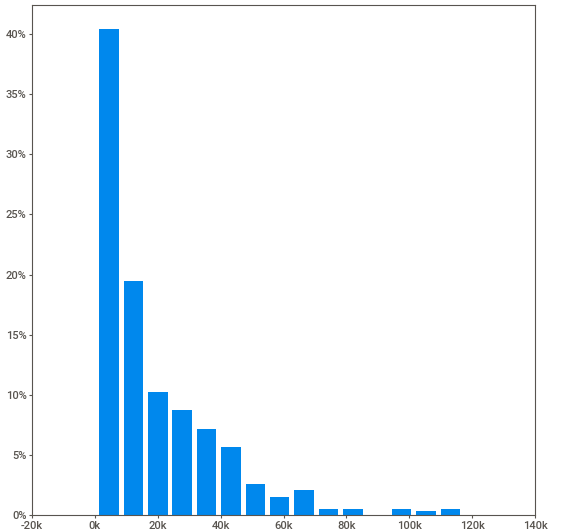
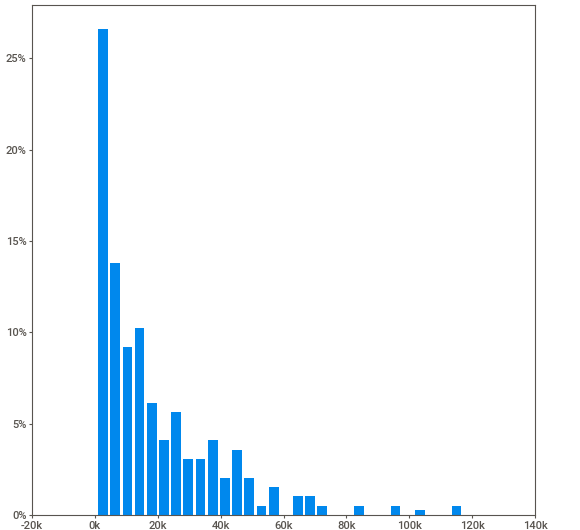
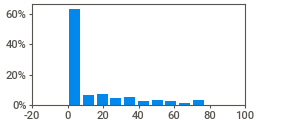
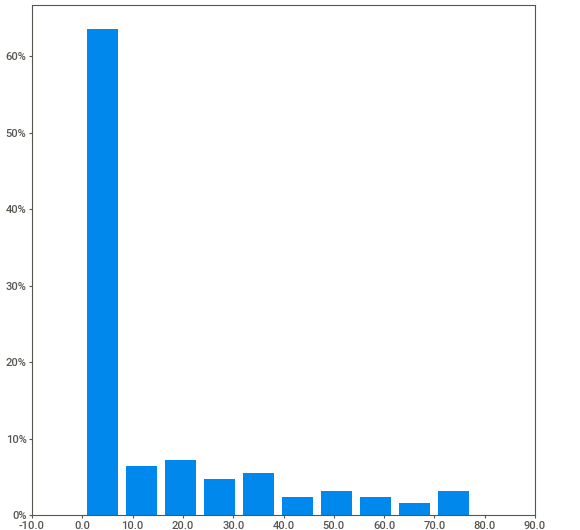
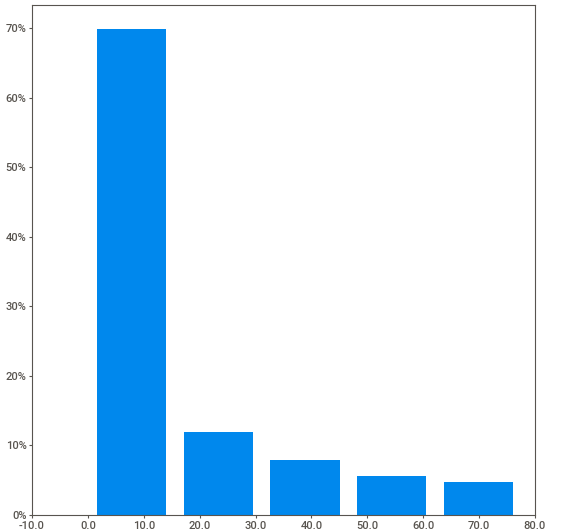
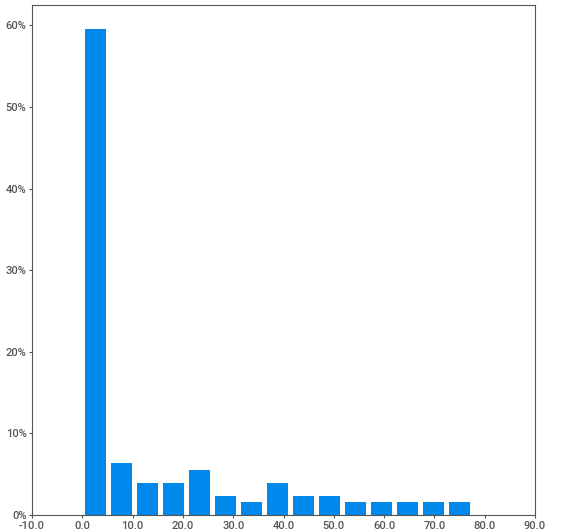
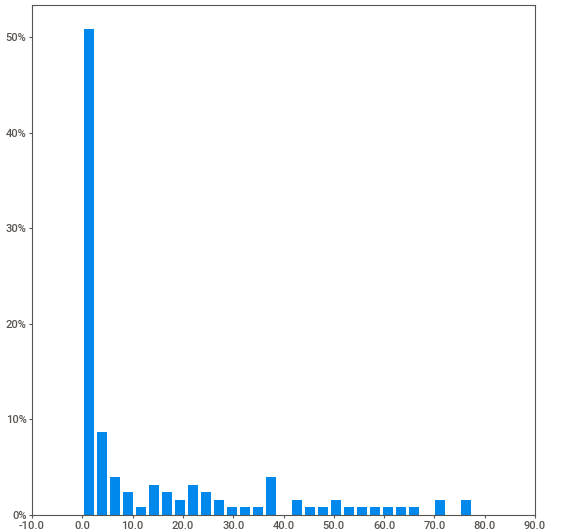
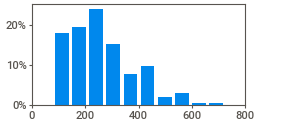
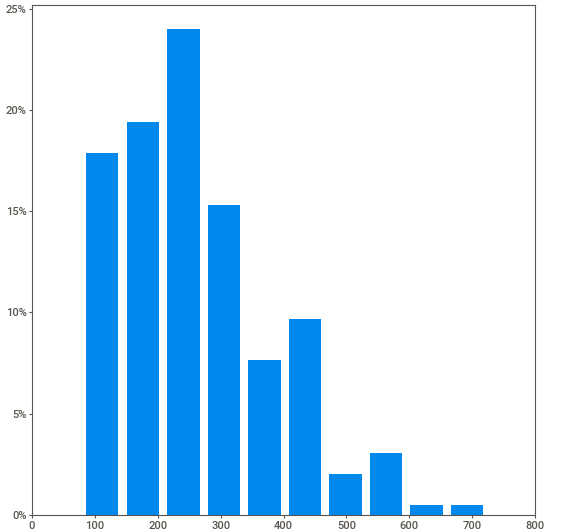
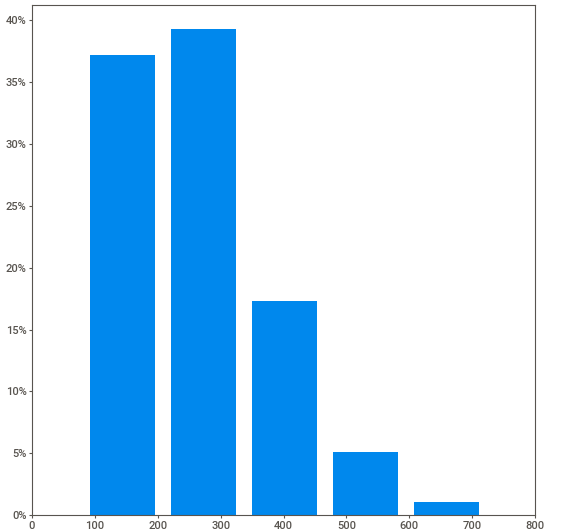
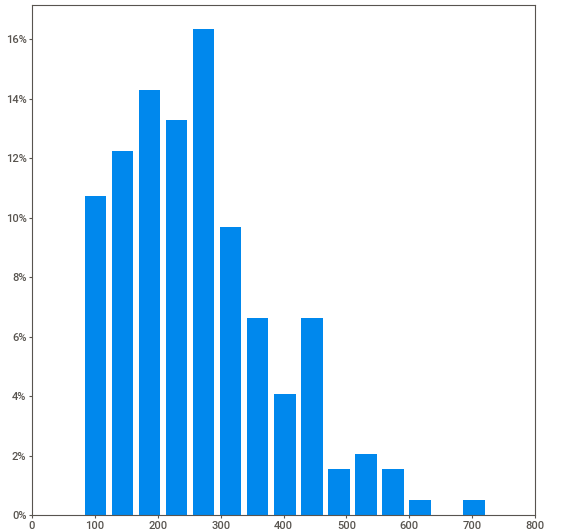
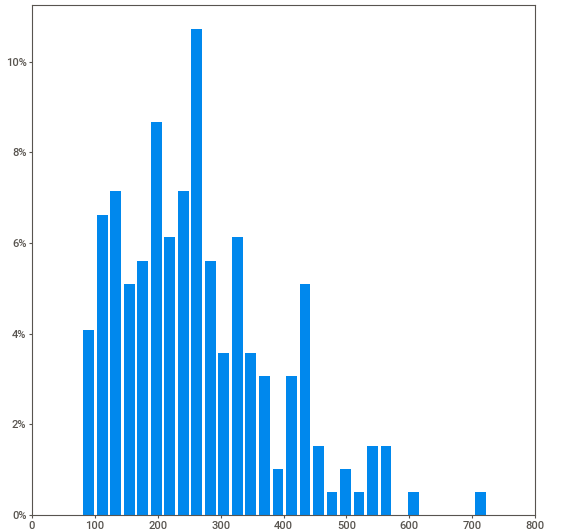
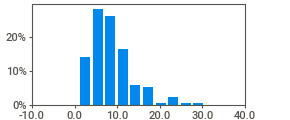
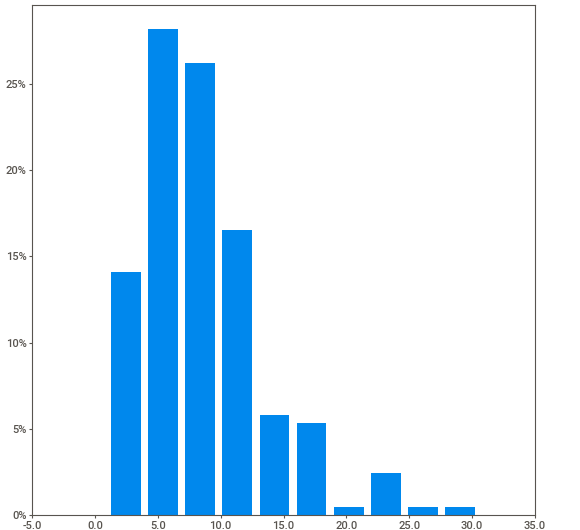
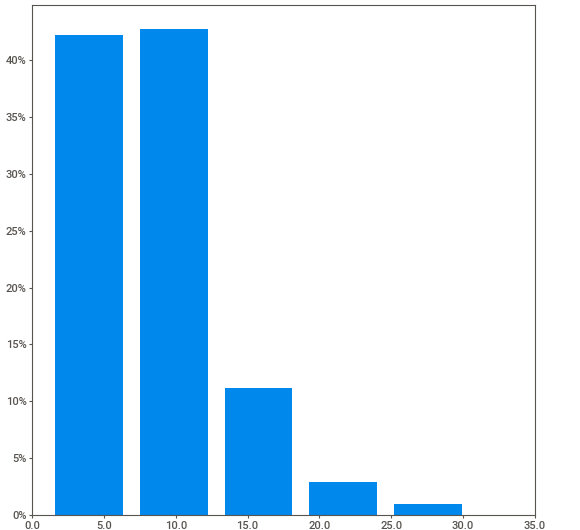
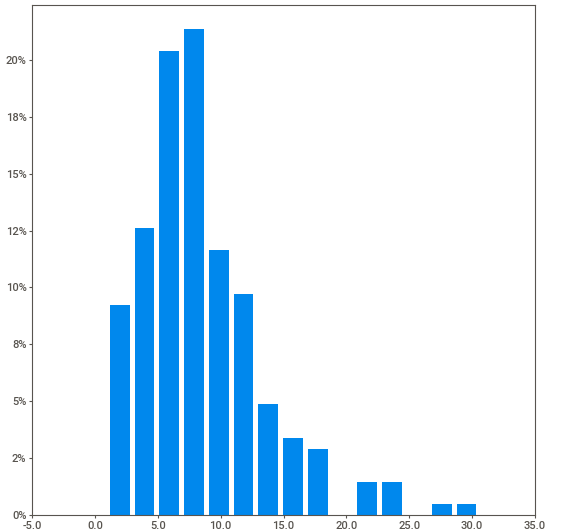
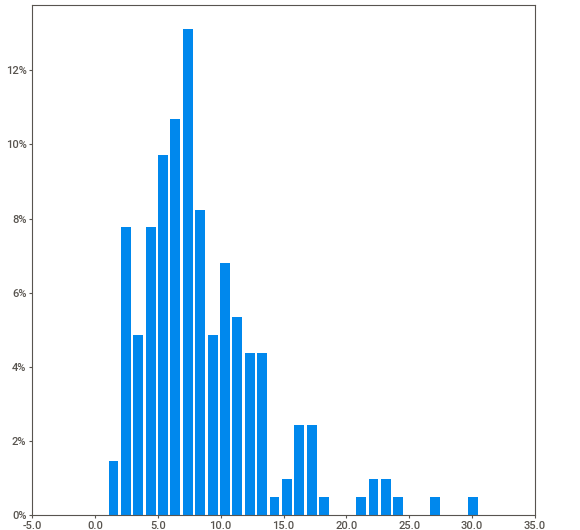
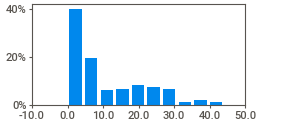
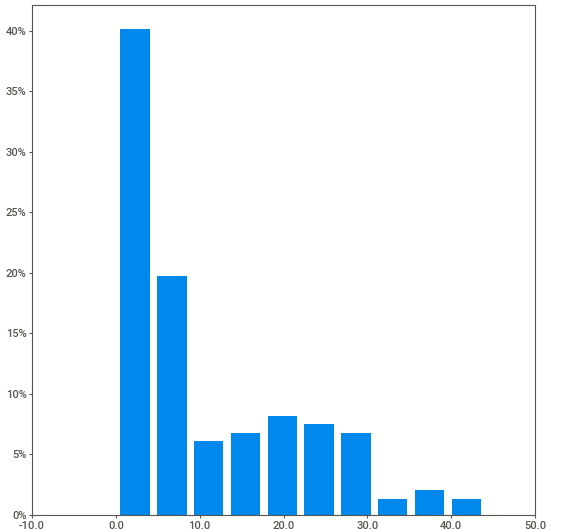
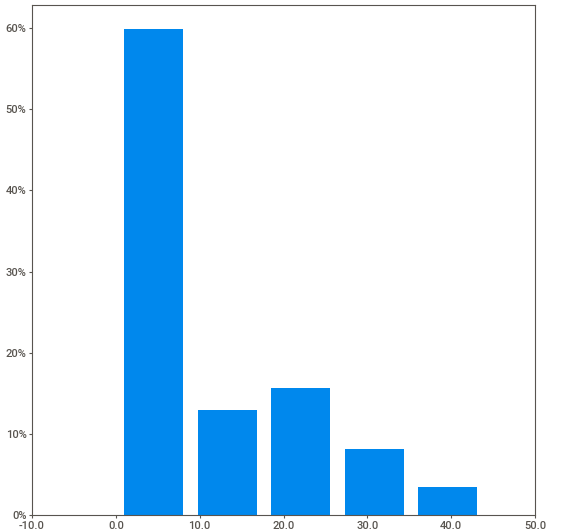
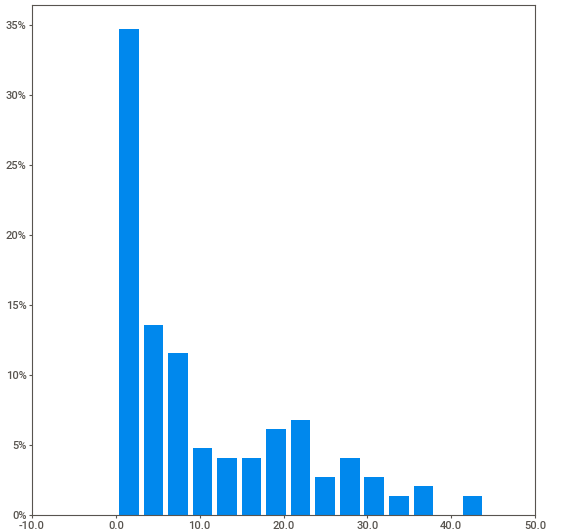
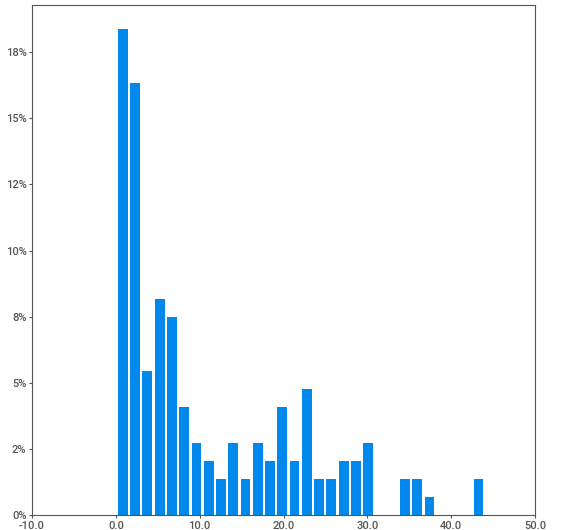
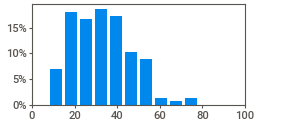
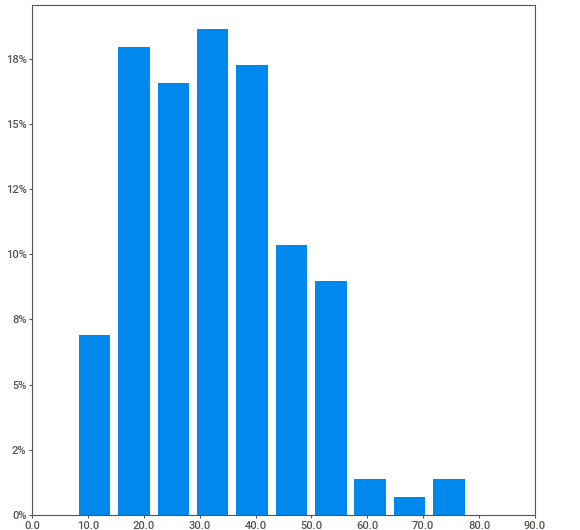
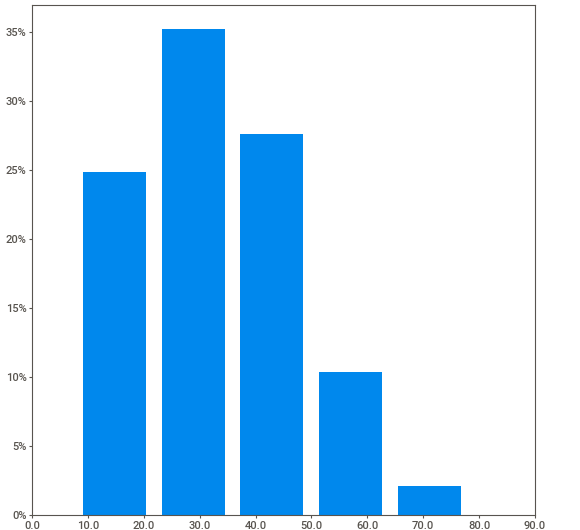
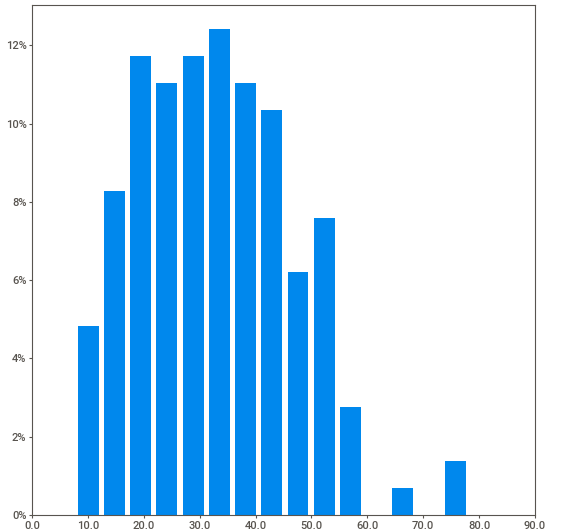
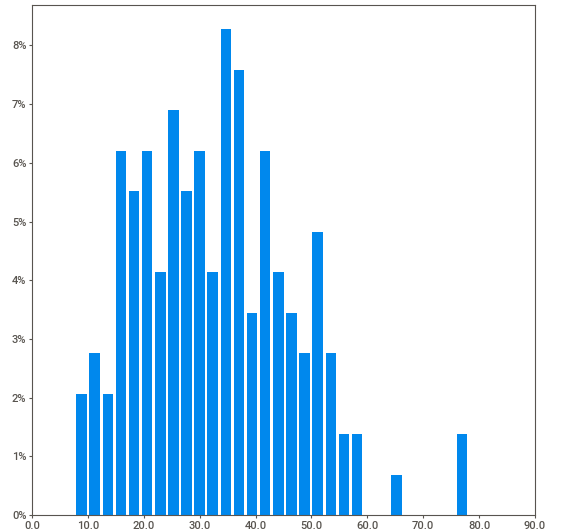
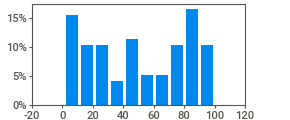
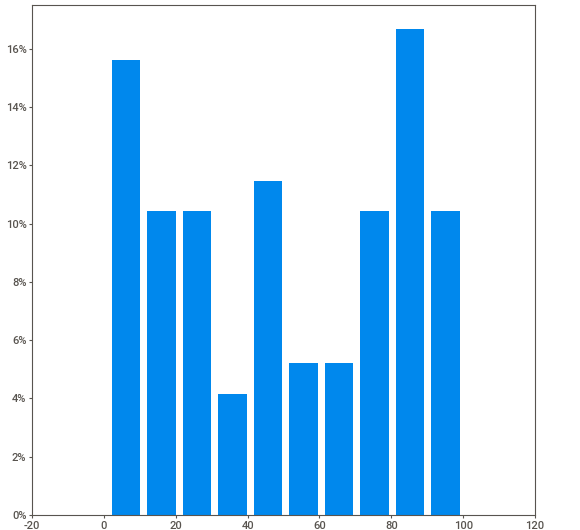
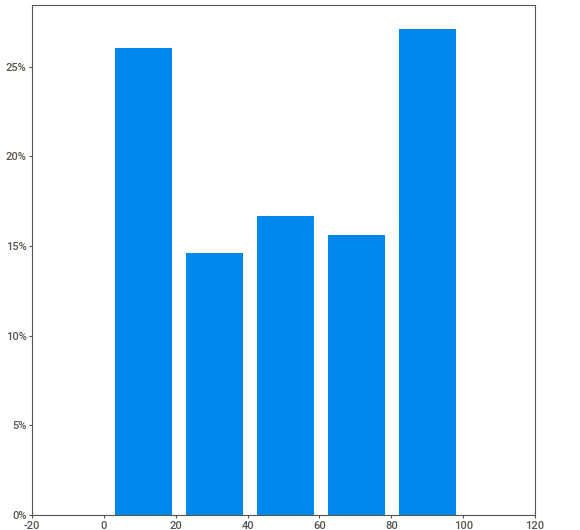
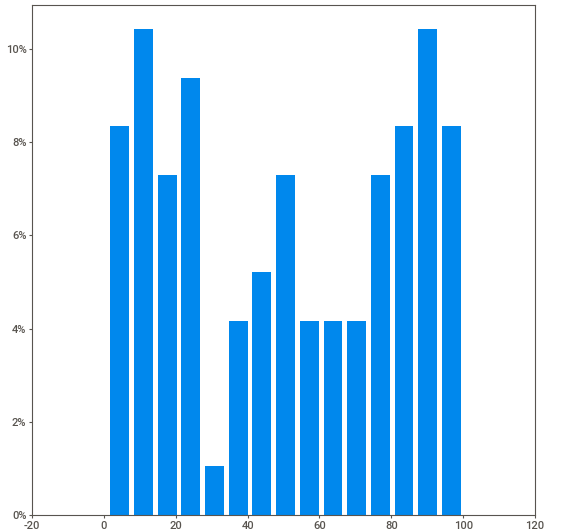
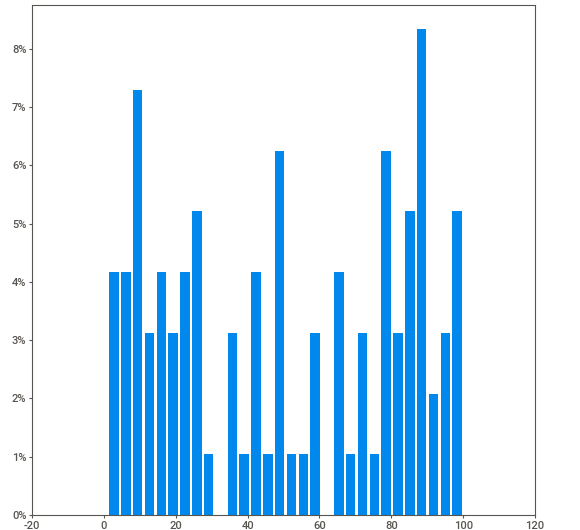
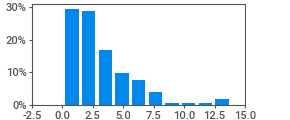
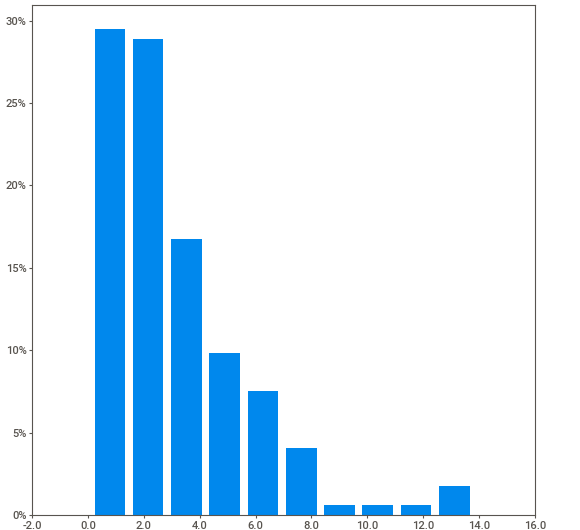
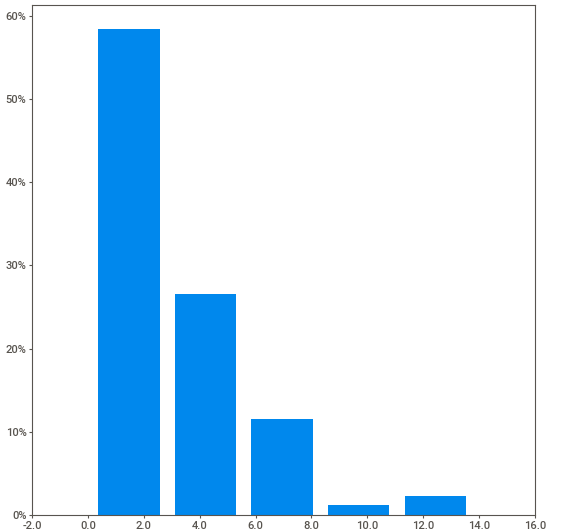
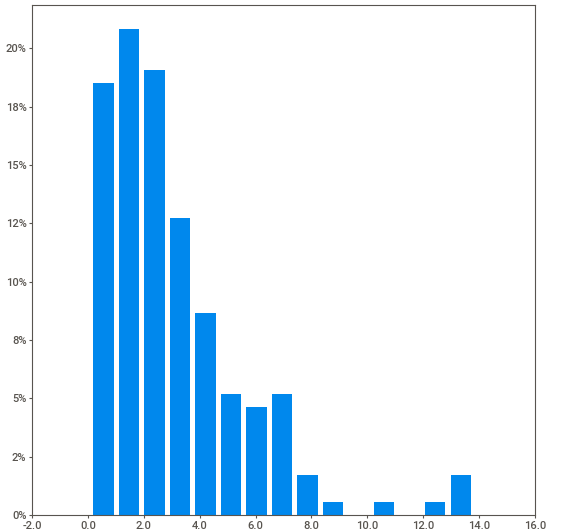
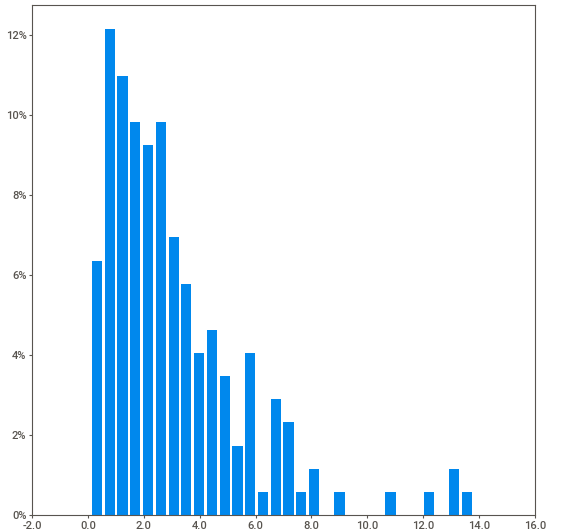
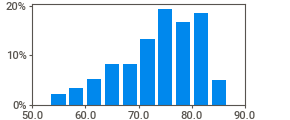
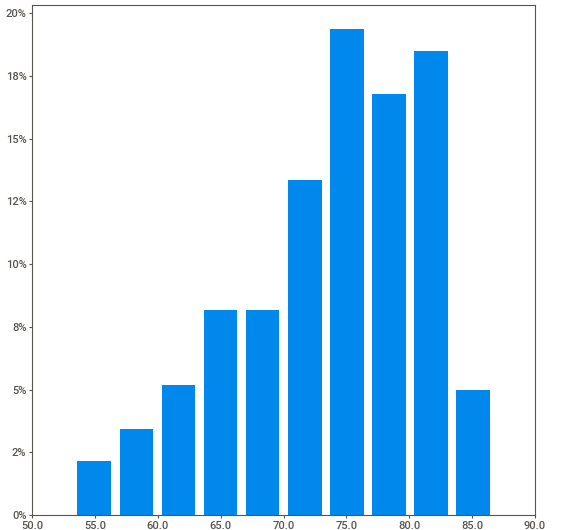
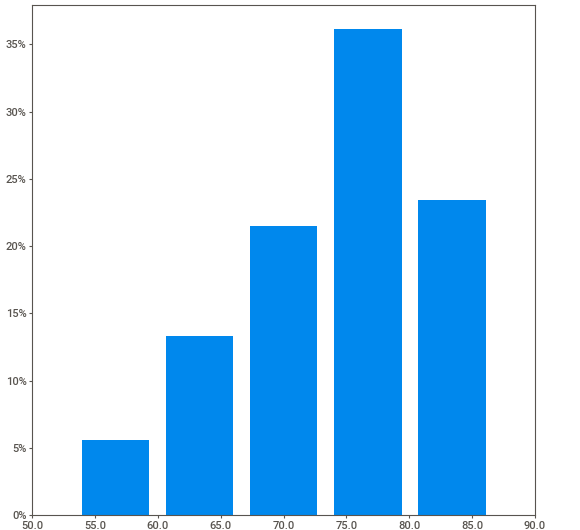
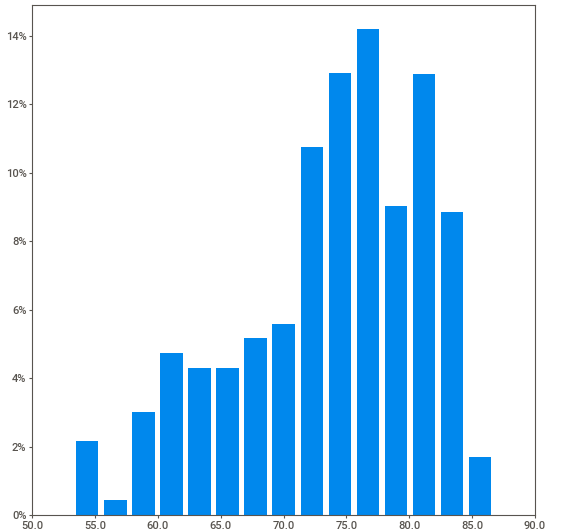
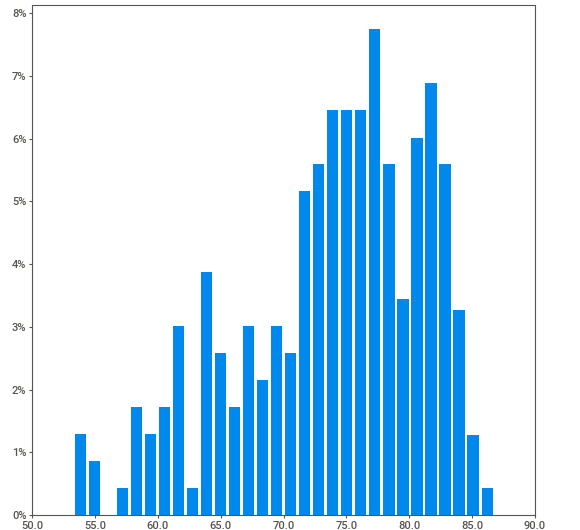
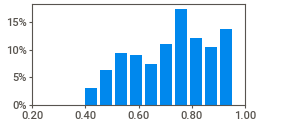
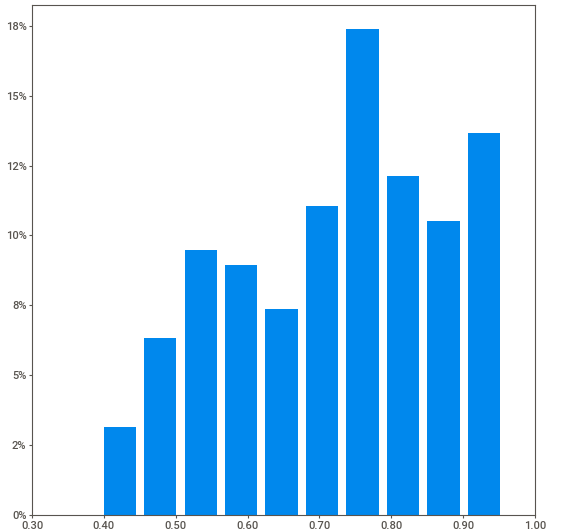
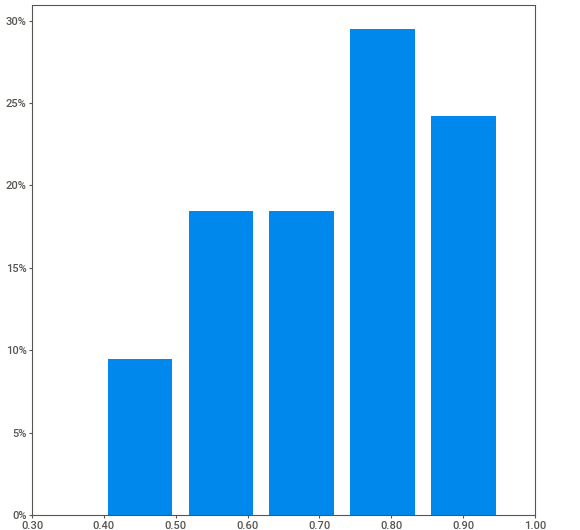
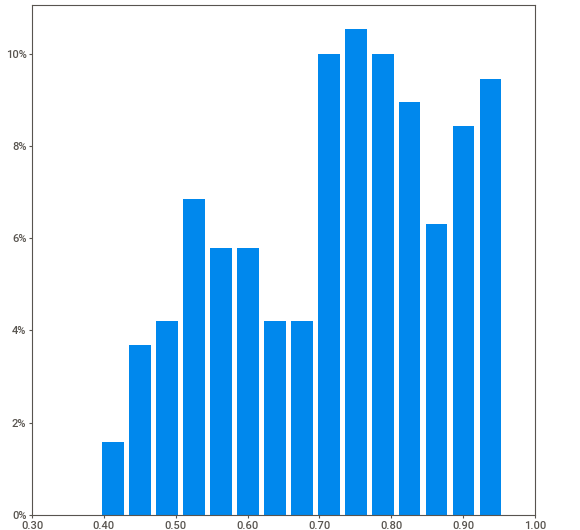
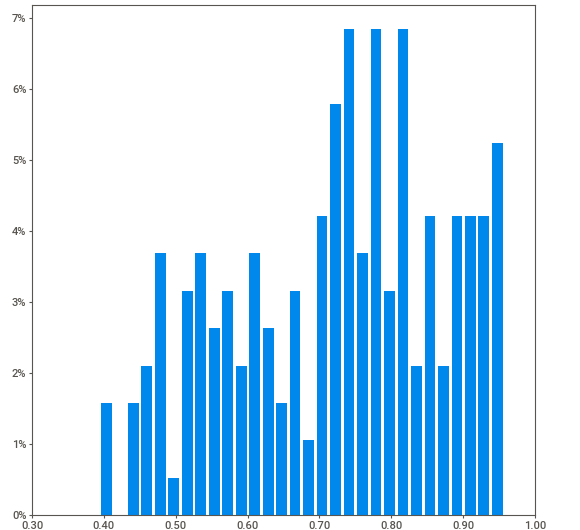
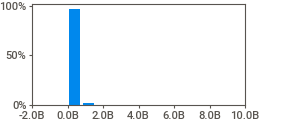
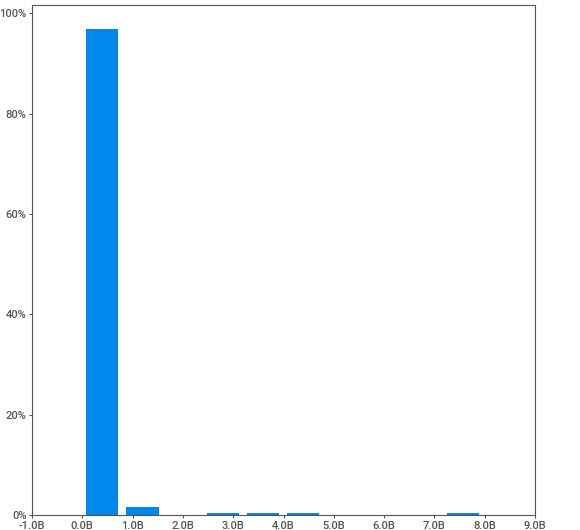
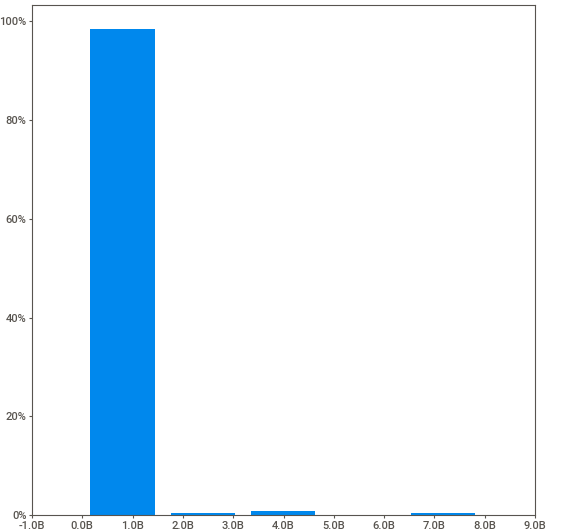
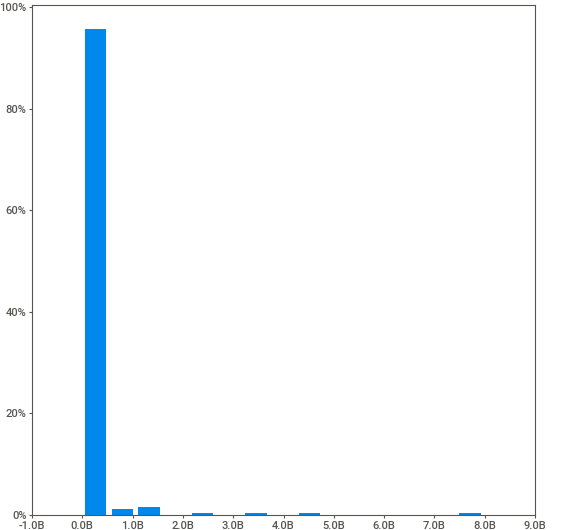
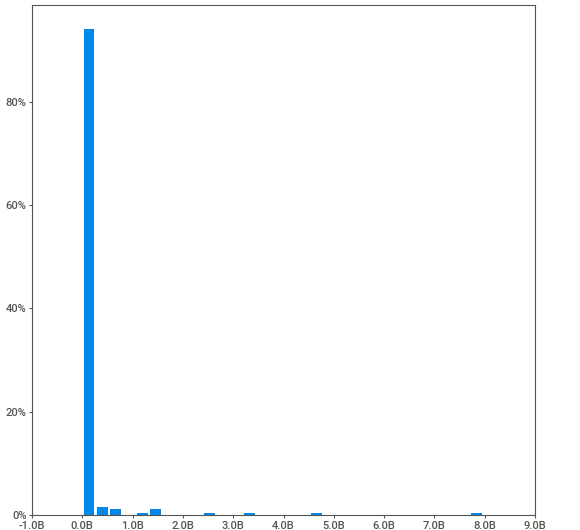
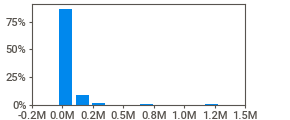
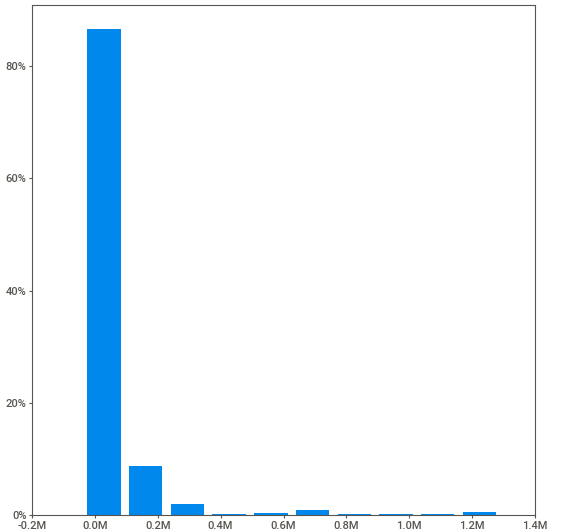
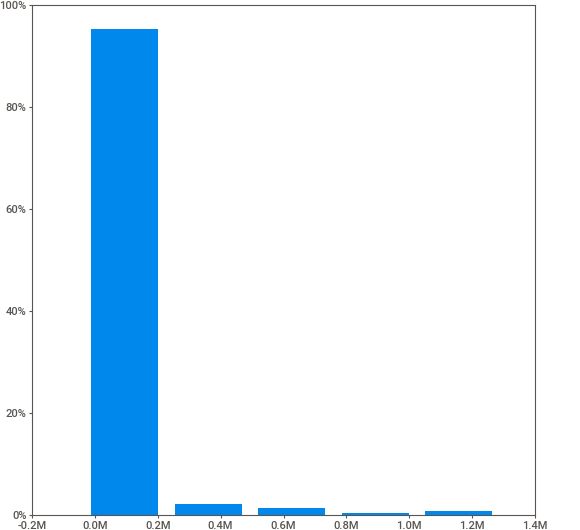
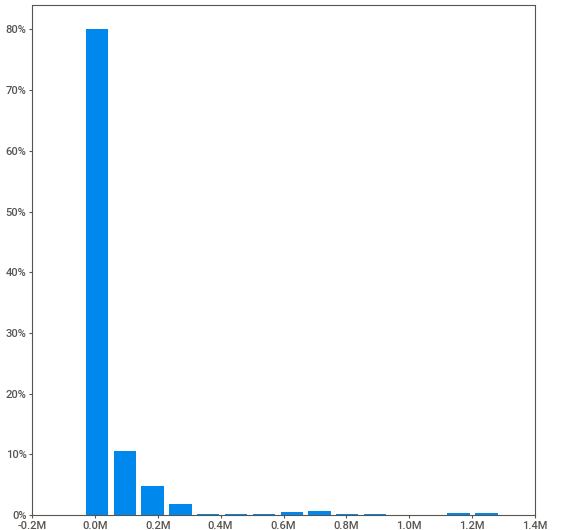
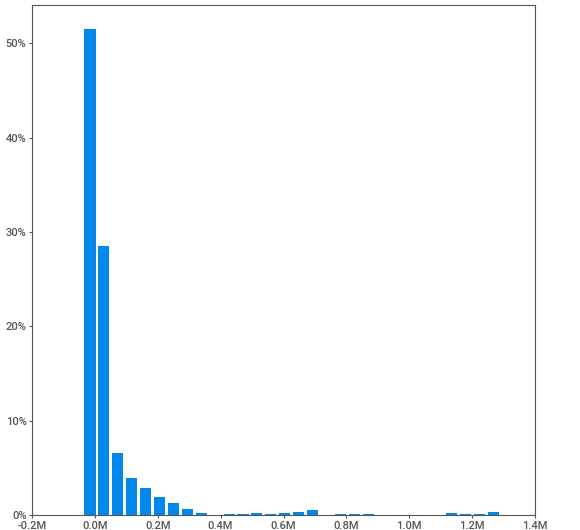
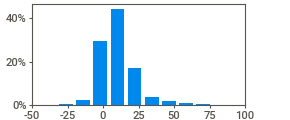
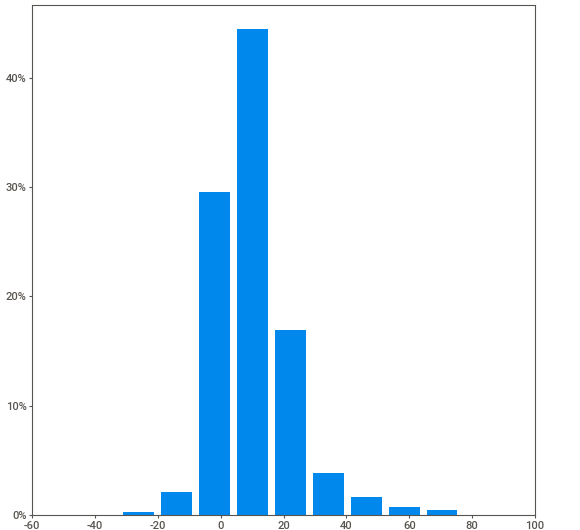
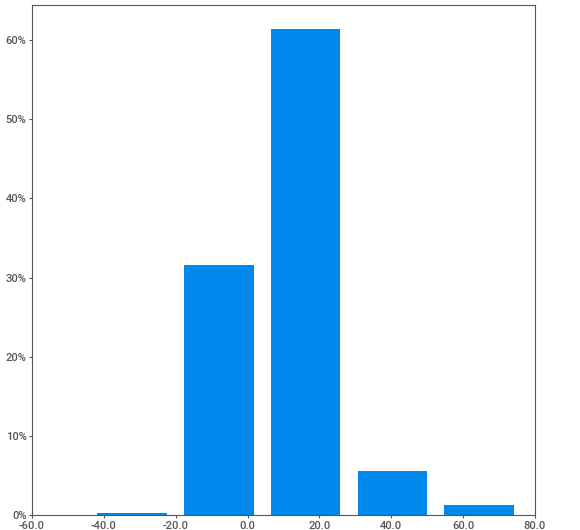
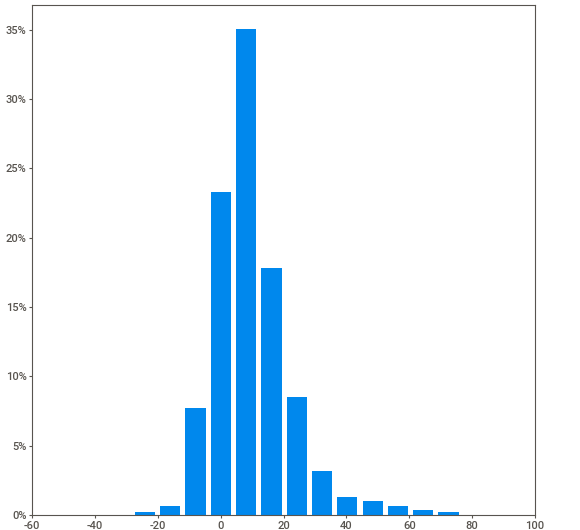
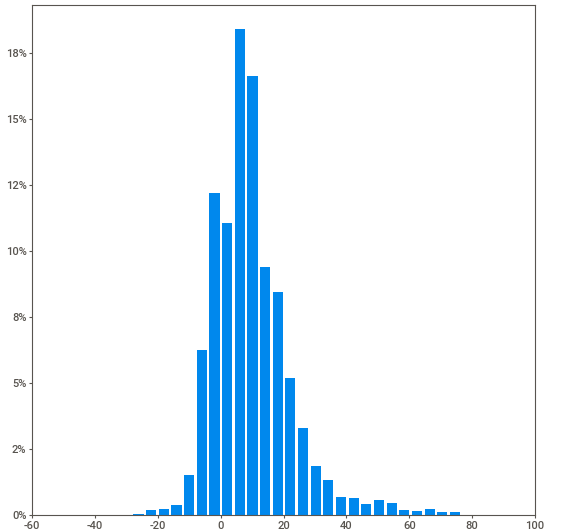
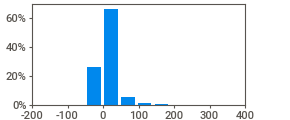
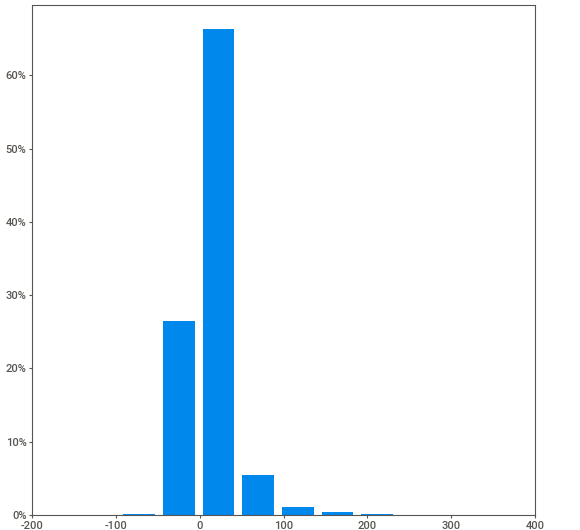
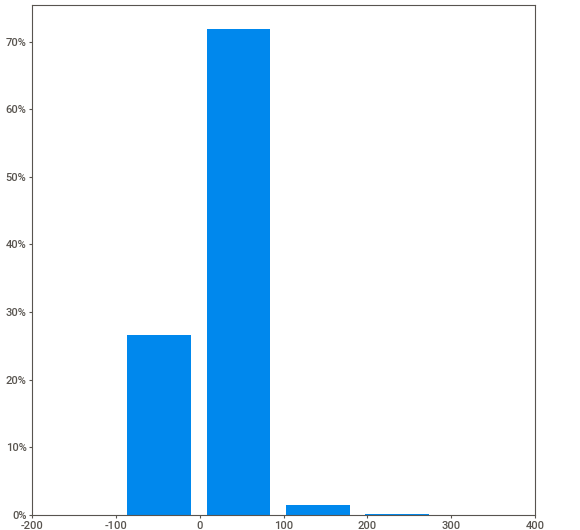
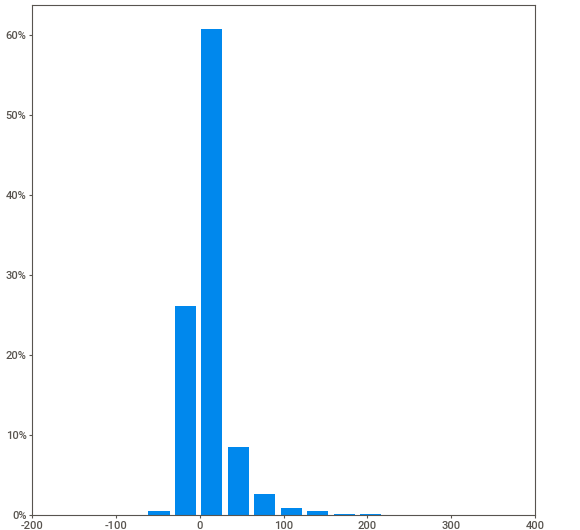
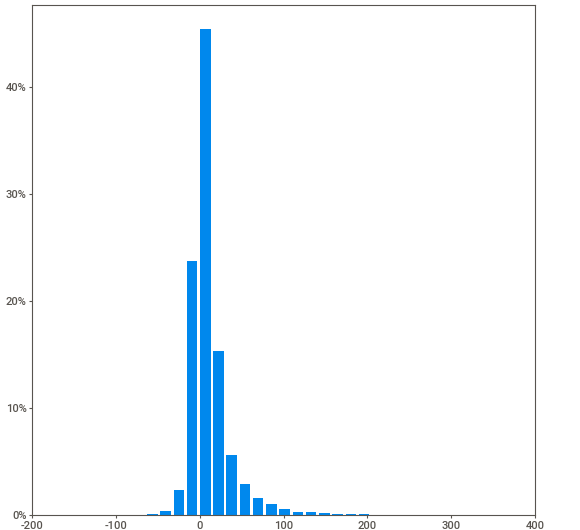
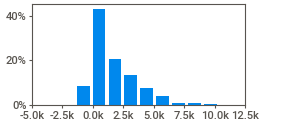
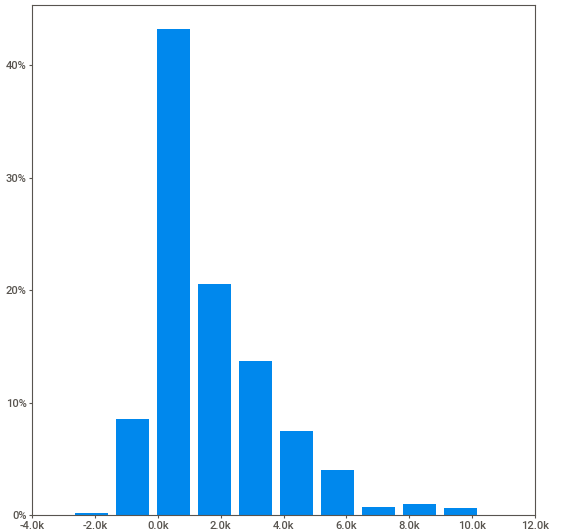
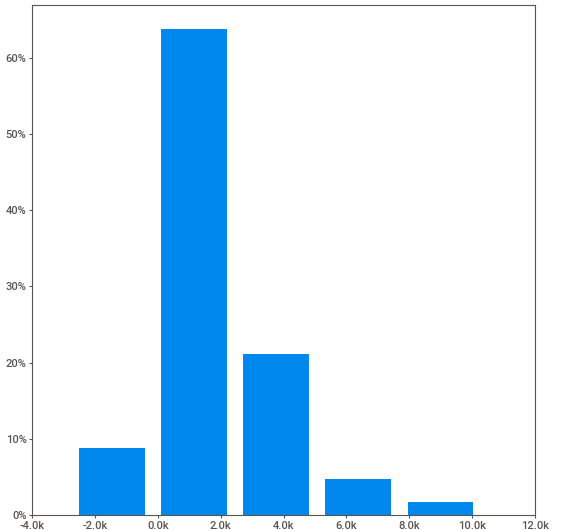
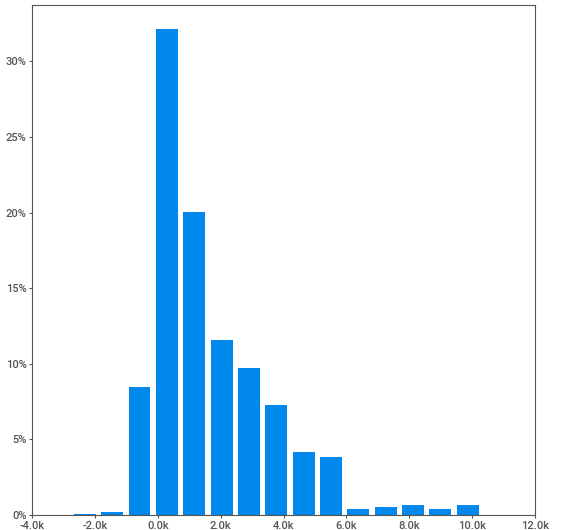
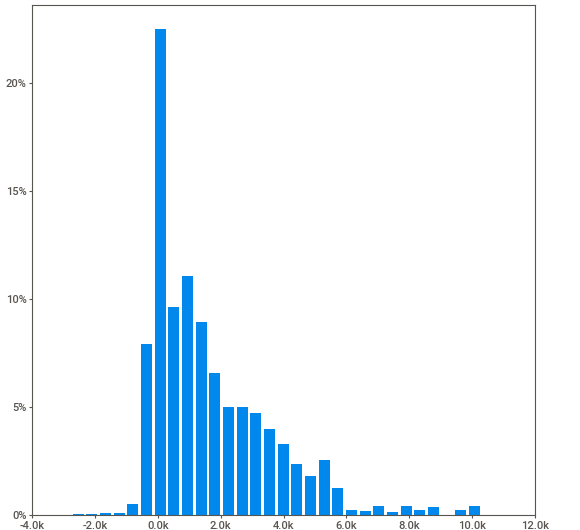
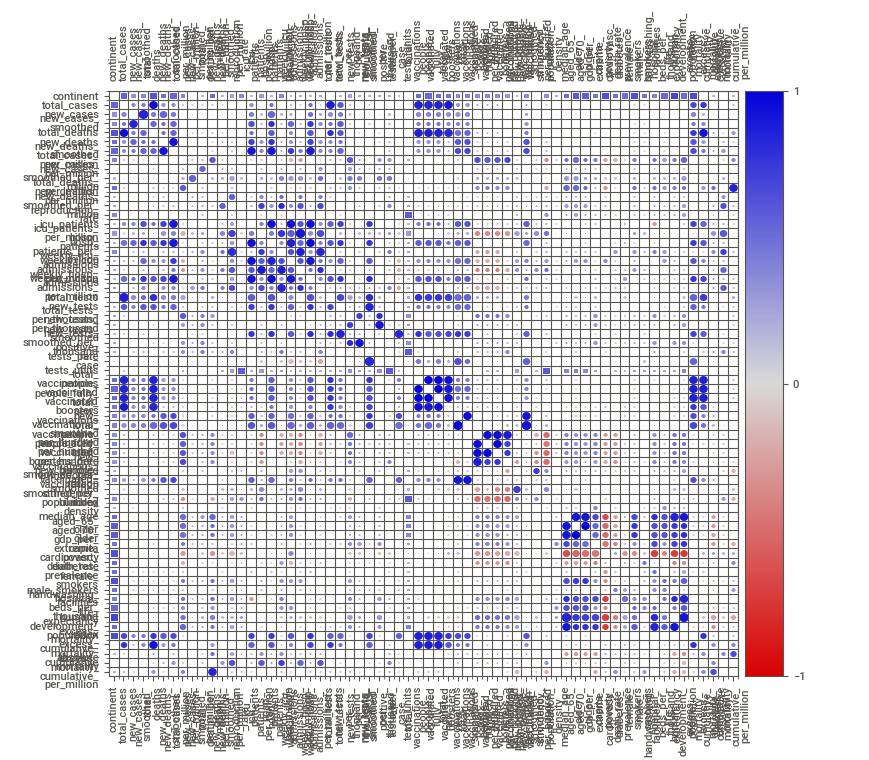
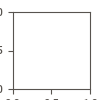

In [9]:
report = sv.analyze(df)
report.show_notebook()

In [10]:
df.shape

(344779, 67)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    344779 non-null  object 
 1   continent                                   328403 non-null  object 
 2   location                                    344779 non-null  object 
 3   date                                        344779 non-null  object 
 4   total_cases                                 306964 non-null  float64
 5   new_cases                                   335338 non-null  float64
 6   new_cases_smoothed                          334079 non-null  float64
 7   total_deaths                                285503 non-null  float64
 8   new_deaths                                  335378 non-null  float64
 9   new_deaths_smoothed                         334148 non-null  float64
 

## 3.1 Handeling missing values 

In [12]:
# Replace NaN with 0 for case and death columns
case_death_columns = [
    'total_cases', 'new_cases', 'total_deaths', 'new_deaths',
    'total_cases_per_million', 'new_cases_per_million',
    'total_deaths_per_million', 'new_deaths_per_million',
    'new_cases_smoothed', 'new_deaths_smoothed',
    'new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 
    'icu_patients_per_million', 'hosp_patients_per_million',
    'weekly_icu_admissions', 'weekly_icu_admissions_per_million',
    'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million'
]

df[case_death_columns] = df[case_death_columns].fillna(0)

In [13]:
# Replace NaN with 0 for ICU and hospital patients
df['icu_patients'] = df['icu_patients'].fillna(0)
df['hosp_patients'] = df['hosp_patients'].fillna(0)

# Replace NaN with 0 for testing columns
testing_columns = [
    'total_tests', 'new_tests', 'total_tests_per_thousand',
    'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand'
]

df[testing_columns] = df[testing_columns].fillna(0)

# Replace NaN with 1 for reproduction_rate (indicating stable transmission)
df['reproduction_rate'] = df['reproduction_rate'].fillna(1)

In [14]:
# Replace NaN with 0 for vaccination columns
vaccination_columns = [
    'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated',
    'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed',
    'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
    'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred',
    'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 
    'new_people_vaccinated_smoothed_per_hundred'
]

df[vaccination_columns] = df[vaccination_columns].fillna(0)

In [15]:
socio_economic_columns = [
    'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
    'gdp_per_capita', 'cardiovasc_death_rate', 'diabetes_prevalence',
    'hospital_beds_per_thousand', 'life_expectancy', 'human_development_index'
]

# Fill missing values with country-specific median
for column in socio_economic_columns:
    df[column] = df.groupby('location')[column].transform(lambda x: x.fillna(x.median()))

In [16]:
numerical_columns = [
    'positive_rate', 'tests_per_case', 'stringency_index',
    'extreme_poverty', 'female_smokers', 'male_smokers',
    'handwashing_facilities'
]

# Fill missing values with country-specific median
for column in numerical_columns:
    df[column] = df.groupby('location')[column].transform(lambda x: x.fillna(x.median()))

In [17]:
# Fill missing values in 'tests_units' with 'Unknown'
df['tests_units'] = df['tests_units'].fillna('Unknown')

In [18]:
# Drop excess mortality columns
df.drop(columns=[
    'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative',
    'excess_mortality', 'excess_mortality_cumulative_per_million'
], inplace=True)

## 3.2 Converting Data types

In [19]:
df['date'] = pd.to_datetime(df['date'])

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344779 entries, 0 to 344778
Data columns (total 63 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   iso_code                                    344779 non-null  object        
 1   continent                                   328403 non-null  object        
 2   location                                    344779 non-null  object        
 3   date                                        344779 non-null  datetime64[ns]
 4   total_cases                                 344779 non-null  float64       
 5   new_cases                                   344779 non-null  float64       
 6   new_cases_smoothed                          344779 non-null  float64       
 7   total_deaths                                344779 non-null  float64       
 8   new_deaths                                  344779 non-null  float64      

## 3.3 Handeling Outliers

In [21]:
df.describe()

date   total_cases     new_cases  \
count                         344779  3.447790e+05  3.447790e+05   
mean   2021-11-15 06:53:41.214748928  5.850543e+06  9.474254e+03   
min              2020-01-01 00:00:00  0.000000e+00  0.000000e+00   
25%              2020-12-11 00:00:00  2.344000e+03  0.000000e+00   
50%              2021-11-16 00:00:00  3.968900e+04  1.000000e+00   
75%              2022-10-21 00:00:00  5.461160e+05  2.460000e+02   
max              2023-09-28 00:00:00  7.708747e+08  8.401961e+06   
std                              NaN  3.792963e+07  1.095885e+05   

       new_cases_smoothed  total_deaths     new_deaths  new_deaths_smoothed  \
count        3.447790e+05  3.447790e+05  344779.000000        344779.000000   
mean         9.474129e+03  7.070140e+04      84.411841            84.408442   
min          0.000000e+00  0.000000e+00       0.000000             0.000000   
25%          1.430000e-01  1.700000e+01       0.000000             0.000000   
50%          2.157100e+01  4.680000e+02       0.000000             0.143000   
75%          4.682860e+02  7.582000e+03       2.000000             4.714000   
max          6.402036e+06  6.959303e+06   27939.000000         14822.000000   
std          9.371798e+04  3.990827e+05     609.953654           554.758906   

       total_cases_per_million  new_cases_per_million  \
count            344779.000000          344779.000000   
mean              89091.410975             143.189585   
min                   0.000000               0.000000   
25%                 871.627000               0.000000   
50%               14711.446000               0.068000   
75%              108542.655500              33.652000   
max              737554.506000          228872.025000   
std              144755.427003            1156.474117   

       new_cases_smoothed_per_million  ...  extreme_poverty  \
count                   344779.000000  ...    171873.000000   
mean                       143.185849  ...        13.847919   
min                          0.000000  ...         0.100000   
25%                          0.004000  ...         0.600000   
50%                          5.676000  ...         2.500000   
75%                         79.113000  ...        21.400000   
max                      37241.781000  ...        77.600000   
std                        595.386771  ...        20.091430   

       cardiovasc_death_rate  diabetes_prevalence  female_smokers  \
count          267339.000000        280940.000000   200519.000000   
mean              264.275571             8.561079       10.790307   
min                79.370000             0.990000        0.100000   
25%               175.695000             5.350000        1.900000   
50%               245.465000             7.200000        6.300000   
75%               333.436000            10.790000       19.300000   
max               724.417000            30.530000       44.000000   
std               120.930068             4.941476       10.779454   

        male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
count  197791.000000           130948.000000               235983.000000   
mean       32.909691               50.789548                    3.097048   
min         7.700000                1.188000                    0.100000   
25%        22.600000               20.859000                    1.300000   
50%        33.100000               49.839000                    2.500000   
75%        41.300000               83.241000                    4.200000   
max        78.100000              100.000000                   13.800000   
std        13.574521               31.957074                    2.548378   

       life_expectancy  human_development_index    population  
count    317184.000000            259116.000000  3.447790e+05  
mean         73.714406                 0.722456  1.281917e+08  
min          53.280000                 0.394000  4.700000e+01  
25%          69.590000                 0.602000  4.490020e+05 

In this dataset, some columns contain extremely high values, such as total_cases, total_deaths, new_cases, and new_deaths. These values are not errors but represent the real spread of the virus in different countries. The pandemic had varying impacts across regions, leading to spikes in case counts and deaths at different times.

#### For example:

 - **total_cases** ranges from 0 to 770,874,700, reflecting differences in population size and infection rates across countries.
 - **new_cases** reaches up to 8,401,961 in a single day, which aligns with major outbreak waves.
 - **new_cases_per_million** has extreme values due to differences in population density.
   
Since these outliers provide important insights into the severity and spread of COVID-19, they will be retained without modifications to preserve the integrity of the analysis. Instead of removing or capping extreme values, analysis will focus on understanding trends, variations, and potential factors influencing these fluctuations.



# 4. Analysing India Data

In [22]:
df_india = df[df.location=='India']
df_india

iso_code continent location       date  total_cases  new_cases  \
137635      IND      Asia    India 2020-01-03          0.0        0.0   
137636      IND      Asia    India 2020-01-04          0.0        0.0   
137637      IND      Asia    India 2020-01-05          0.0        0.0   
137638      IND      Asia    India 2020-01-06          0.0        0.0   
137639      IND      Asia    India 2020-01-07          0.0        0.0   
...         ...       ...      ...        ...          ...        ...   
138995      IND      Asia    India 2023-09-24   44998525.0       62.0   
138996      IND      Asia    India 2023-09-25   44998525.0        0.0   
138997      IND      Asia    India 2023-09-26   44998525.0        0.0   
138998      IND      Asia    India 2023-09-27   44998525.0        0.0   
138999      IND      Asia    India 2023-09-28          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
137635               0.000           0.0         0.0                0.000   
137636               0.000           0.0         0.0                0.000   
137637               0.000           0.0         0.0                0.000   
137638               0.000           0.0         0.0                0.000   
137639               0.000           0.0         0.0                0.000   
...                    ...           ...         ...                  ...   
138995              51.857      532031.0         0.0                0.143   
138996              44.000      532031.0         0.0                0.143   
138997              40.286      532031.0         0.0                0.143   
138998              33.000      532031.0         0.0                0.000   
138999               0.000           0.0         0.0                0.000   

        ...  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
137635  ...             21.2                 282.28                10.39   
137636  ...             21.2                 282.28                10.39   
137637  ...             21.2                 282.28                10.39   
137638  ...             21.2                 282.28                10.39   
137639  ...             21.2                 282.28                10.39   
...     ...              ...                    ...                  ...   
138995  ...             21.2                 282.28                10.39   
138996  ...             21.2                 282.28                10.39   
138997  ...             21.2                 282.28                10.39   
138998  ...             21.2                 282.28                10.39   
138999  ...             21.2                 282.28                10.39   

        female_smokers  male_smokers  handwashing_facilities  \
137635             1.9          20.6                   59.55   
137636             1.9          20.6                   59.55   
137637             1.9          20.6                   59.55   
137638             1.9          20.6                   59.55   
137639             1.9          20.6                   59.55   
...                ...           ...                     ...   
138995             1.9          20.6                   59.55   
138996             1.9          20.6                   59.55   
138997             1.9          20.6                   59.55   
138998             1.9          20.6                   59.55   
138999             1.9          20.6                   59.55   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
137635                        0.53            69.66                    0.645   
137636                        0.53            69.66                    0.645   
137637                        0.53            69.66                    0.645   
137638                        0.53            69.66                    0.645   
137639                        0.53            69.66                    0.645   
...                            ...         

In [23]:
# Set 'date' as index
#df_india.set_index('date', inplace=True)

In [24]:
df_india

iso_code continent location       date  total_cases  new_cases  \
137635      IND      Asia    India 2020-01-03          0.0        0.0   
137636      IND      Asia    India 2020-01-04          0.0        0.0   
137637      IND      Asia    India 2020-01-05          0.0        0.0   
137638      IND      Asia    India 2020-01-06          0.0        0.0   
137639      IND      Asia    India 2020-01-07          0.0        0.0   
...         ...       ...      ...        ...          ...        ...   
138995      IND      Asia    India 2023-09-24   44998525.0       62.0   
138996      IND      Asia    India 2023-09-25   44998525.0        0.0   
138997      IND      Asia    India 2023-09-26   44998525.0        0.0   
138998      IND      Asia    India 2023-09-27   44998525.0        0.0   
138999      IND      Asia    India 2023-09-28          0.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
137635               0.000           0.0         0.0                0.000   
137636               0.000           0.0         0.0                0.000   
137637               0.000           0.0         0.0                0.000   
137638               0.000           0.0         0.0                0.000   
137639               0.000           0.0         0.0                0.000   
...                    ...           ...         ...                  ...   
138995              51.857      532031.0         0.0                0.143   
138996              44.000      532031.0         0.0                0.143   
138997              40.286      532031.0         0.0                0.143   
138998              33.000      532031.0         0.0                0.000   
138999               0.000           0.0         0.0                0.000   

        ...  extreme_poverty  cardiovasc_death_rate  diabetes_prevalence  \
137635  ...             21.2                 282.28                10.39   
137636  ...             21.2                 282.28                10.39   
137637  ...             21.2                 282.28                10.39   
137638  ...             21.2                 282.28                10.39   
137639  ...             21.2                 282.28                10.39   
...     ...              ...                    ...                  ...   
138995  ...             21.2                 282.28                10.39   
138996  ...             21.2                 282.28                10.39   
138997  ...             21.2                 282.28                10.39   
138998  ...             21.2                 282.28                10.39   
138999  ...             21.2                 282.28                10.39   

        female_smokers  male_smokers  handwashing_facilities  \
137635             1.9          20.6                   59.55   
137636             1.9          20.6                   59.55   
137637             1.9          20.6                   59.55   
137638             1.9          20.6                   59.55   
137639             1.9          20.6                   59.55   
...                ...           ...                     ...   
138995             1.9          20.6                   59.55   
138996             1.9          20.6                   59.55   
138997             1.9          20.6                   59.55   
138998             1.9          20.6                   59.55   
138999             1.9          20.6                   59.55   

        hospital_beds_per_thousand  life_expectancy  human_development_index  \
137635                        0.53            69.66                    0.645   
137636                        0.53            69.66                    0.645   
137637                        0.53            69.66                    0.645   
137638                        0.53            69.66                    0.645   
137639                        0.53            69.66                    0.645   
...                            ...         

### 1. What is the first and last reported COVID-19 case in India?

In [25]:
first_case = df_india[df_india['total_cases'] > 0].index.min()
last_case = df_india.index.max()
print(f"First Case: {first_case}, Last Case: {last_case}")


First Case: 137662, Last Case: 138999


### 2. What is the highest number of daily new cases?

In [26]:
max_new_cases = df_india['new_cases'].max()
max_new_cases_date = df_india['new_cases'].idxmax()
print(f"Highest daily new cases: {max_new_cases} on {max_new_cases_date}")

Highest daily new cases: 414188.0 on 138125


### 3. What is the highest number of daily new deaths?

In [27]:
max_new_deaths = df_india['new_deaths'].max()
max_new_deaths_date = df_india['new_deaths'].idxmax()
print(f"Highest daily new deaths: {max_new_deaths} on {max_new_deaths_date}")

Highest daily new deaths: 6148.0 on 138159


### 4. What is the total number of cases and deaths in India?

In [28]:
total_cases = df_india['total_cases'].max()
total_deaths = df_india['total_deaths'].max()
print(f"Total Cases: {total_cases}, Total Deaths: {total_deaths}")


Total Cases: 44998525.0, Total Deaths: 532031.0


### 5. What is the Case Fatality Rate (CFR) in India?
Case Fatality Rate (CFR) measures the severity of a particular disease by defining the total number of deaths as a proportion of reported cases of a specific disease at a specific time.

In [29]:
cfr = (total_deaths / total_cases) * 100
print(f"Case Fatality Rate: {cfr:.2f}%")

Case Fatality Rate: 1.18%


### 6. What is the recovery rate in India?

In [30]:
df_india['recovery_rate'] = df_india.apply(
    lambda row: 0 if row['total_cases'] == 0 else ((row['total_cases'] - row['total_deaths']) / row['total_cases']) * 100, 
    axis=1
)
latest_recovery_rate = df_india['recovery_rate'].iloc[-1]
print(f"Latest Recovery Rate: {latest_recovery_rate:.2f}%")

Latest Recovery Rate: 0.00%


### 7. What is the trend of new cases over time?

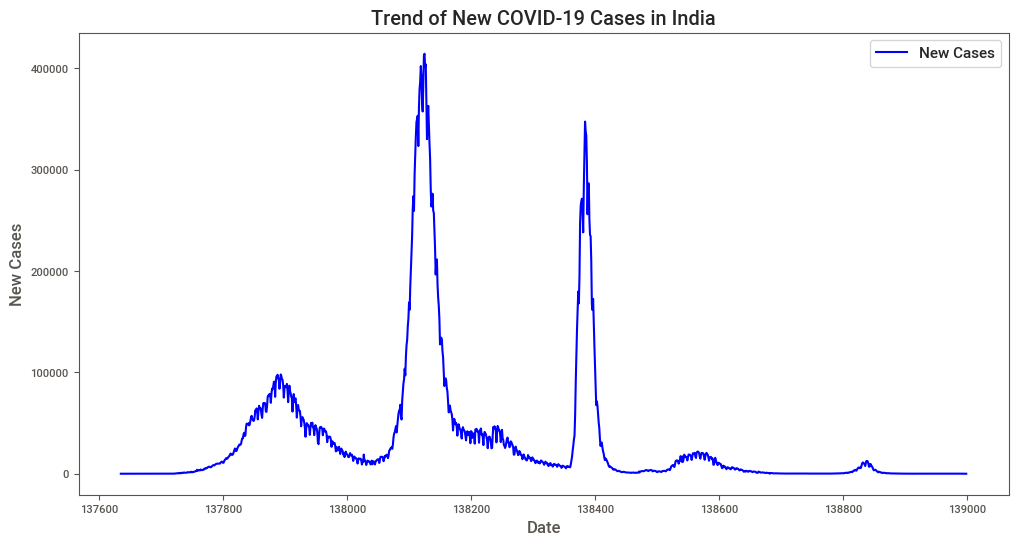

In [31]:
plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india['new_cases'], label='New Cases', color='blue')
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.title("Trend of New COVID-19 Cases in India")
plt.legend()
plt.show()

### 8. What is the trend of new deaths over time?

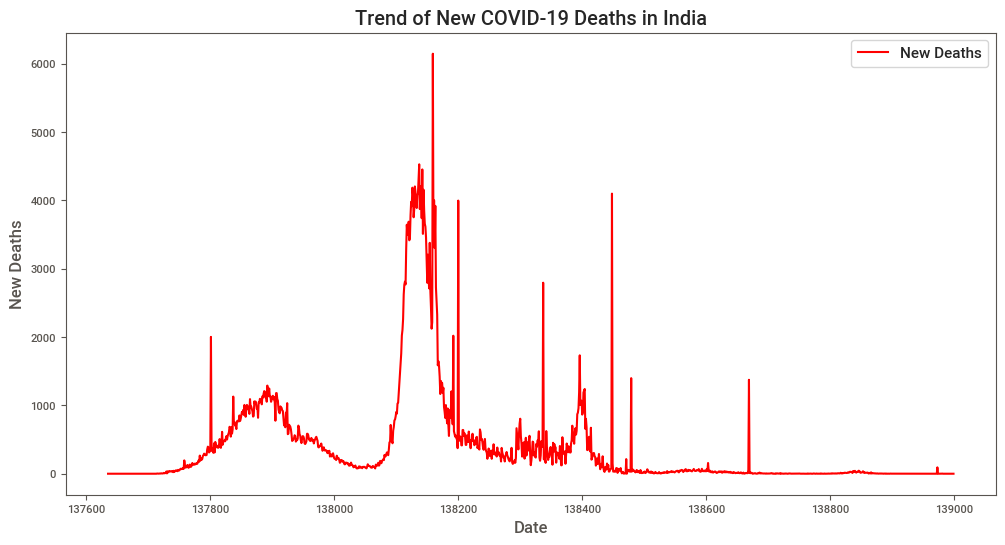

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india['new_deaths'], label='New Deaths', color='red')
plt.xlabel("Date")
plt.ylabel("New Deaths")
plt.title("Trend of New COVID-19 Deaths in India")
plt.legend()
plt.show()


### 9. How did vaccination progress over time?

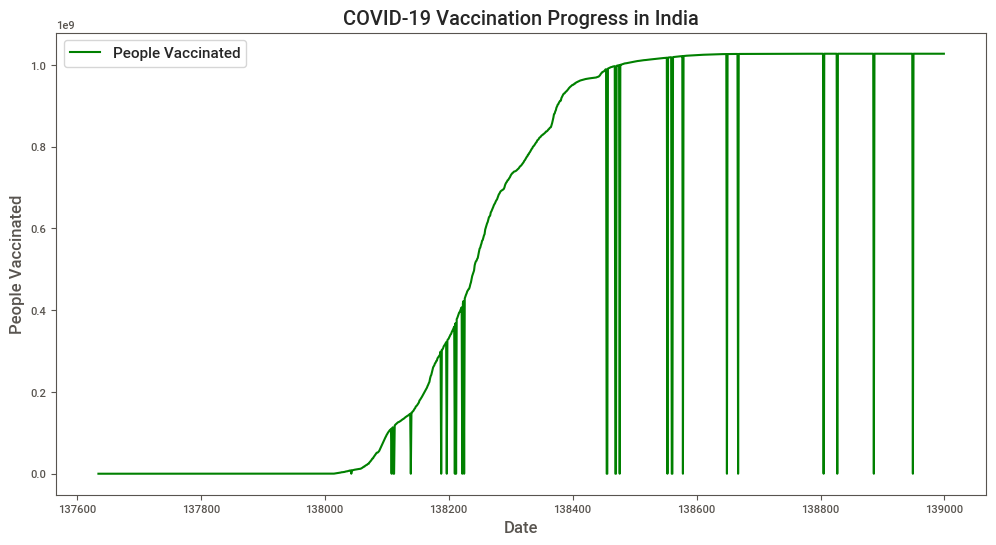

In [33]:
plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india['people_vaccinated'], label='People Vaccinated', color='green')
plt.xlabel("Date")
plt.ylabel("People Vaccinated")
plt.title("COVID-19 Vaccination Progress in India")
plt.legend()
plt.show()

### 10. What is the highest vaccination count in a single day?

In [34]:
max_vaccinated = df_india['new_vaccinations'].max()
max_vaccination_date = df_india['new_vaccinations'].idxmax()
print(f"Highest daily vaccinations: {max_vaccinated} on {max_vaccination_date}")

Highest daily vaccinations: 18627269.0 on 138259


### 11. What percentage of India’s population was fully vaccinated?

In [35]:
population = df_india['population'].max()
fully_vaccinated = df_india['people_fully_vaccinated'].max()
vaccination_rate = (fully_vaccinated / population) * 100
print(f"Fully Vaccinated Population: {vaccination_rate:.2f}%")

Fully Vaccinated Population: 67.17%


### 12. How does testing affect case detection?

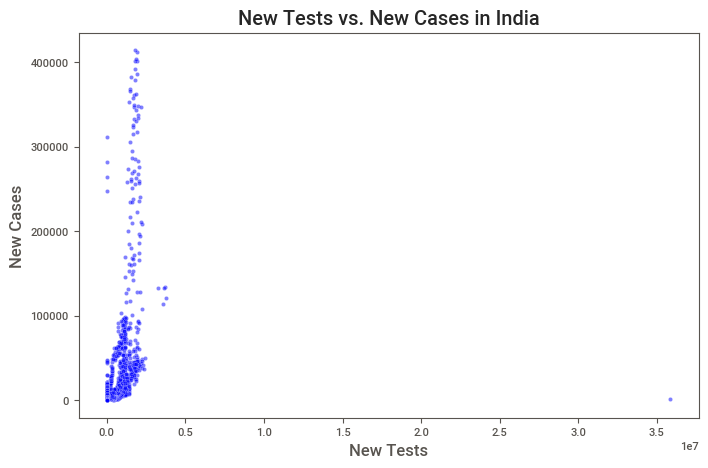

In [36]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_india['new_tests'], y=df_india['new_cases'], alpha=0.5, color='blue')
plt.xlabel("New Tests")
plt.ylabel("New Cases")
plt.title("New Tests vs. New Cases in India")
plt.show()

### 13. What is the daily positivity rate?

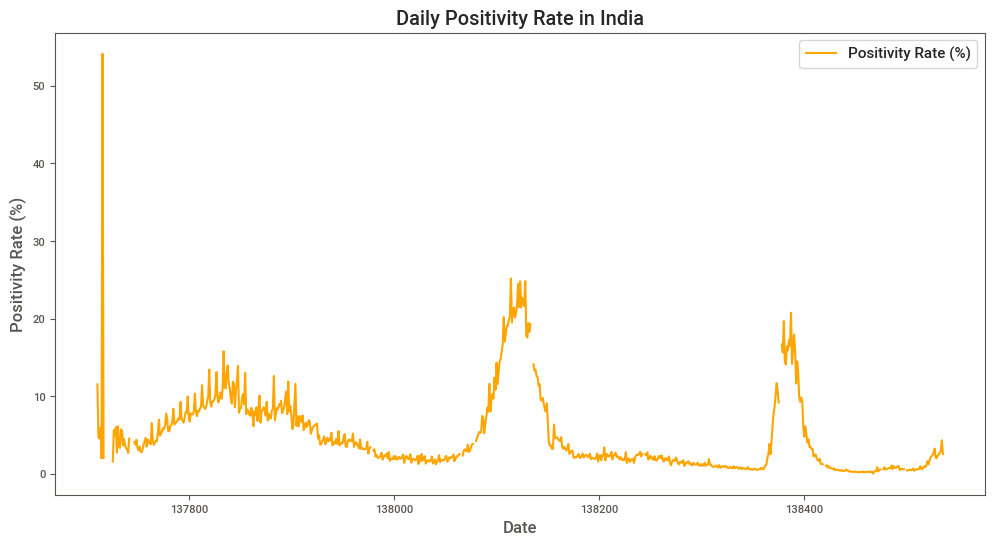

In [37]:
df_india['positivity_rate'] = (df_india['new_cases'] / df_india['new_tests']) * 100
plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india['positivity_rate'], label='Positivity Rate (%)', color='orange')
plt.xlabel("Date")
plt.ylabel("Positivity Rate (%)")
plt.title("Daily Positivity Rate in India")
plt.legend()
plt.show()

### 14. How did hospital bed availability affect COVID outcomes?

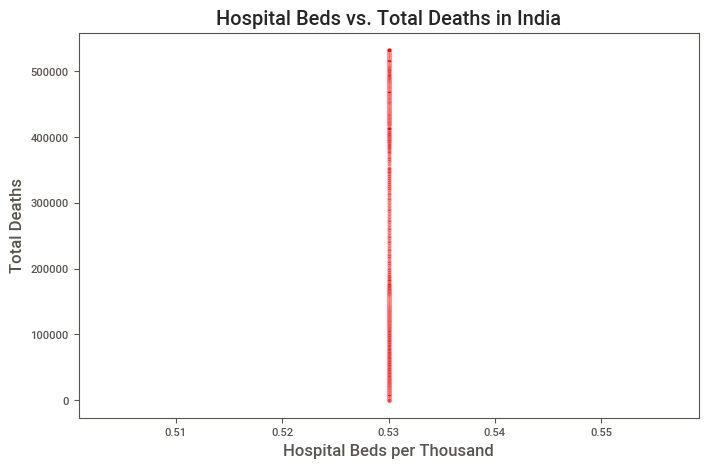

In [38]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_india['hospital_beds_per_thousand'], y=df_india['total_deaths'], alpha=0.5, color='red')
plt.xlabel("Hospital Beds per Thousand")
plt.ylabel("Total Deaths")
plt.title("Hospital Beds vs. Total Deaths in India")
plt.show()

### 15. How do male and female smoking rates correlate with COVID deaths?


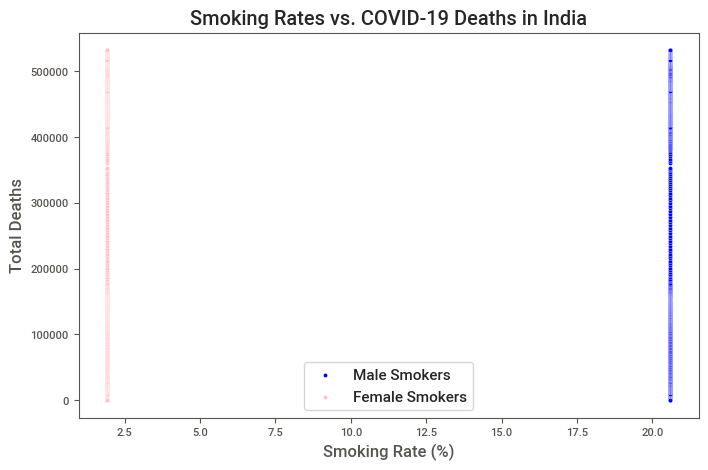

In [39]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_india['male_smokers'], y=df_india['total_deaths'], label='Male Smokers', color='blue')
sns.scatterplot(x=df_india['female_smokers'], y=df_india['total_deaths'], label='Female Smokers', color='pink')
plt.xlabel("Smoking Rate (%)")
plt.ylabel("Total Deaths")
plt.title("Smoking Rates vs. COVID-19 Deaths in India")
plt.legend()
plt.show()

### 16. What is the highest number of ICU admissions recorded?

In [40]:
max_icu_admissions = df_india['icu_patients'].max()
print(f"Highest ICU Admissions Recorded: {max_icu_admissions}")

Highest ICU Admissions Recorded: 0.0


### 17. How do life expectancy and COVID deaths relate?

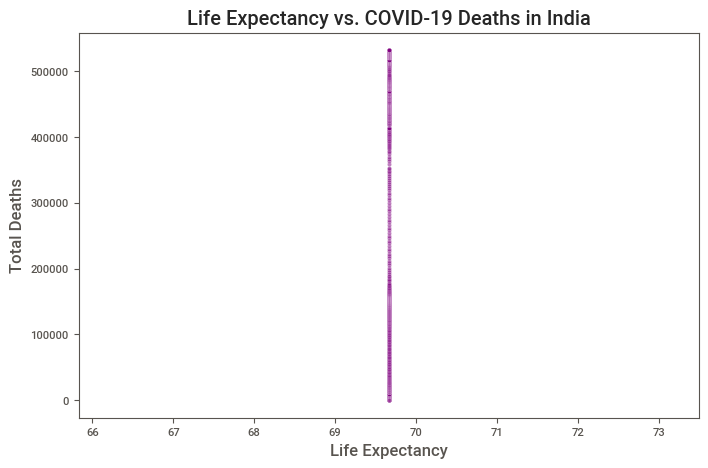

In [41]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df_india['life_expectancy'], y=df_india['total_deaths'], alpha=0.5, color='purple')
plt.xlabel("Life Expectancy")
plt.ylabel("Total Deaths")
plt.title("Life Expectancy vs. COVID-19 Deaths in India")
plt.show()

### 18.What is the trend of active cases over time?

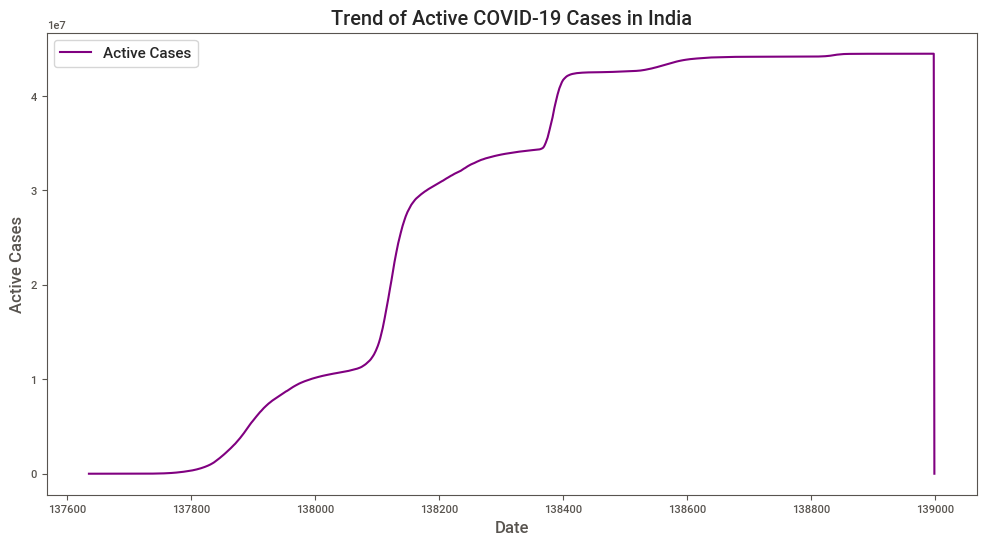

In [42]:
df_india['active_cases'] = df_india['total_cases'] - df_india['total_deaths']
plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india['active_cases'], label='Active Cases', color='purple')
plt.xlabel("Date")
plt.ylabel("Active Cases")
plt.title("Trend of Active COVID-19 Cases in India")
plt.legend()
plt.show()

### 19. What is the proportion of new cases relative to the total population?

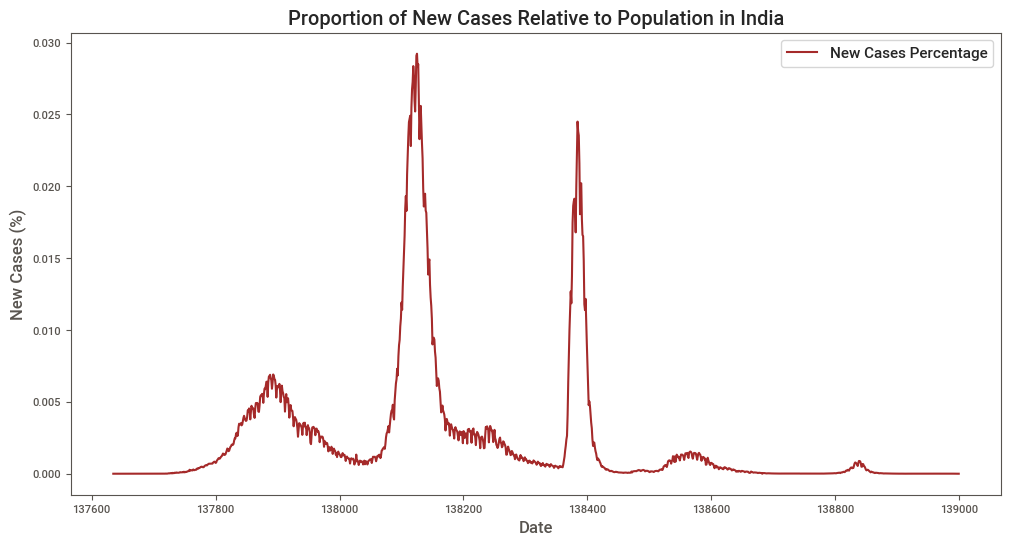

In [43]:
df_india['new_cases_percentage'] = (df_india['new_cases'] / df_india['population']) * 100
plt.figure(figsize=(12, 6))
plt.plot(df_india.index, df_india['new_cases_percentage'], label='New Cases Percentage', color='brown')
plt.xlabel("Date")
plt.ylabel("New Cases (%)")
plt.title("Proportion of New Cases Relative to Population in India")
plt.legend()
plt.show()

### 20. What is the average median age of countries affected by COVID-19?

In [44]:
average_median_age = df_india['median_age'].mean()
print("Average Median Age:", average_median_age)

Average Median Age: 28.2


### 21. Is there any age group that is more likely to be affected by COVID (higher number of cases) based on age?

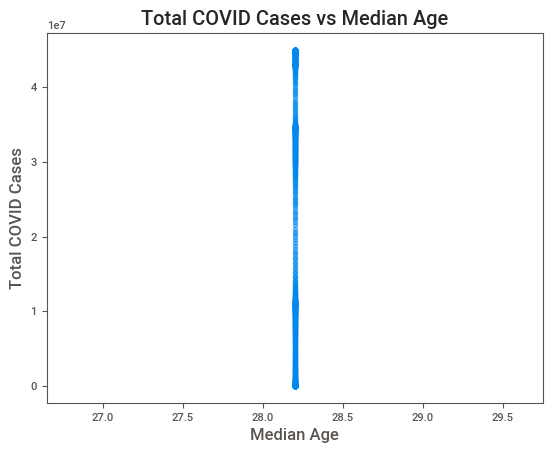

In [45]:
plt.scatter(df_india['median_age'], df_india['total_cases'], alpha=0.5)
plt.title("Total COVID Cases vs Median Age")
plt.xlabel("Median Age")
plt.ylabel("Total COVID Cases")
plt.show()

### 22. What is the percentage of population is aged 65 or older, and how does this relate to the total death rate?

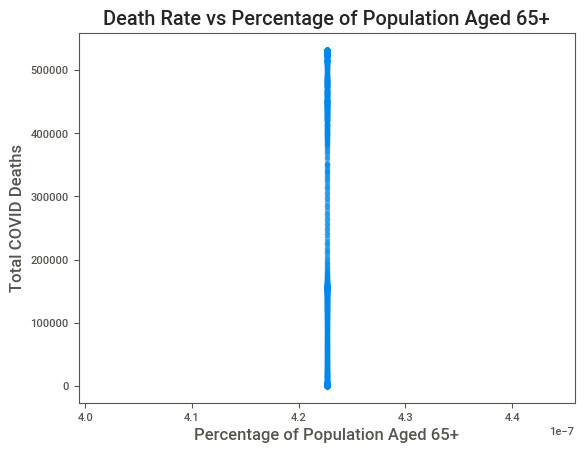

In [46]:
df_india['percent_65_older'] = (df_india['aged_65_older'] / df_india['population']) * 100

plt.scatter(df_india['percent_65_older'], df_india['total_deaths'], alpha=0.5)
plt.title("Death Rate vs Percentage of Population Aged 65+")
plt.xlabel("Percentage of Population Aged 65+")
plt.ylabel("Total COVID Deaths")
plt.show()

### 23. What are the average values of cardiovascular death rate, diabetes prevalence, and extreme poverty for India?

In [47]:
average_values_by_location = df_india[['cardiovasc_death_rate', 'diabetes_prevalence', 'extreme_poverty']].mean()
print("Average Values by Location:\n", average_values_by_location)


Average Values by Location:
 cardiovasc_death_rate    282.28
diabetes_prevalence       10.39
extreme_poverty           21.20
dtype: float64


### 24. What is the total number of COVID-19 cases and deaths in India for extreme poverty?

In [48]:
poverty_summary = df_india[['total_cases', 'total_deaths']].sum()
print("Total Cases and Deaths in India:\n", poverty_summary)

Total Cases and Deaths in India:
 total_cases     3.816320e+10
total_deaths    4.717968e+08
dtype: float64


### 25. what is the distribution of extreme poverty vs. COVID-19 deaths in India?

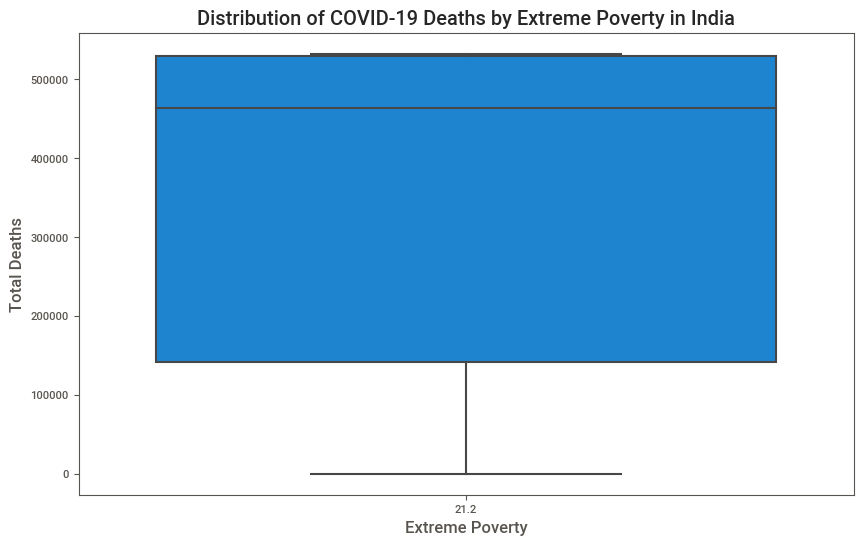

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='extreme_poverty', y='total_deaths', data=df_india)
plt.title("Distribution of COVID-19 Deaths by Extreme Poverty in India")
plt.xlabel("Extreme Poverty")
plt.ylabel("Total Deaths")
plt.show()

### 26.How does diabetes prevalence relate to total COVID-19 cases in India?

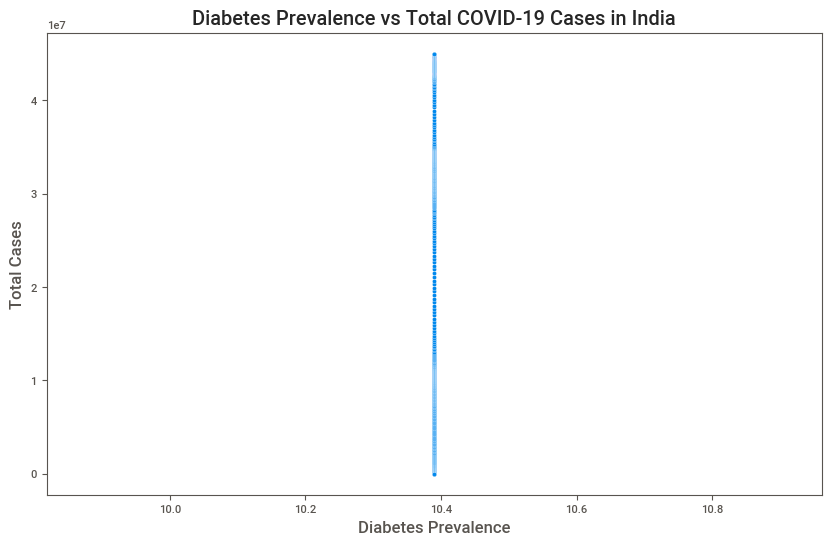

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='diabetes_prevalence', y='total_cases', data=df_india)
plt.title("Diabetes Prevalence vs Total COVID-19 Cases in India")
plt.xlabel("Diabetes Prevalence")
plt.ylabel("Total Cases")
plt.show()
